In [ ]:
# !pip install "qiskit" "qiskit-ibm-runtime" "qiskit_serverless" "qiskit-ibm-catalog" "qiskit-ibm-transpiler"

In [ ]:
# !pip install pylatexenc #per permettere la rappresentazione del circuito(draw())

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler
API="FXZooK6PKXZ4Jk0vtF18EZ7qf4UqAnnSgzXJHlanJPtd"
CRN="crn:v1:bluemix:public:quantum-computing:us-east:a/86f82340c6464e169cf352545f3619de:bf97c405-53a9-4573-97a7-2fdda0ea88f9::"


service = QiskitRuntimeService(channel="ibm_quantum_platform",
            token=API, # Use the 44-character API_KEY you created and saved from the IBM Quantum Platform Home dashboard
            instance=CRN)

backend_qc=service.least_busy()
print(backend_qc)

qiskit_runtime_service._discover_account:WARNING:2026-02-09 23:09:56,839: Loading account with the given token. A saved account will not be used.


<IBMBackend('ibm_torino')>


In [ ]:
service.backends()

[<IBMBackend('ibm_fez')>,
 <IBMBackend('ibm_torino')>,
 <IBMBackend('ibm_marrakesh')>]

 >> First ten results for the meas output register: ['00', '00', '00', '11', '11', '11', '11', '01', '11', '00', '00', '00', '00', '01', '00', '00', '11', '11', '00', '00', '00', '11', '11', '00', '11', '10', '00', '10', '11', '11', '00', '11', '00', '00', '00', '11', '00', '00', '11', '10', '00', '11', '11', '01', '00', '11', '11', '11', '11', '11'] 

Bitstring misurata: 00 → [0, 0]
Counts del circuito quantistico:  
 {'00': 469, '11': 411, '01': 71, '10': 73}


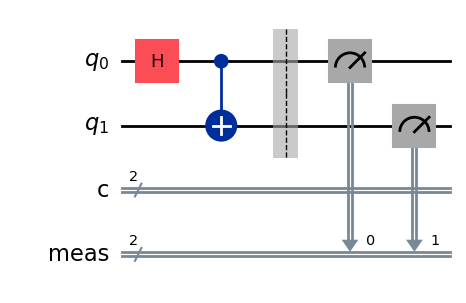

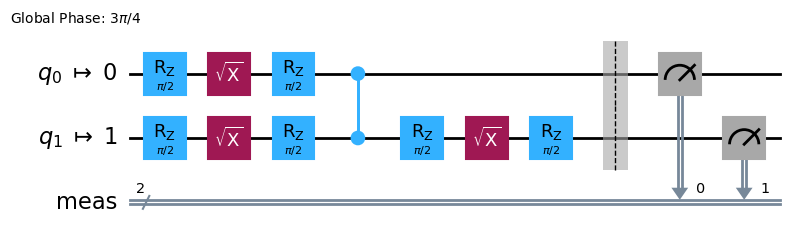

In [ ]:
#DA COPIARE NEL CONSTRAINED
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from matplotlib import pyplot as plt
from qiskit_ibm_runtime import SamplerV2 as Sampler



# --- Definizione del circuito ---
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

# Return a drawing of the circuit using MatPlotLib ("mpl").
# These guides are written by using Jupyter notebooks, which
# display the output of the last line of each cell.
# If you're running this in a script, use `print(qc.draw())` to
# print a text drawing.
qc.draw("mpl")


# Convert to an ISA circuit and layout-mapped observables.

pm = generate_preset_pass_manager(backend=backend_qc, optimization_level=1)
isa_circuit = pm.run(qc)

isa_circuit.draw("mpl", idle_wires=False)



# --- Esecuzione con Sampler ---
sampler = Sampler(backend_qc)
job = sampler.run([isa_circuit], shots=1024)  # 1024 misure
result = job.result()
# Get results for the first (and only) PUB
pub_result = result[0]
# Get counts from the classical register "meas".
print(
    f" >> First ten results for the meas output register: {pub_result.data.meas.get_bitstrings()[:50]} \n"
)
counts = pub_result.data.meas.get_counts()

# invertiamo per ottenere ordine naturale q0..q_{n-1}

#Prendi la bitstring più frequente e assicurati che sia stringa normale
bitstring = max(counts, key=counts.get)
if isinstance(bitstring, bytes):
  bitstring = bitstring.decode("utf-8")

# Mantieni solo 0/1 e inverti (Qiskit restituisce l’ordine inverso dei qubit)
bitstring = ''.join(ch for ch in bitstring if ch in ('0', '1'))
measured_bits = [int(b) for b in bitstring[::-1]]

print("Bitstring misurata:", bitstring, "→", measured_bits)
print("Counts del circuito quantistico:  \n", counts)


<IBMBackend('ibm_torino')>
--- QACO run (n=4) ---
converCondition = 59, maxIter = 62

Iter   1: measured=[0, 0, 1, 1] f_x=-0.30600 | best_f=-0.30600 conv=0/59
Iter   2: measured=[1, 0, 0, 0] f_x=0.43000 | best_f=0.43000 conv=0/59
Iter   3: measured=[1, 1, 0, 0] f_x=0.18800 | best_f=0.43000 conv=1/59
Iter   4: measured=[1, 0, 0, 0] f_x=0.43000 | best_f=0.43000 conv=2/59
Iter   5: measured=[1, 0, 0, 0] f_x=0.43000 | best_f=0.43000 conv=3/59
Iter   6: measured=[0, 1, 0, 0] f_x=0.25400 | best_f=0.43000 conv=4/59
Iter   7: measured=[0, 0, 1, 1] f_x=-0.30600 | best_f=0.43000 conv=5/59
Iter   8: measured=[1, 0, 0, 1] f_x=0.95400 | best_f=0.95400 conv=0/59
Iter   9: measured=[1, 0, 0, 1] f_x=0.95400 | best_f=0.95400 conv=1/59
Iter  10: measured=[0, 0, 1, 0] f_x=-0.42400 | best_f=0.95400 conv=2/59
Iter  11: measured=[1, 1, 0, 1] f_x=0.35300 | best_f=0.95400 conv=3/59
Iter  12: measured=[1, 0, 0, 1] f_x=0.95400 | best_f=0.95400 conv=4/59
Iter  13: measured=[1, 1, 1, 0] f_x=-0.65000 | best_f=0.95

/usr/local/lib/python3.12/dist-packages/qiskit/visualization/circuit/matplotlib.py:287: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  mpl_figure = plt.figure()


Iter  21: measured=[0, 0, 0, 1] f_x=0.30100 | best_f=0.95400 conv=13/59
Iter  22: measured=[0, 1, 0, 1] f_x=0.19600 | best_f=0.95400 conv=14/59
Iter  23: measured=[1, 1, 1, 0] f_x=-0.65000 | best_f=0.95400 conv=15/59
Iter  24: measured=[0, 0, 1, 1] f_x=-0.30600 | best_f=0.95400 conv=16/59
Iter  25: measured=[1, 0, 0, 1] f_x=0.95400 | best_f=0.95400 conv=17/59
Iter  26: measured=[0, 1, 1, 0] f_x=-0.14100 | best_f=0.95400 conv=18/59
Iter  27: measured=[0, 0, 1, 1] f_x=-0.30600 | best_f=0.95400 conv=19/59
Iter  28: measured=[0, 1, 1, 1] f_x=-0.38200 | best_f=0.95400 conv=20/59
Iter  29: measured=[0, 0, 0, 1] f_x=0.30100 | best_f=0.95400 conv=21/59
Iter  30: measured=[0, 0, 0, 0] f_x=0.00000 | best_f=0.95400 conv=22/59
Iter  31: measured=[0, 0, 1, 1] f_x=-0.30600 | best_f=0.95400 conv=23/59
Iter  32: measured=[0, 1, 1, 1] f_x=-0.38200 | best_f=0.95400 conv=24/59
Iter  33: measured=[0, 1, 1, 0] f_x=-0.14100 | best_f=0.95400 conv=25/59
Iter  34: measured=[0, 0, 1, 0] f_x=-0.42400 | best_f=0.

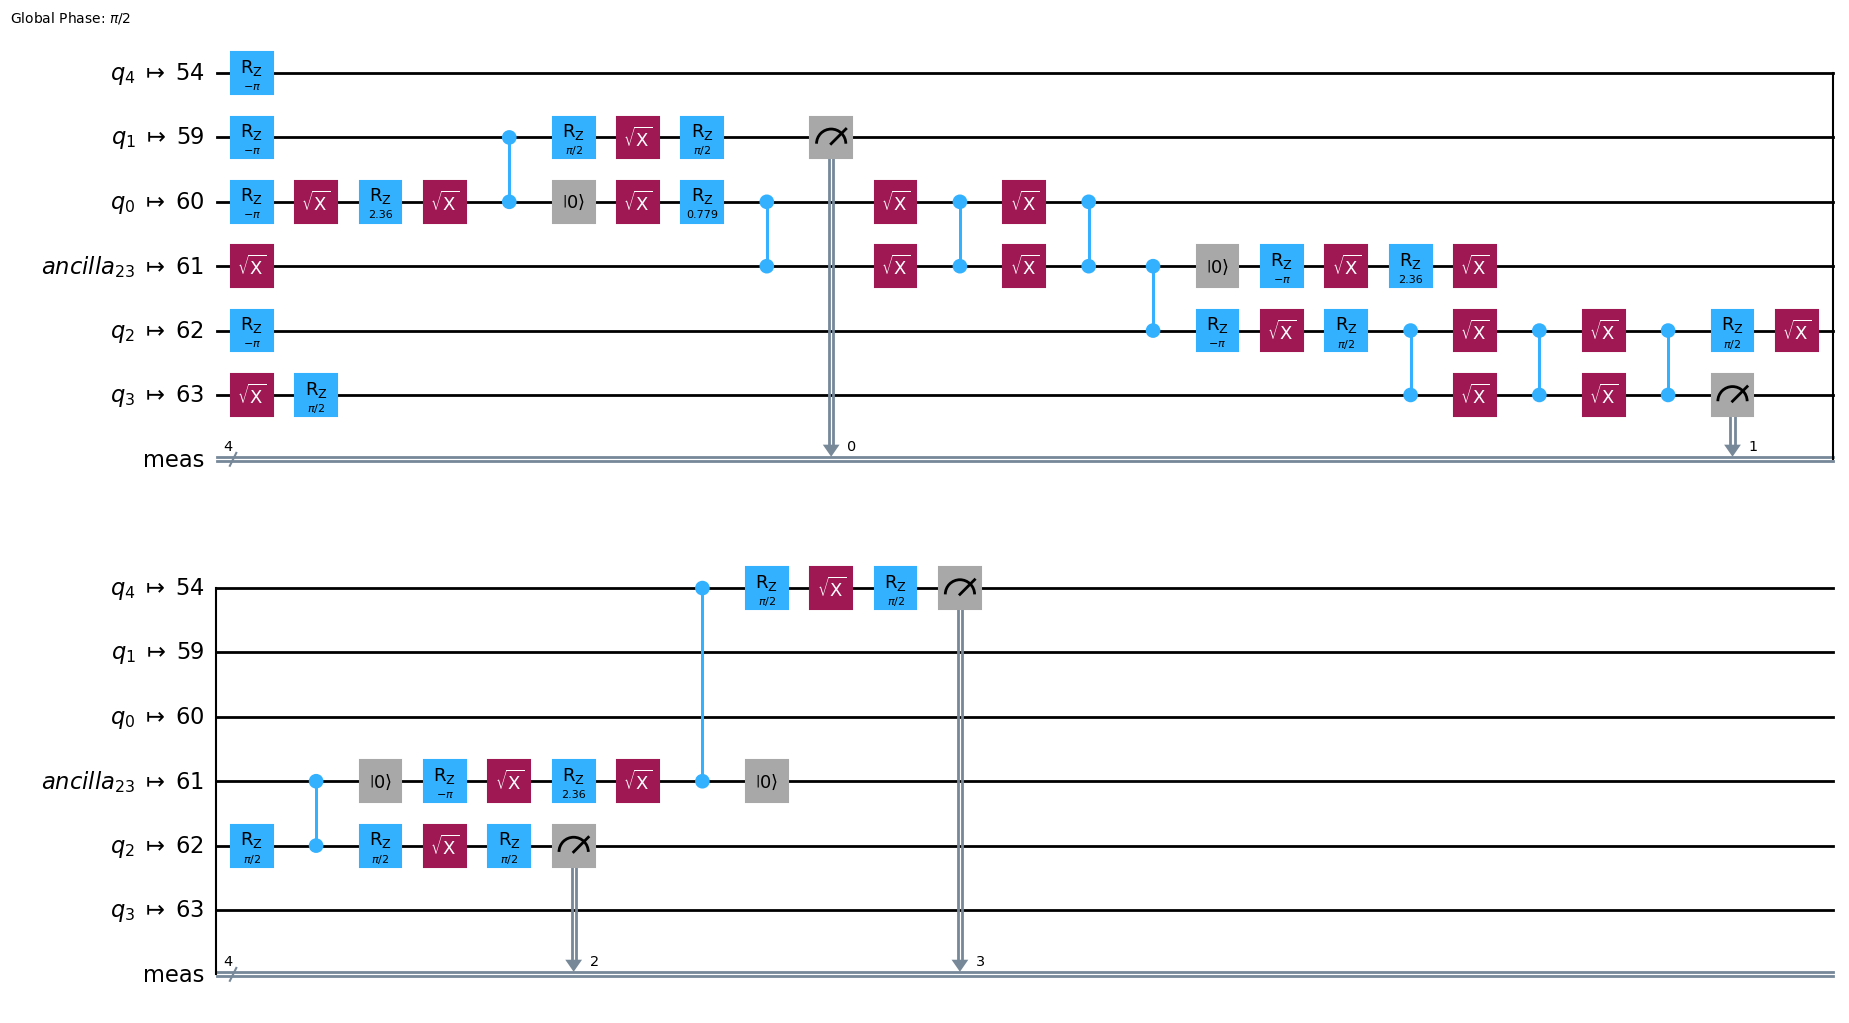

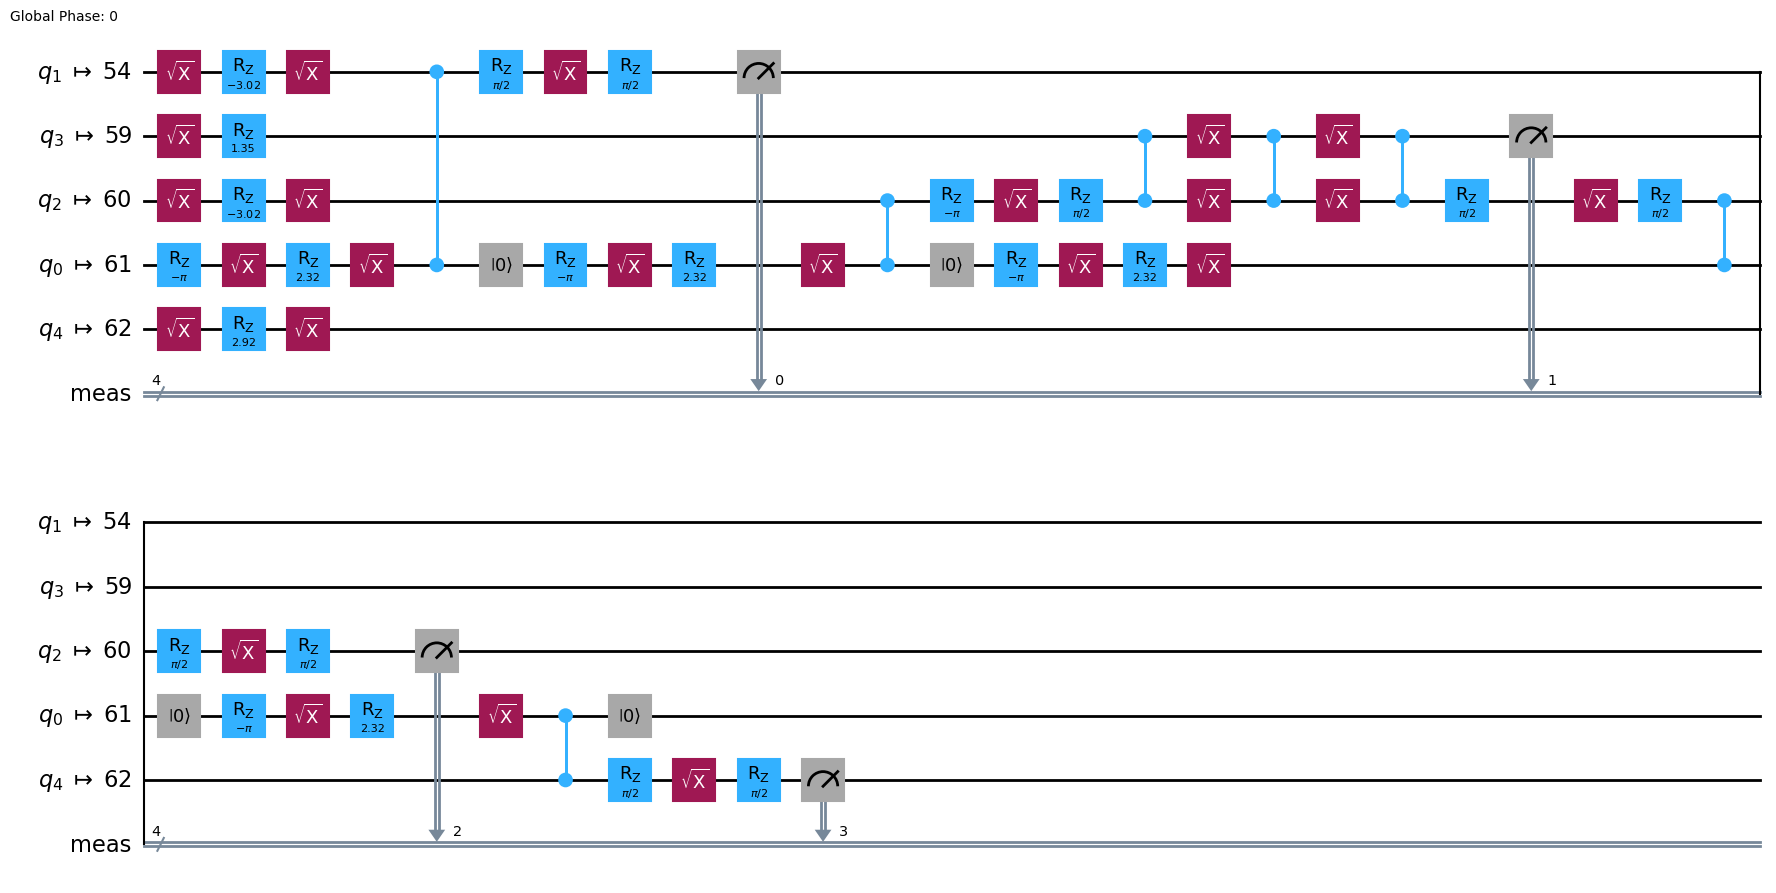

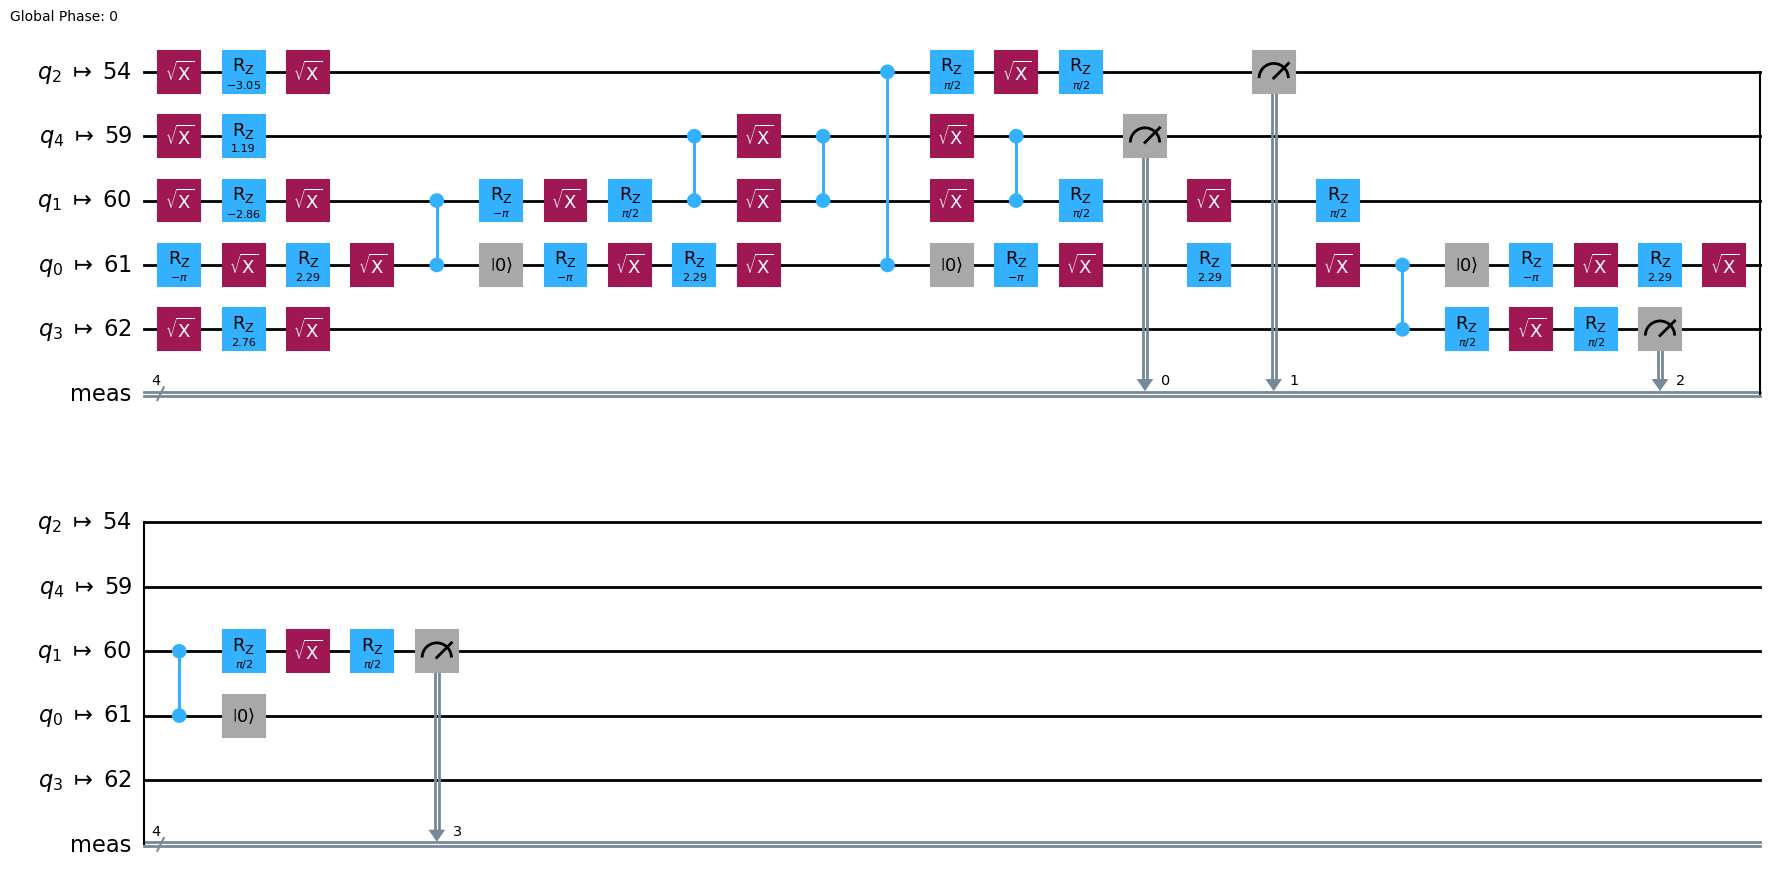

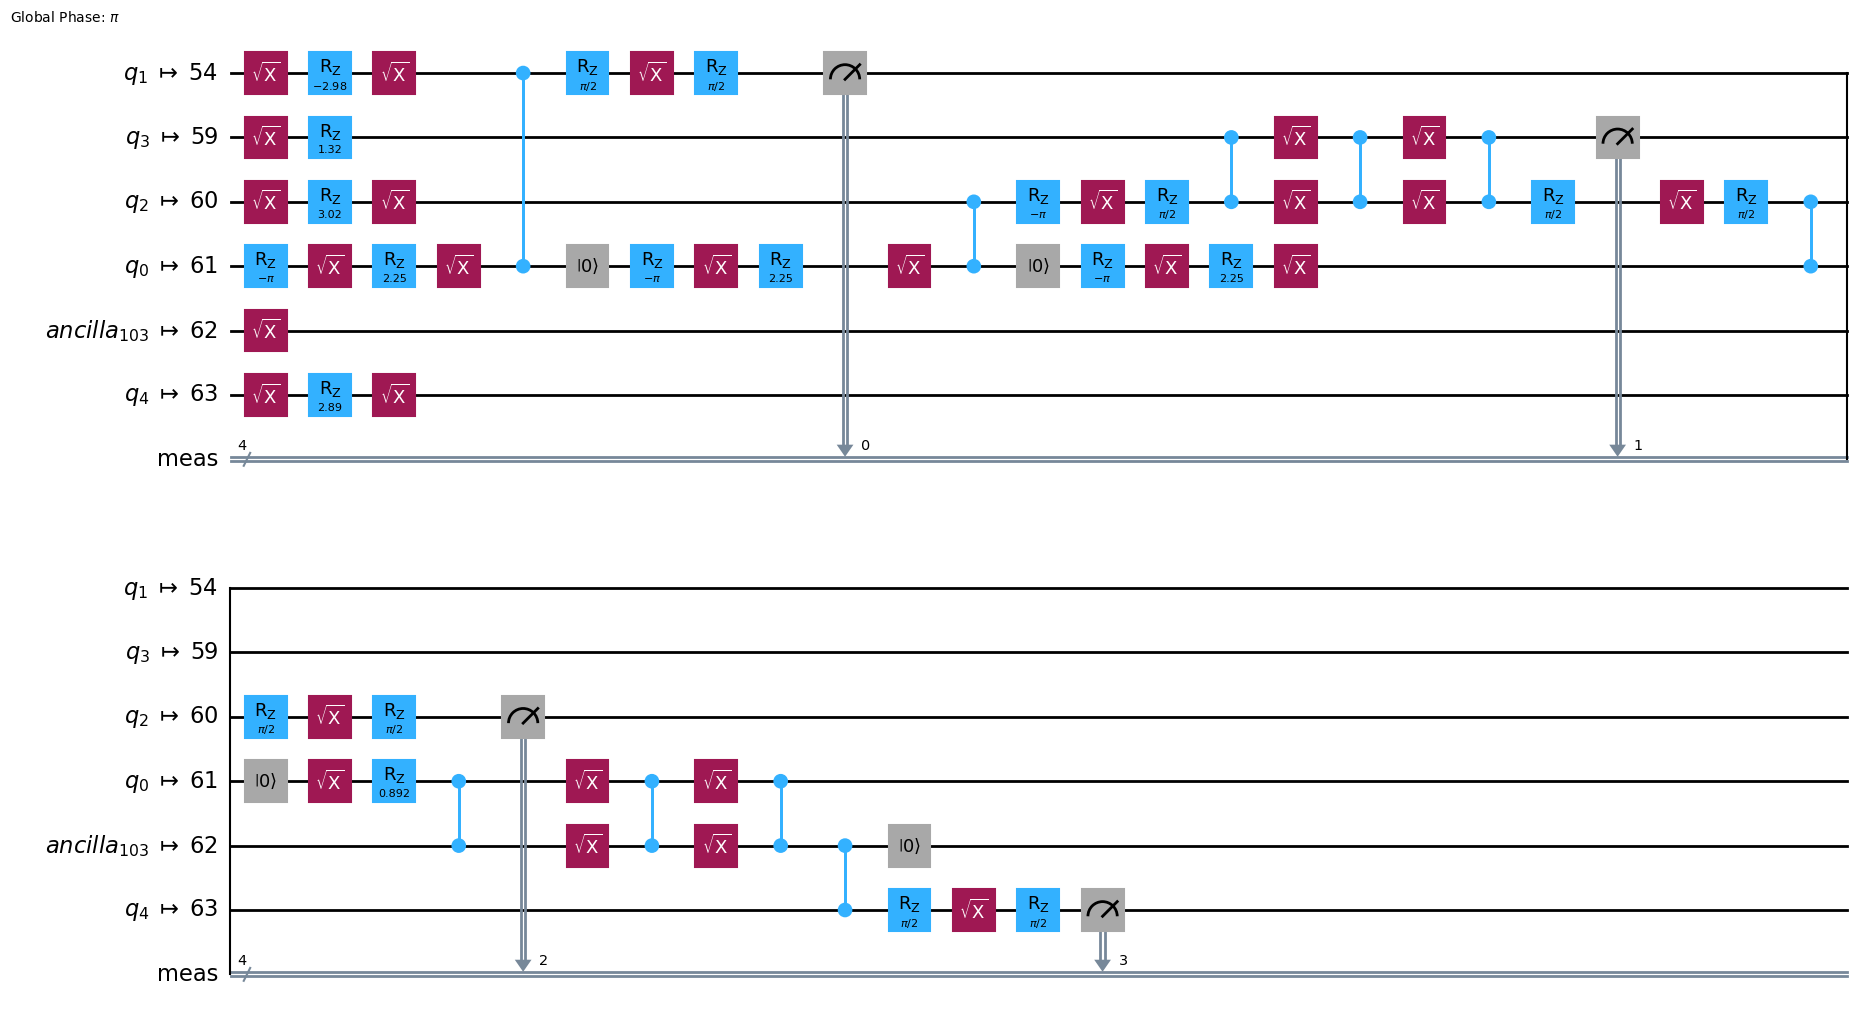

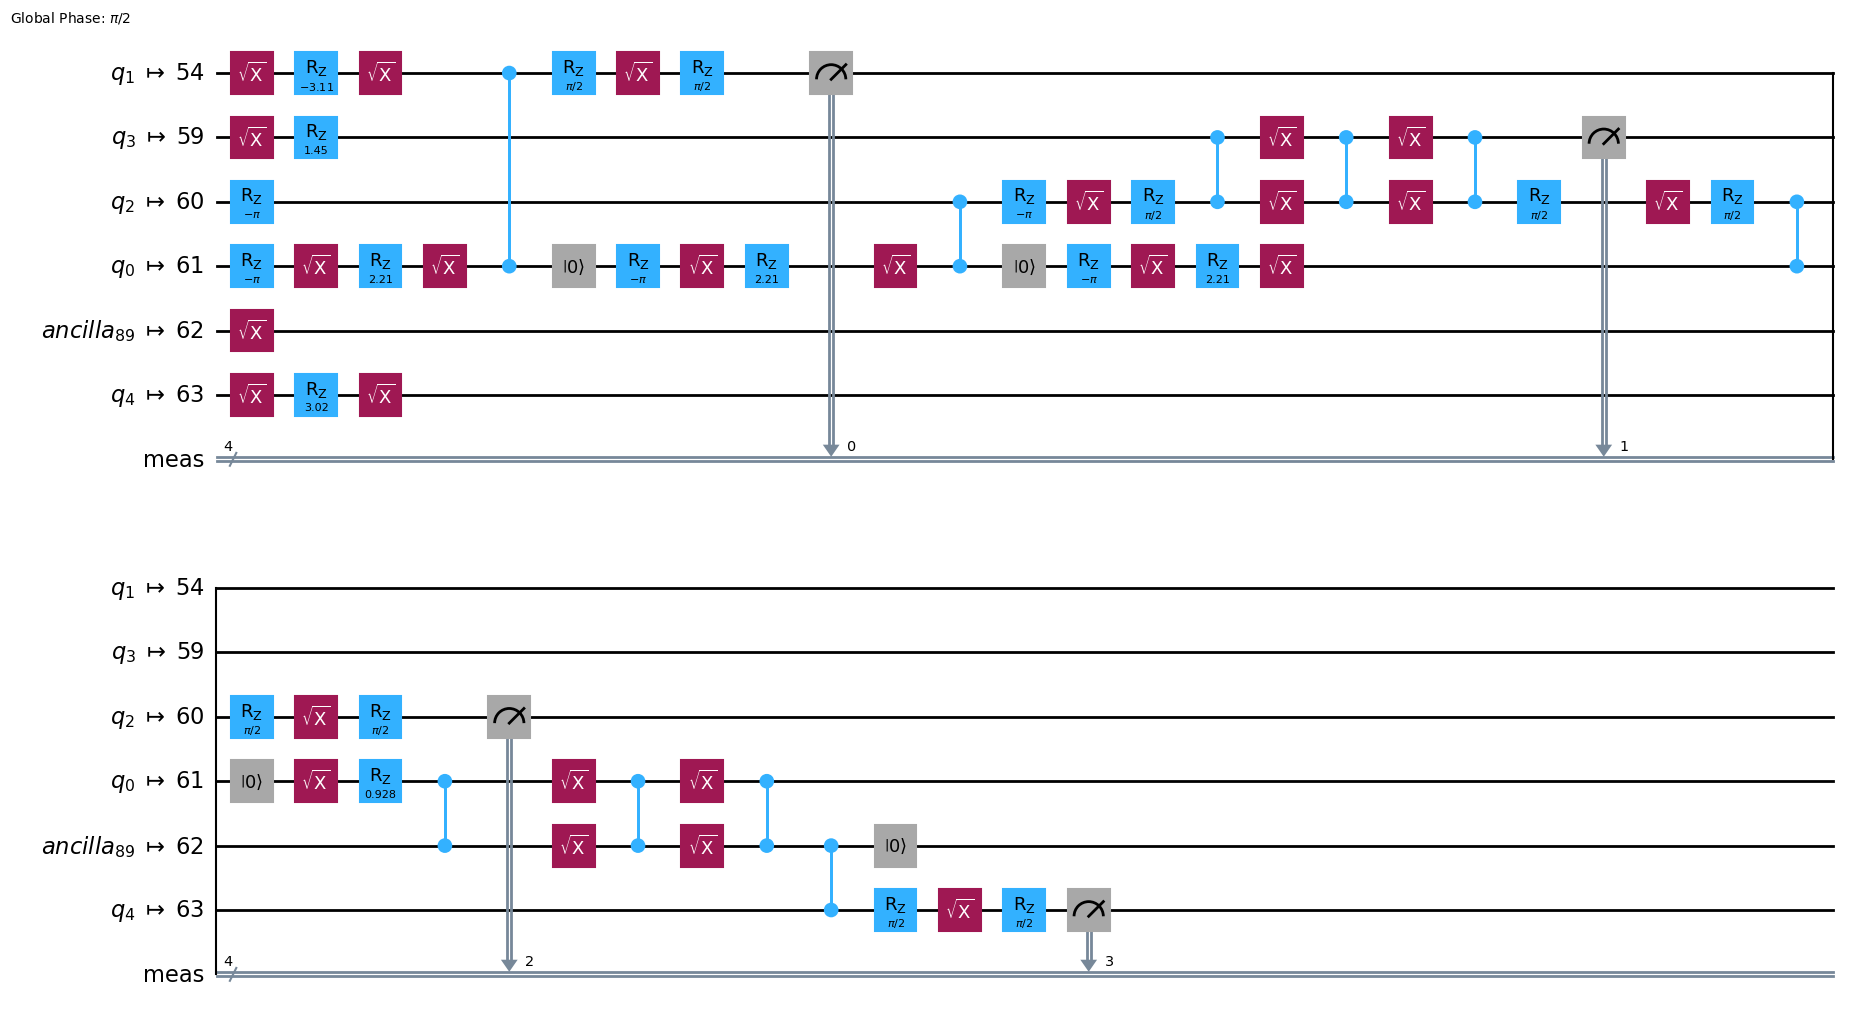

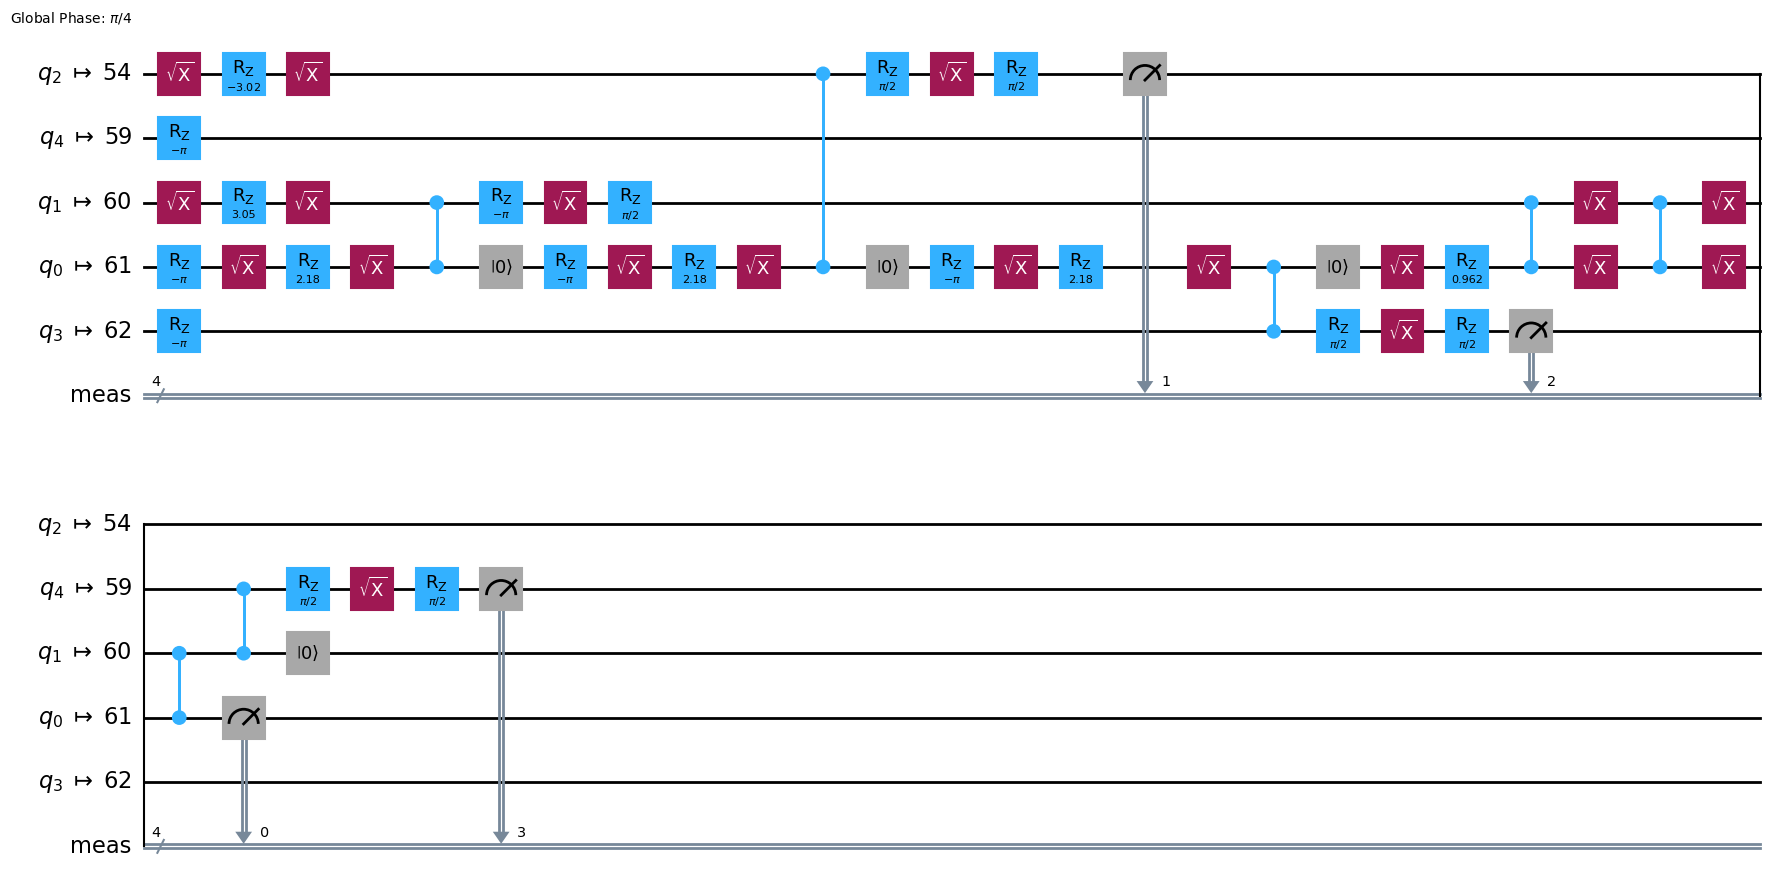

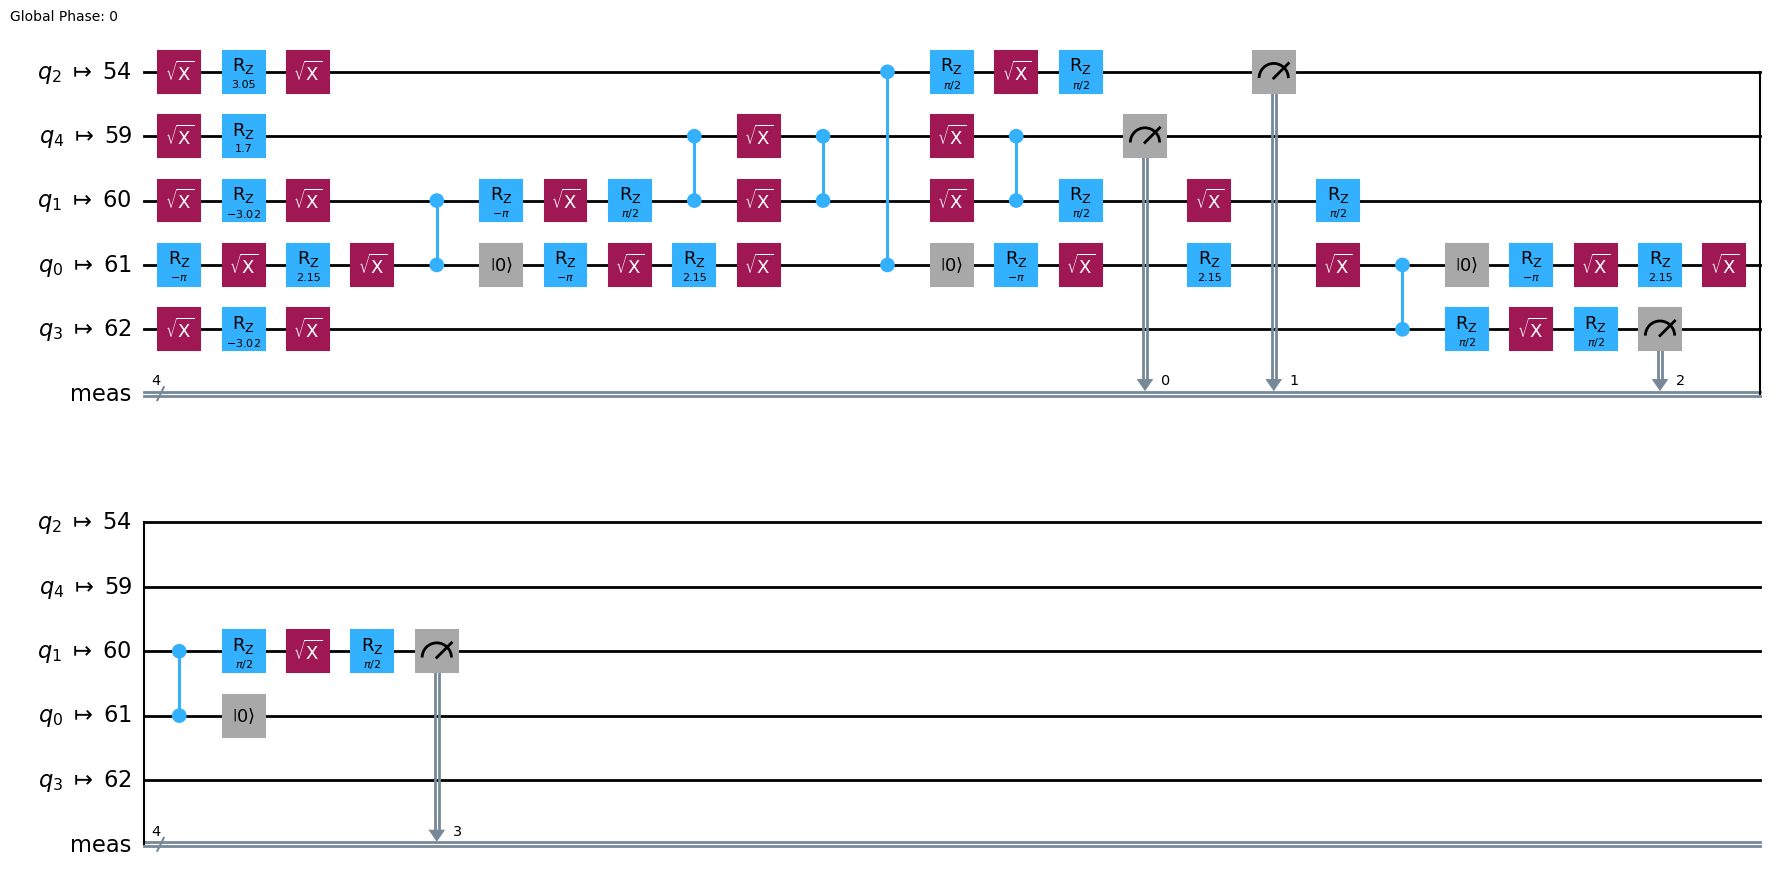

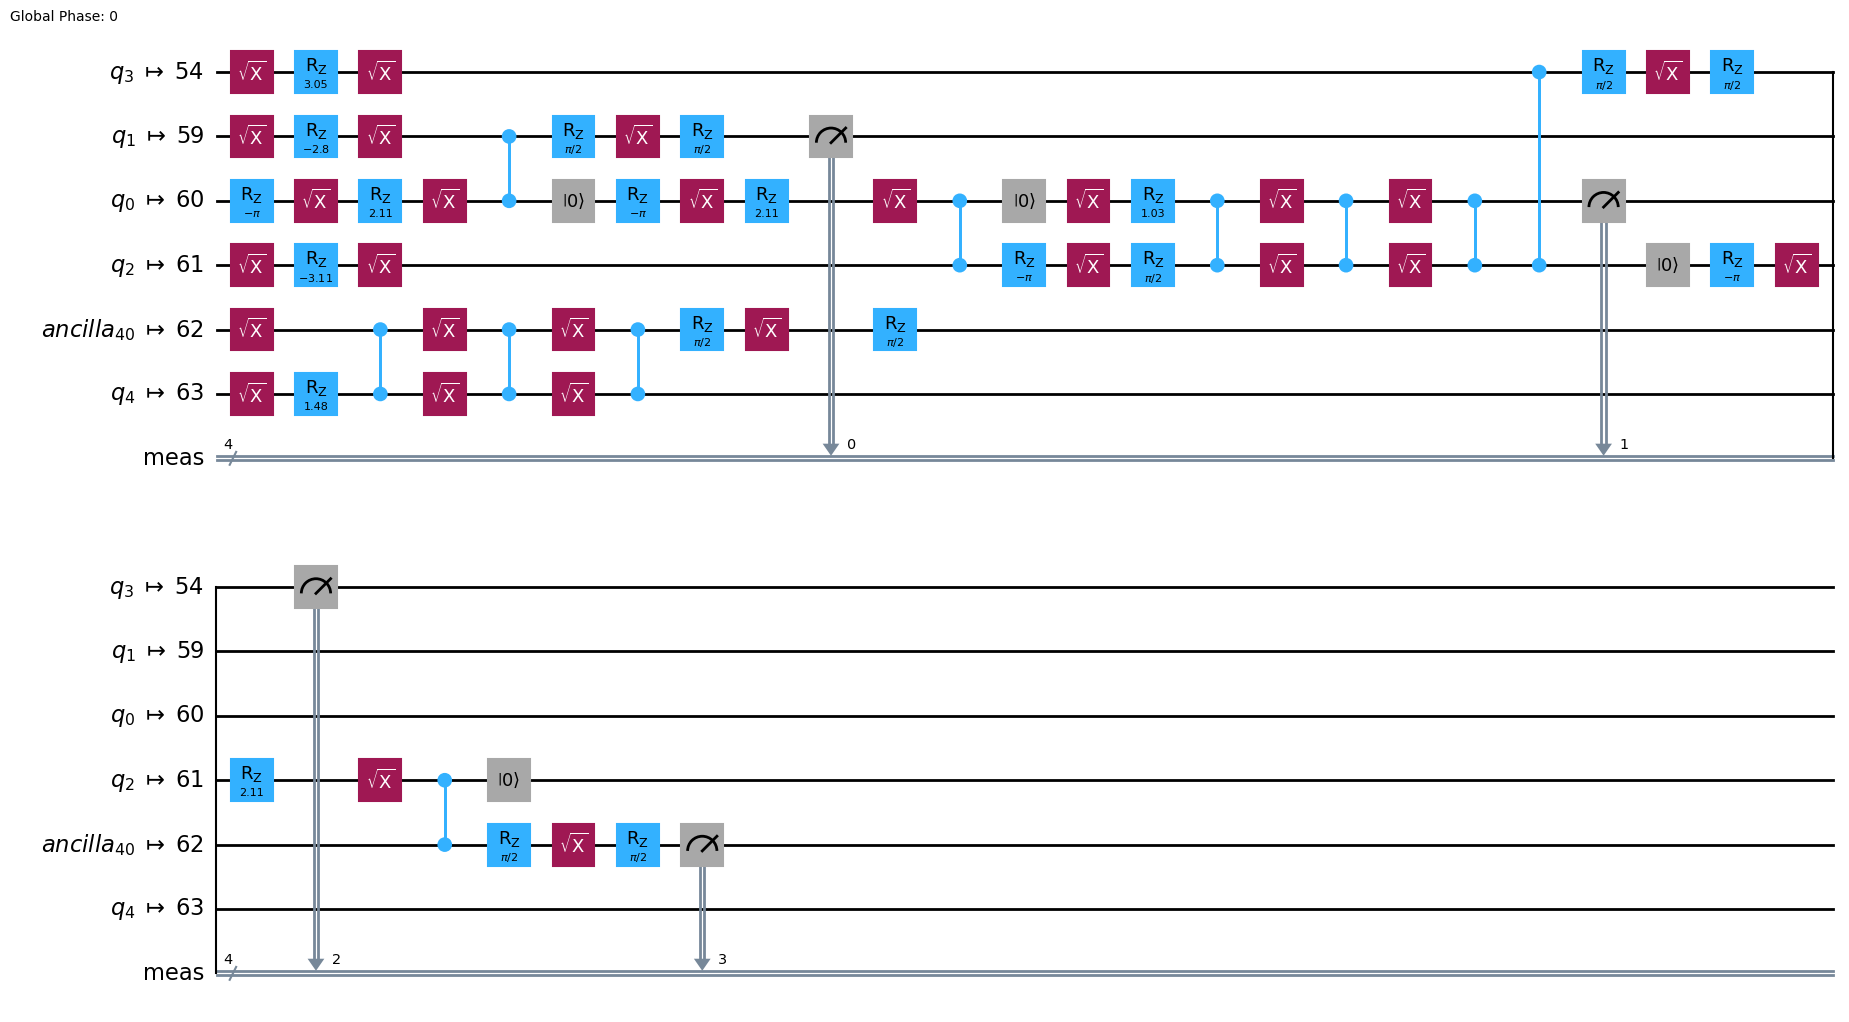

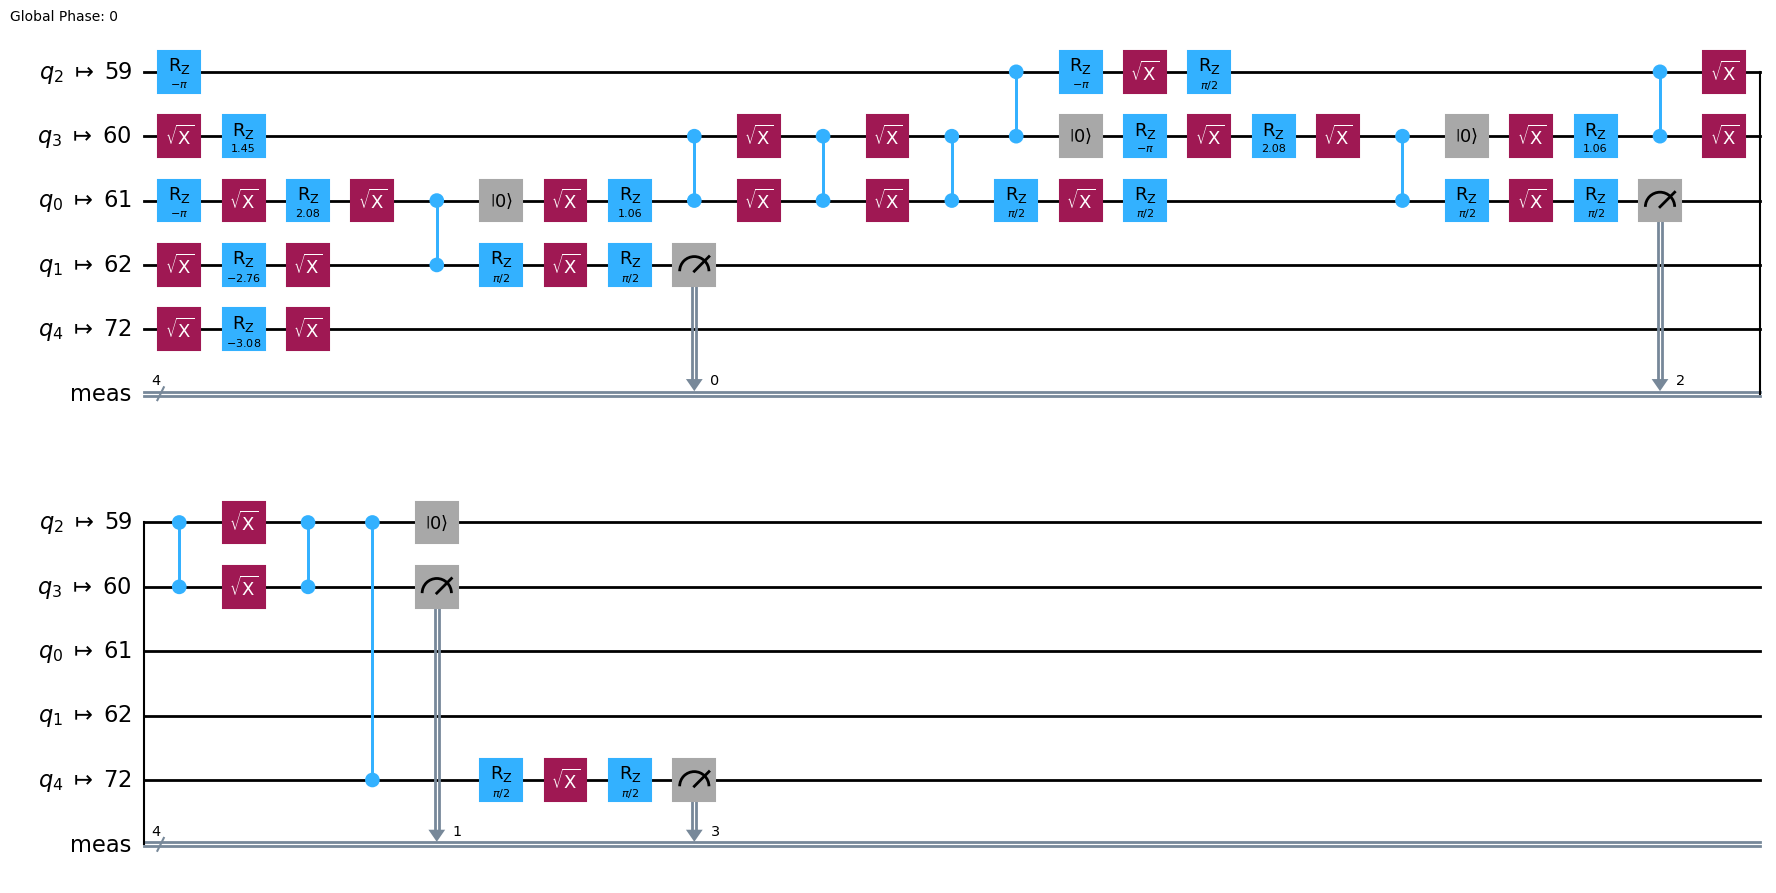

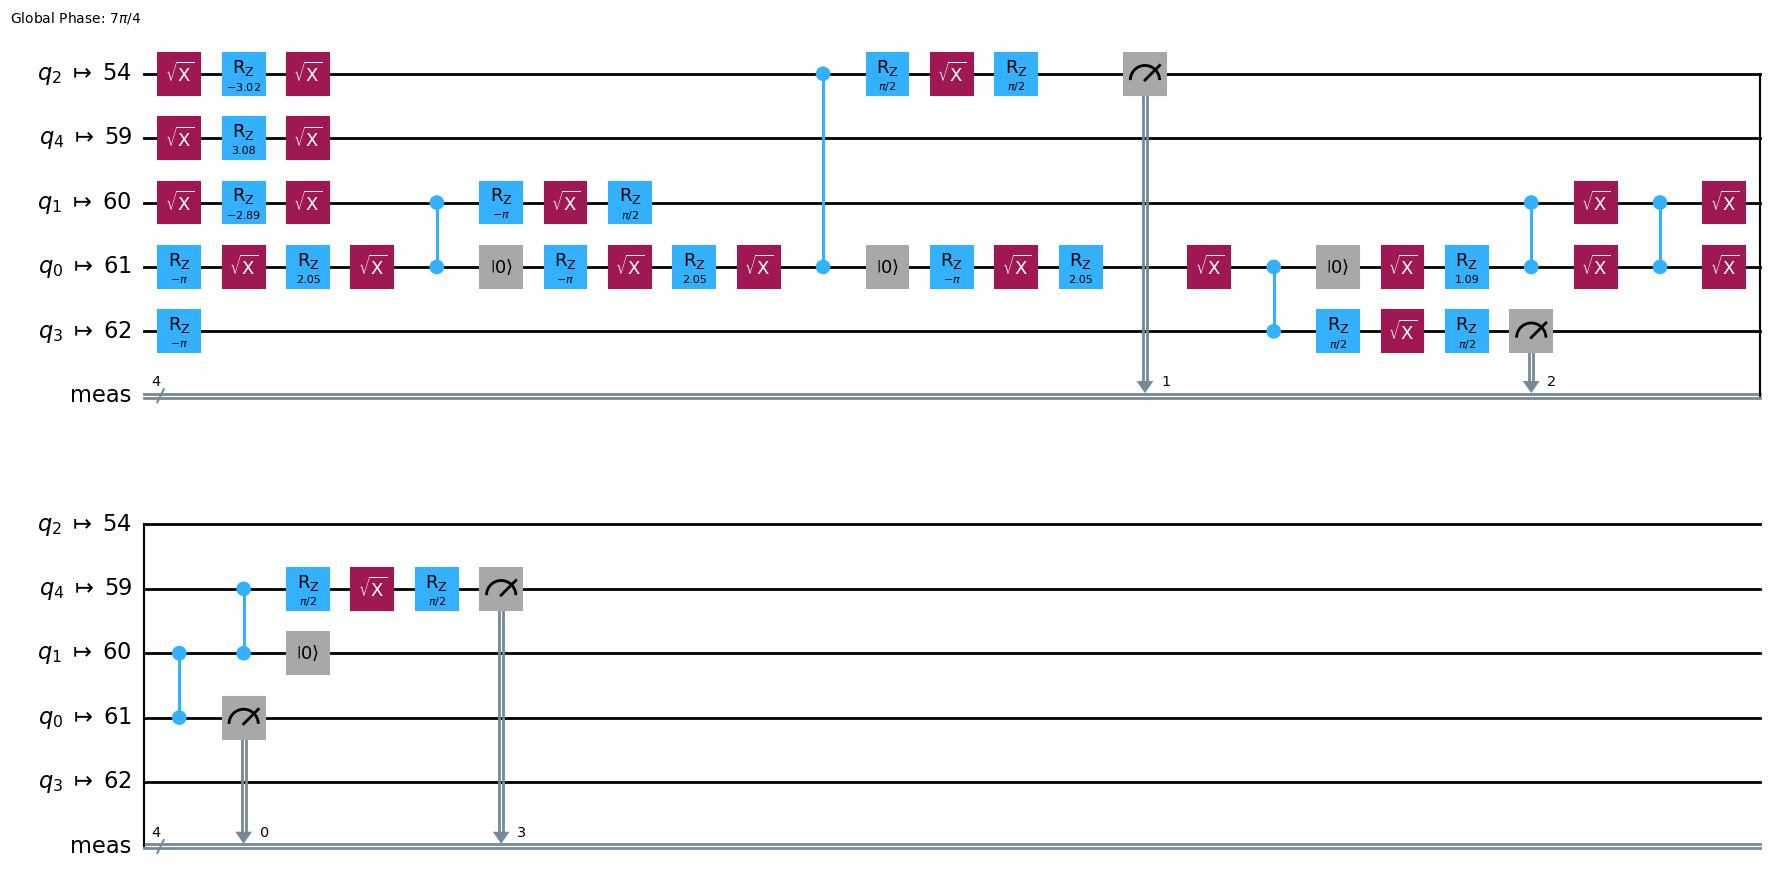

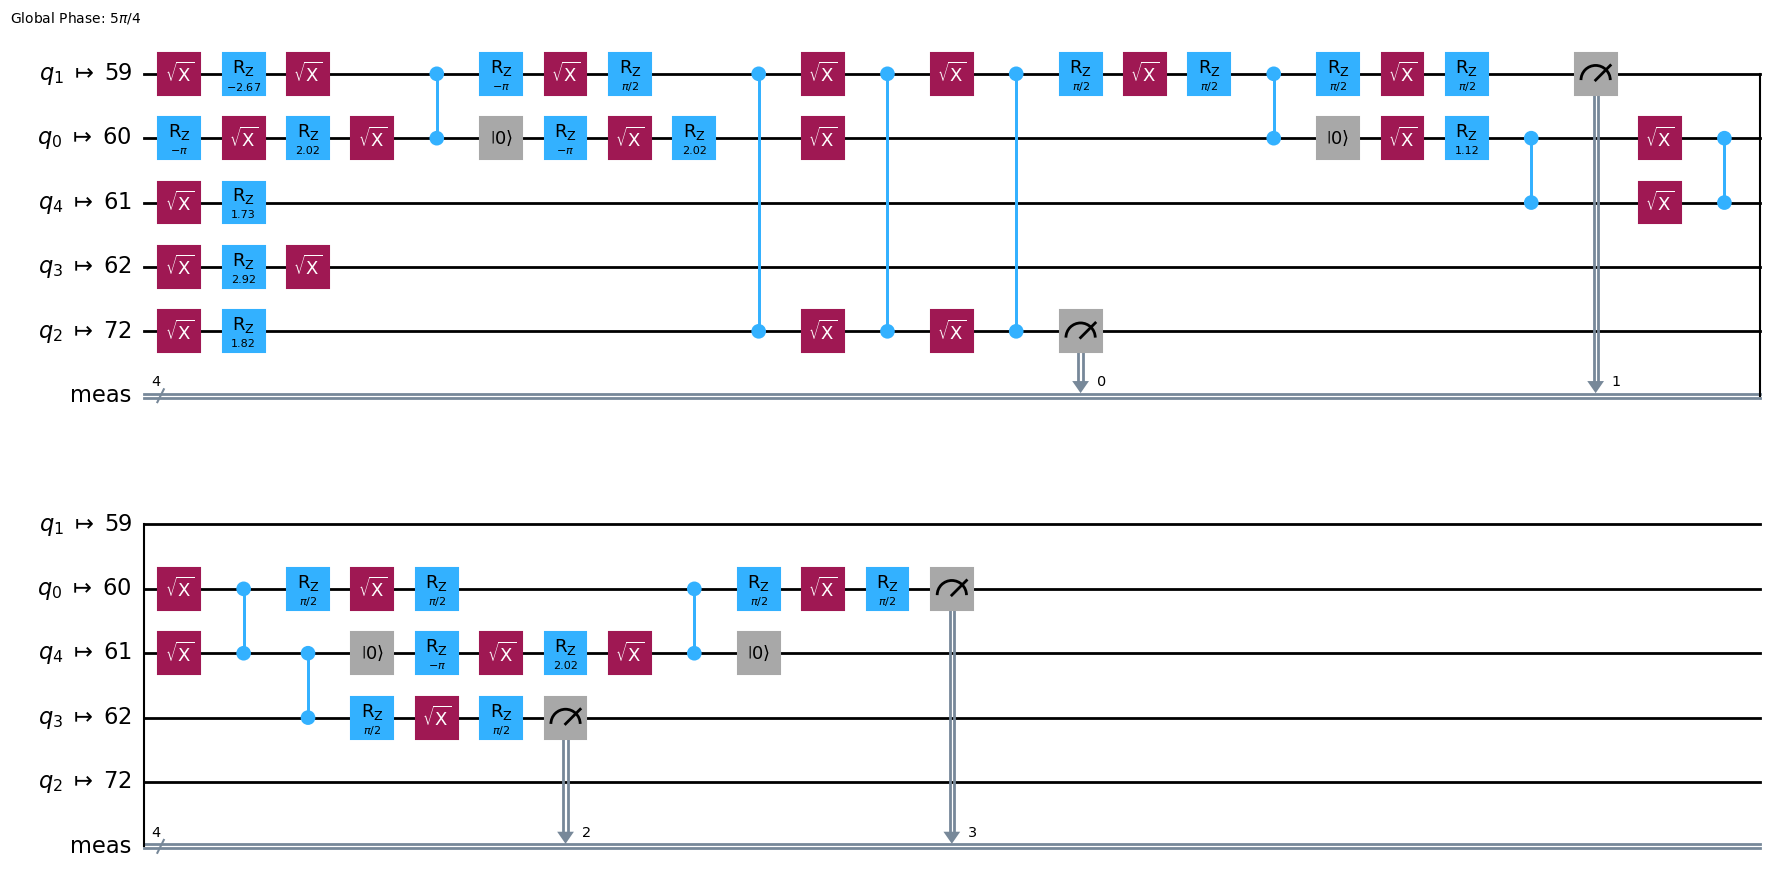

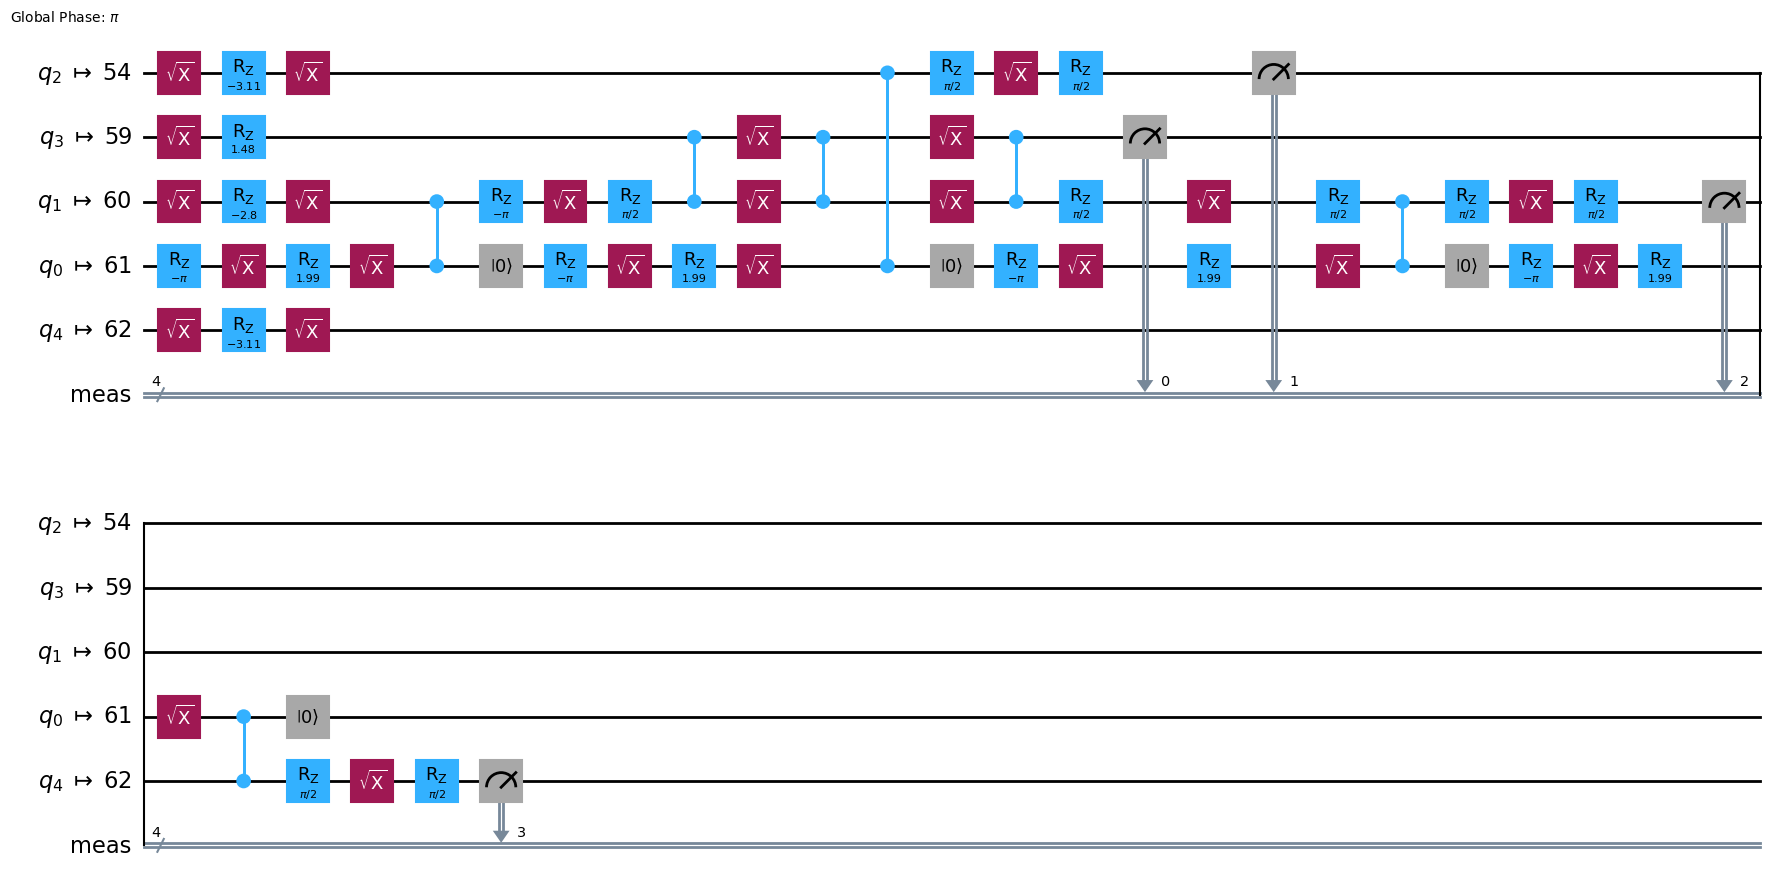

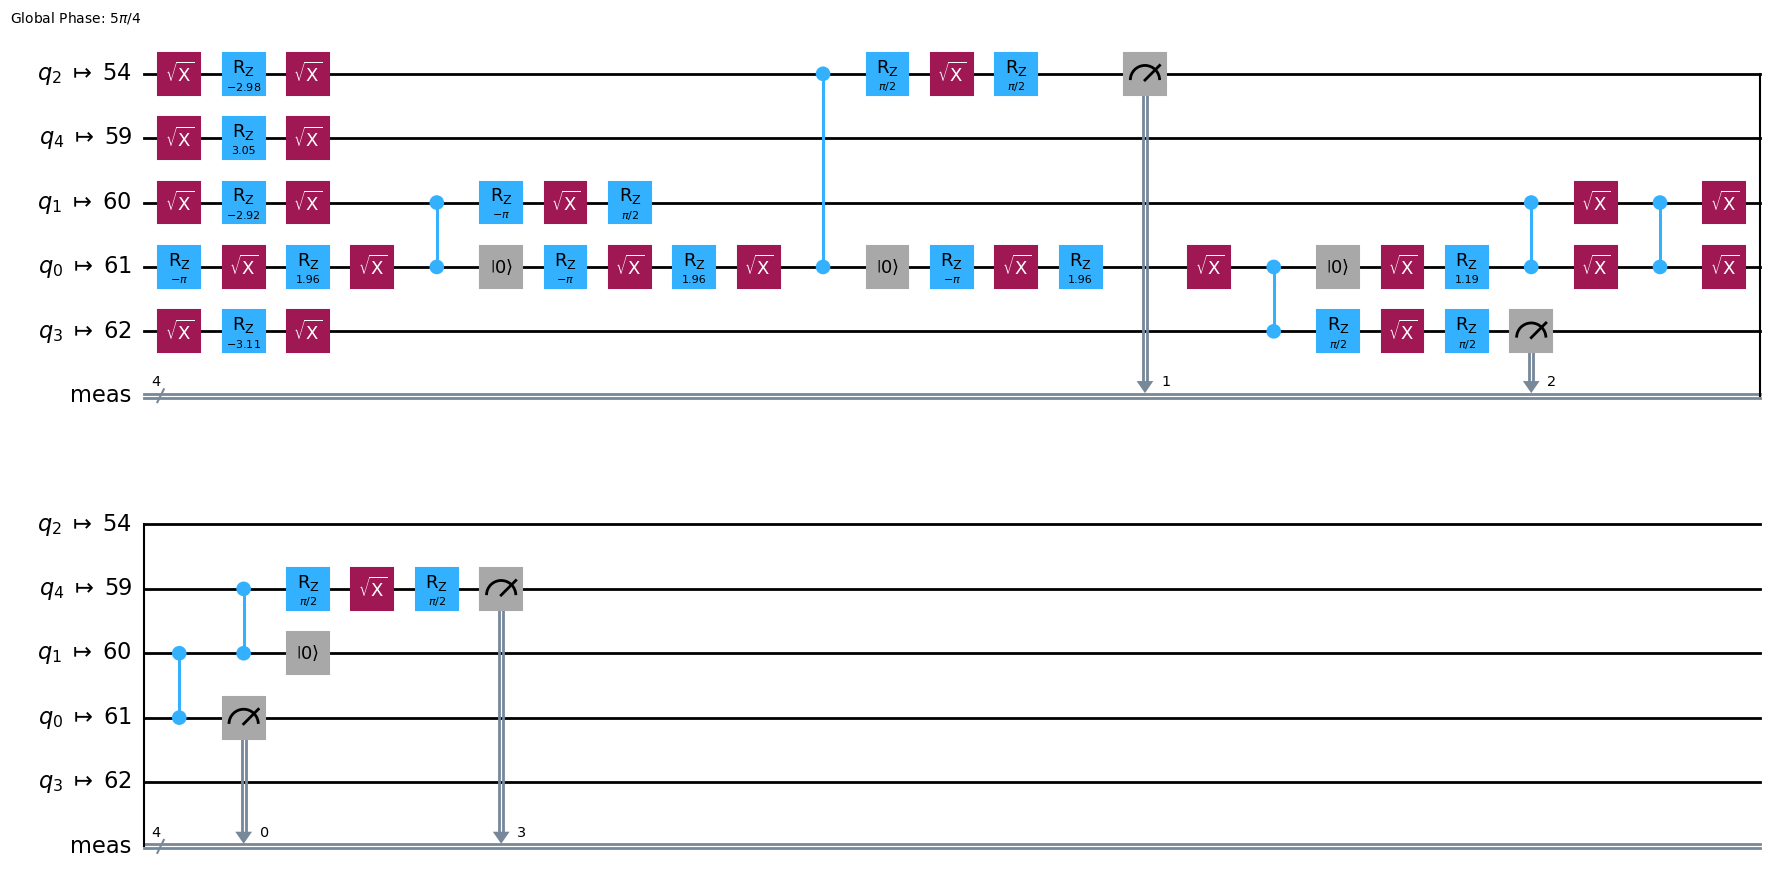

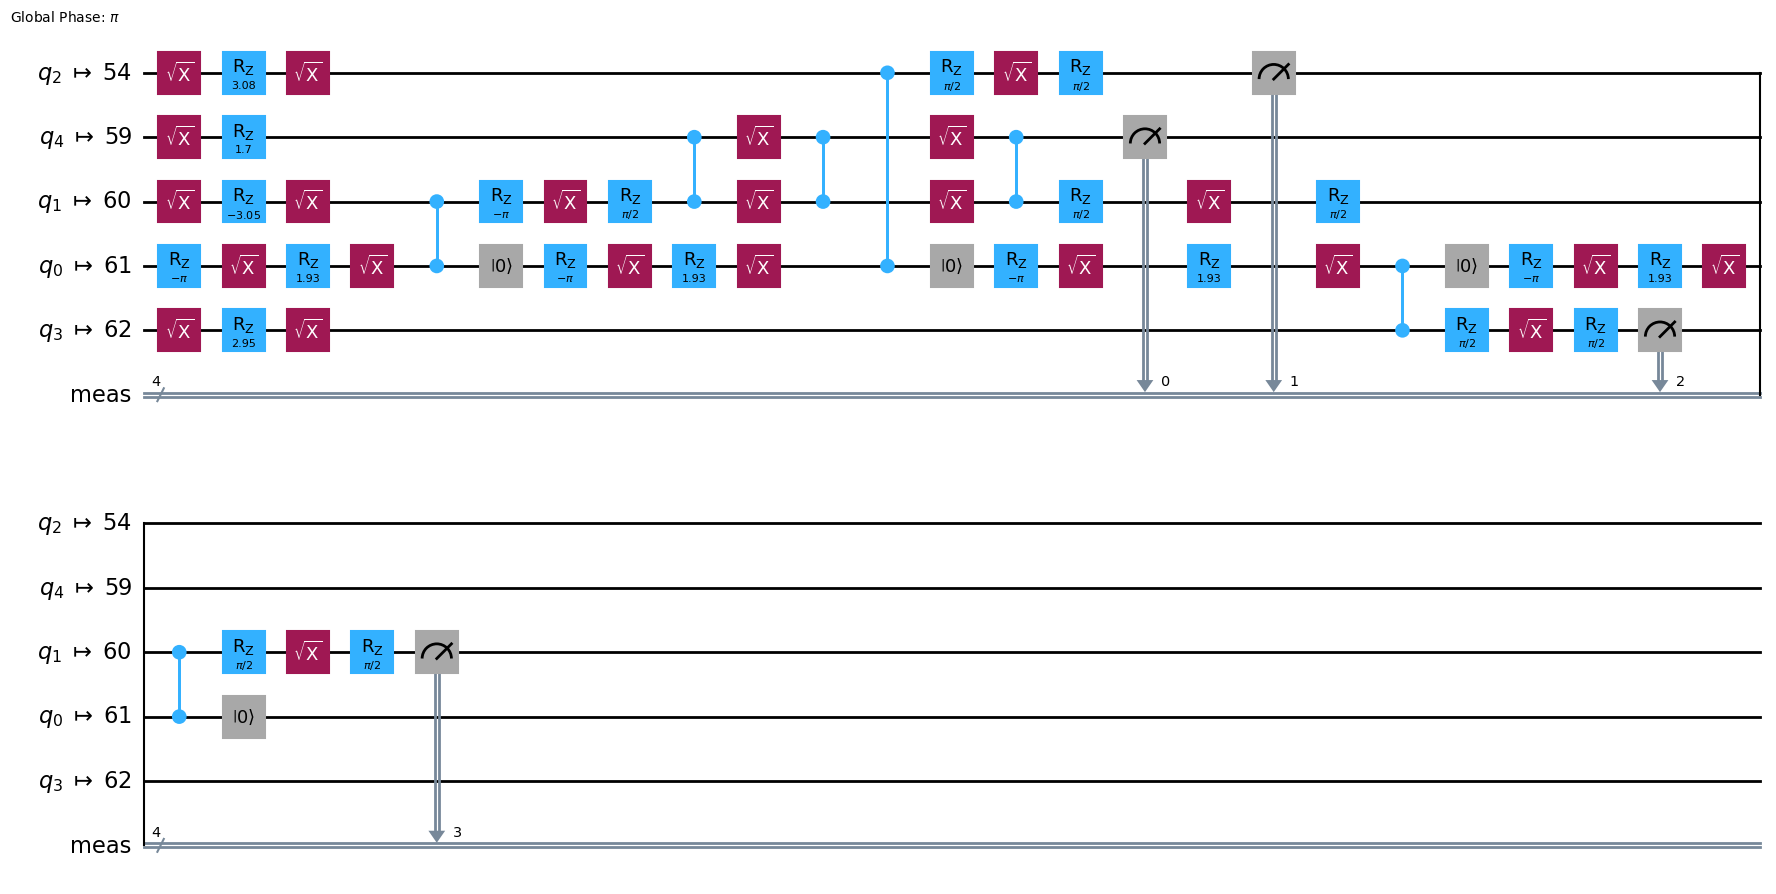

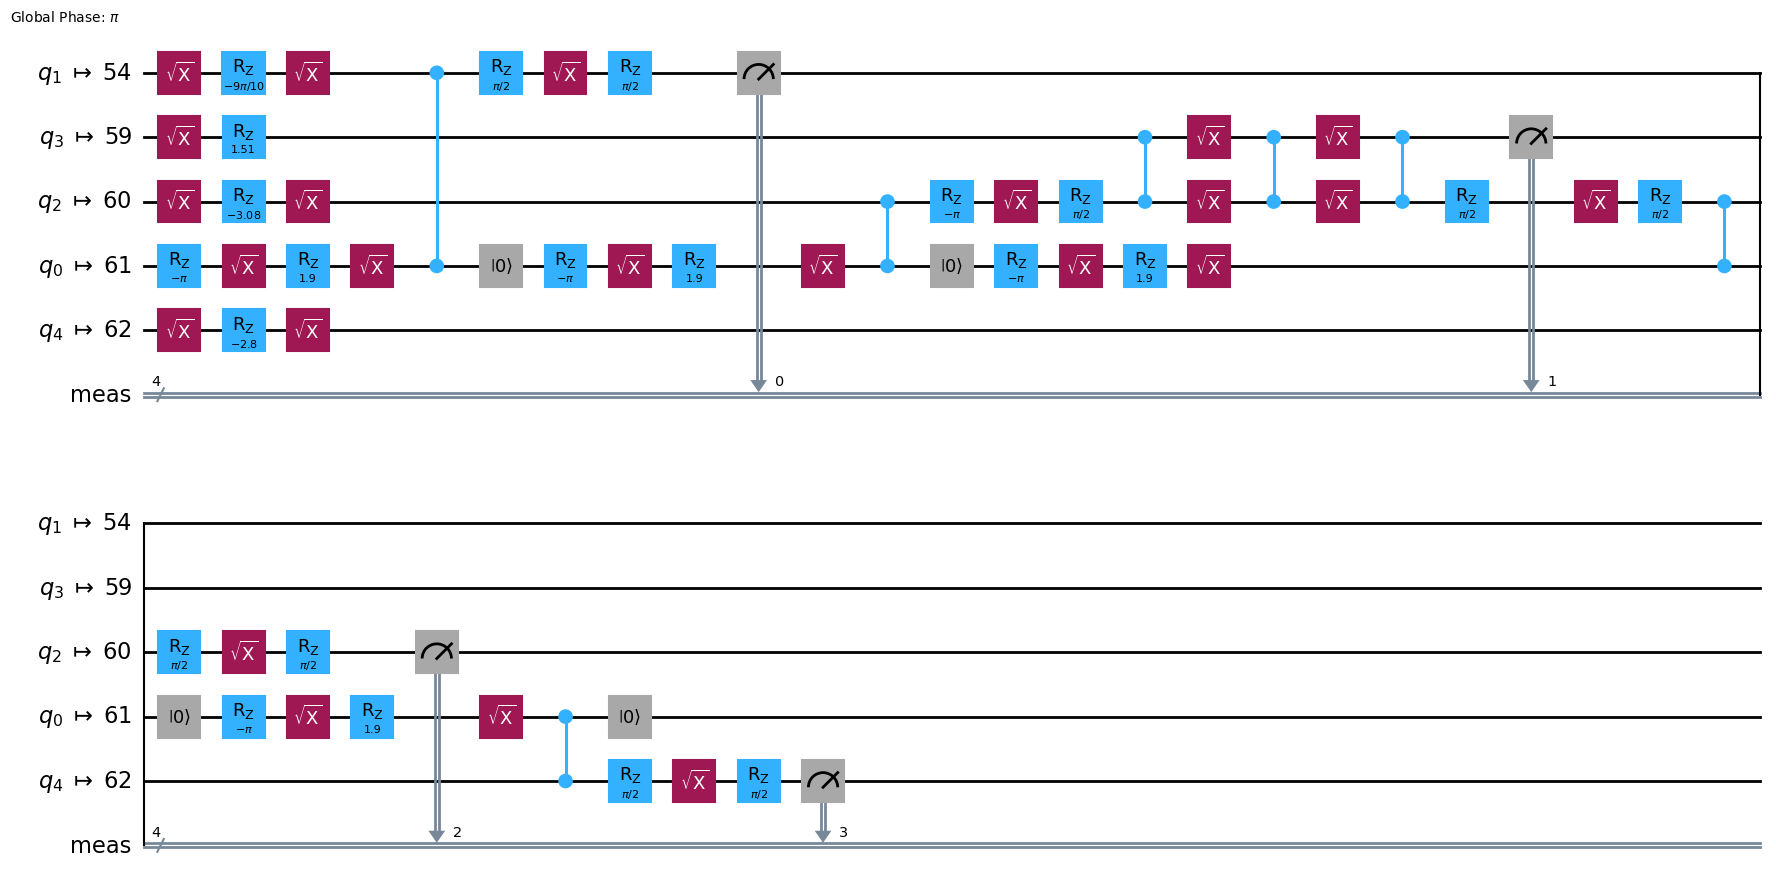

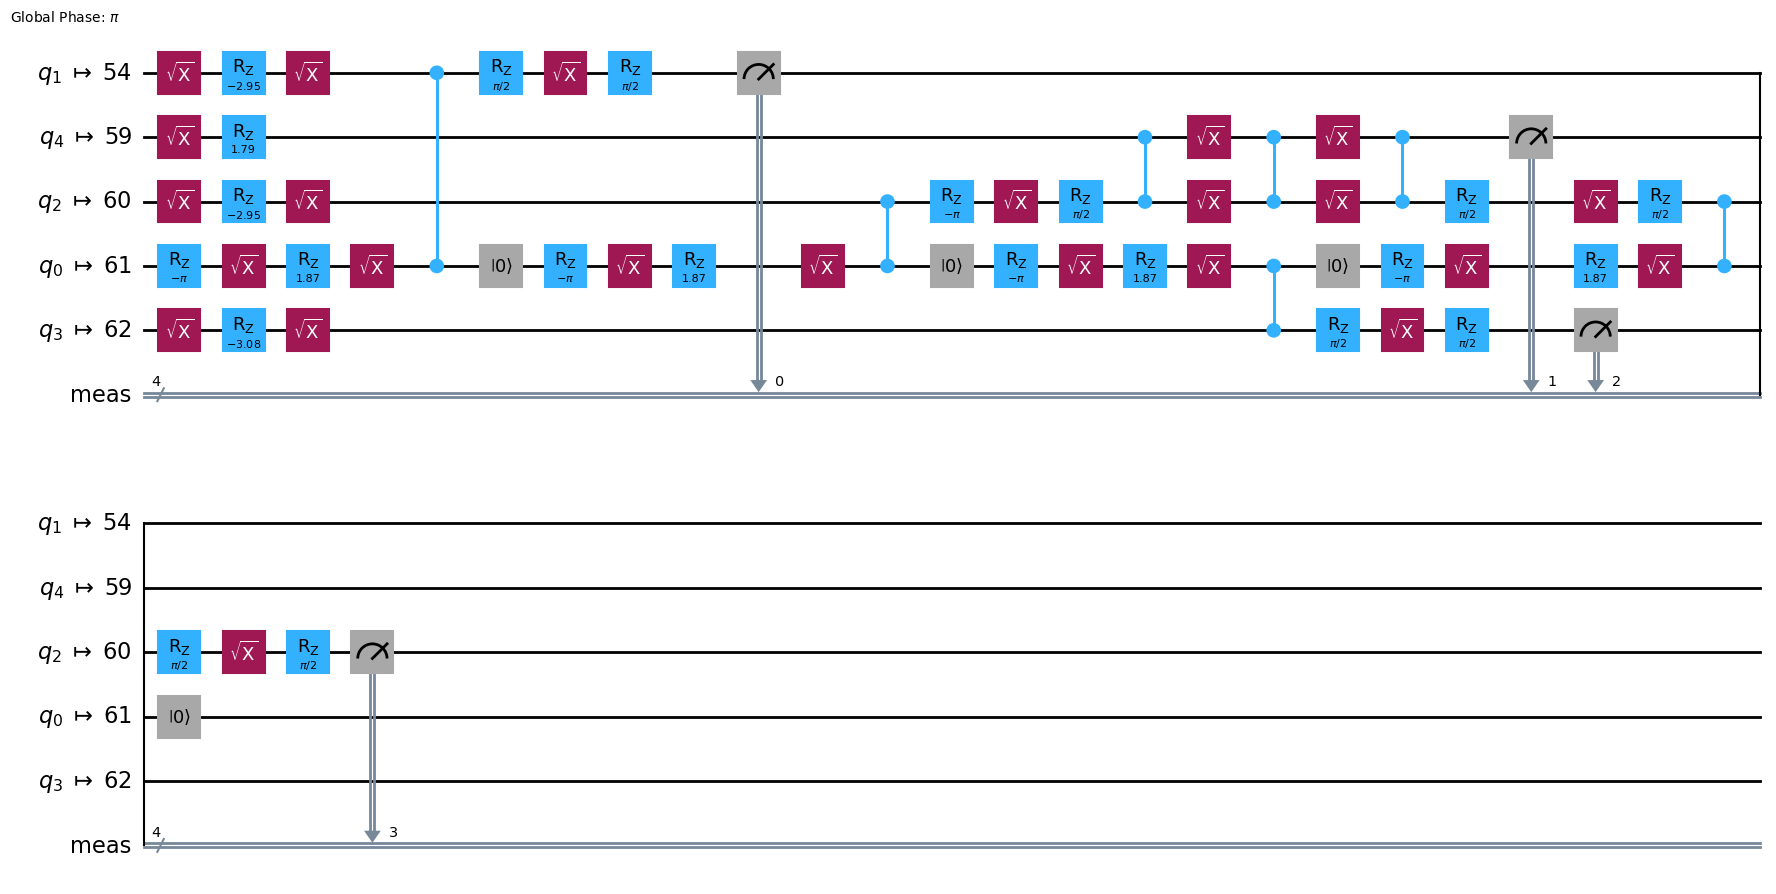

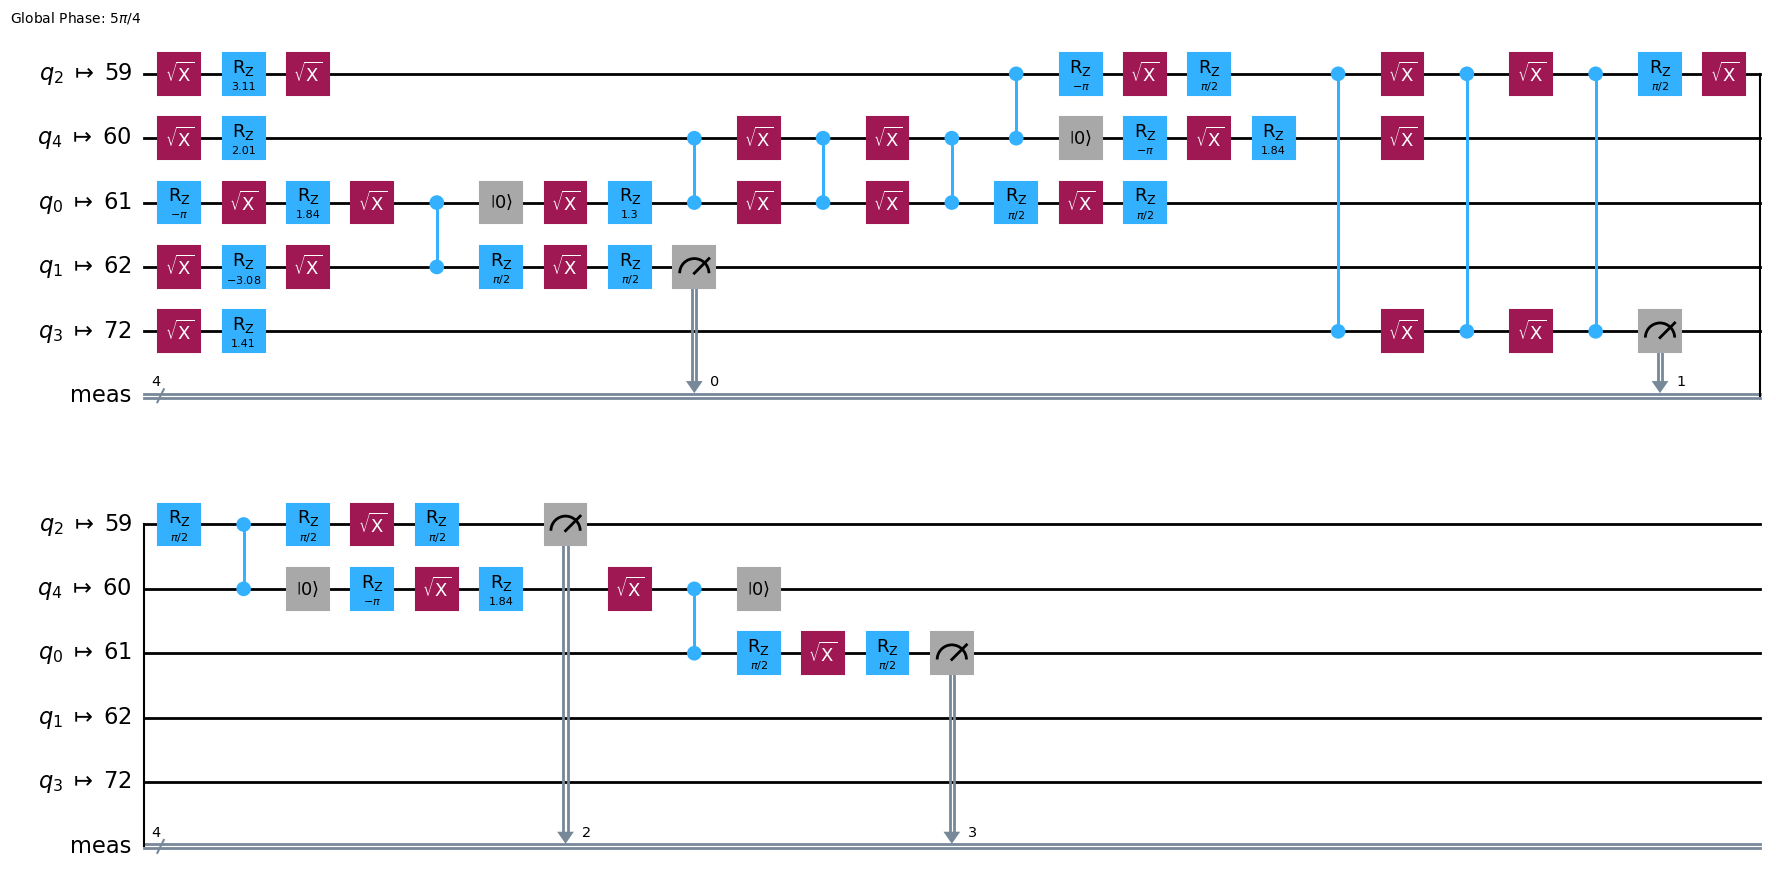

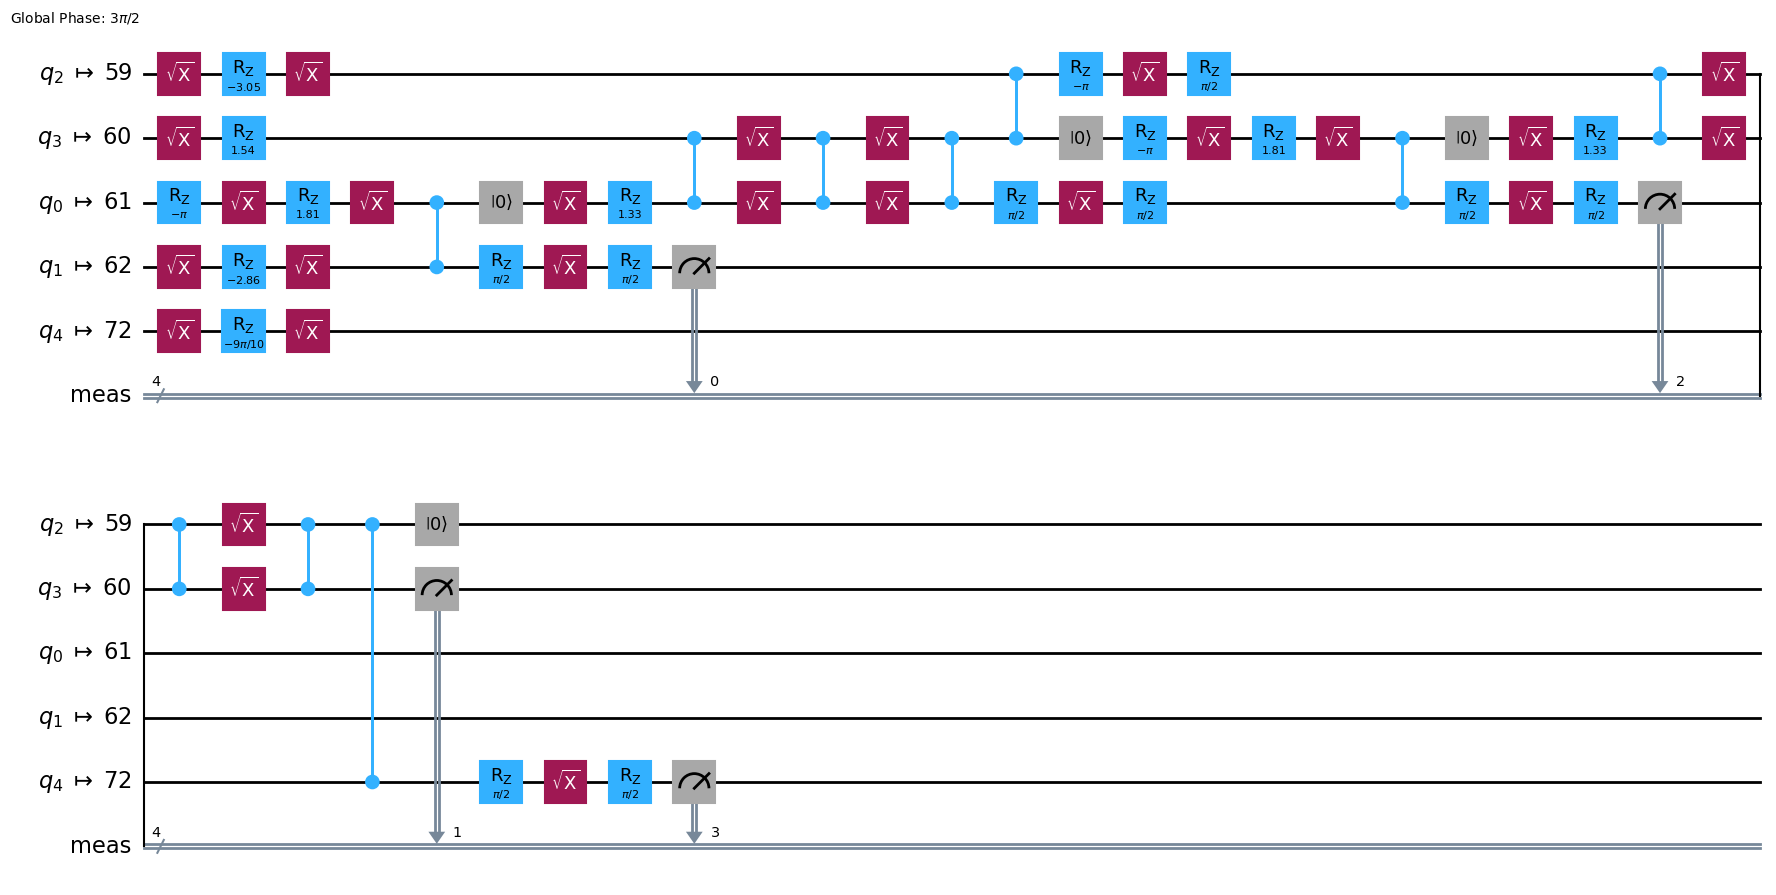

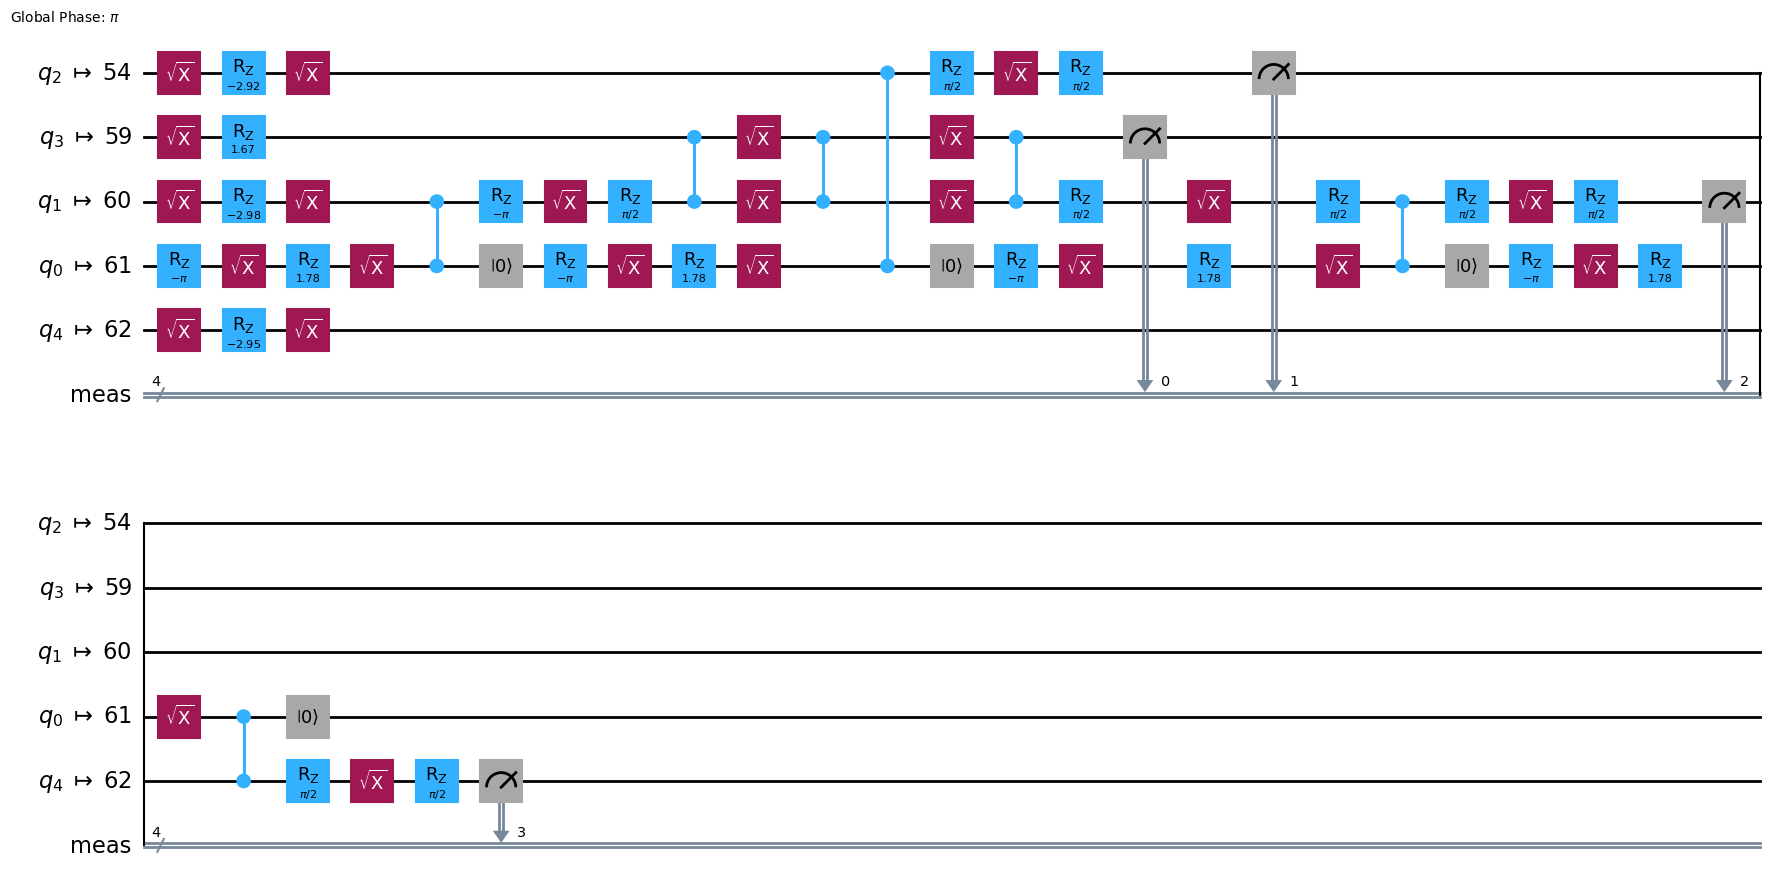

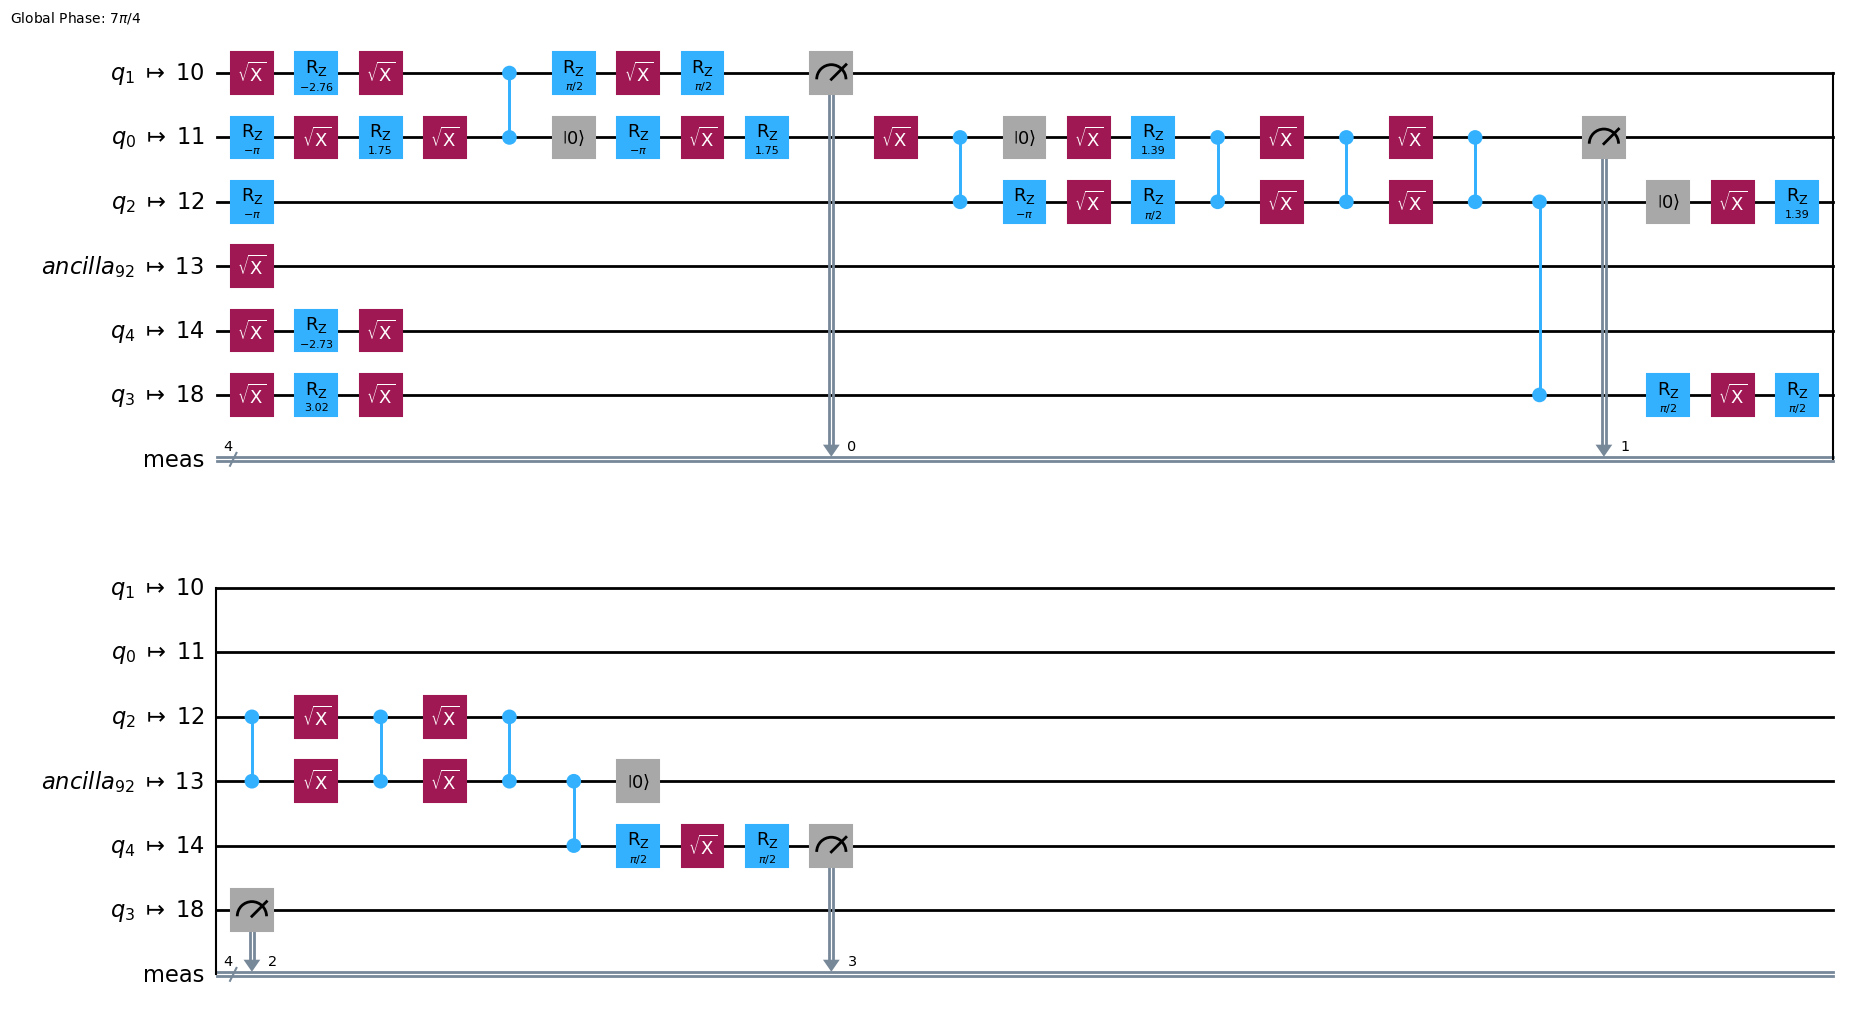

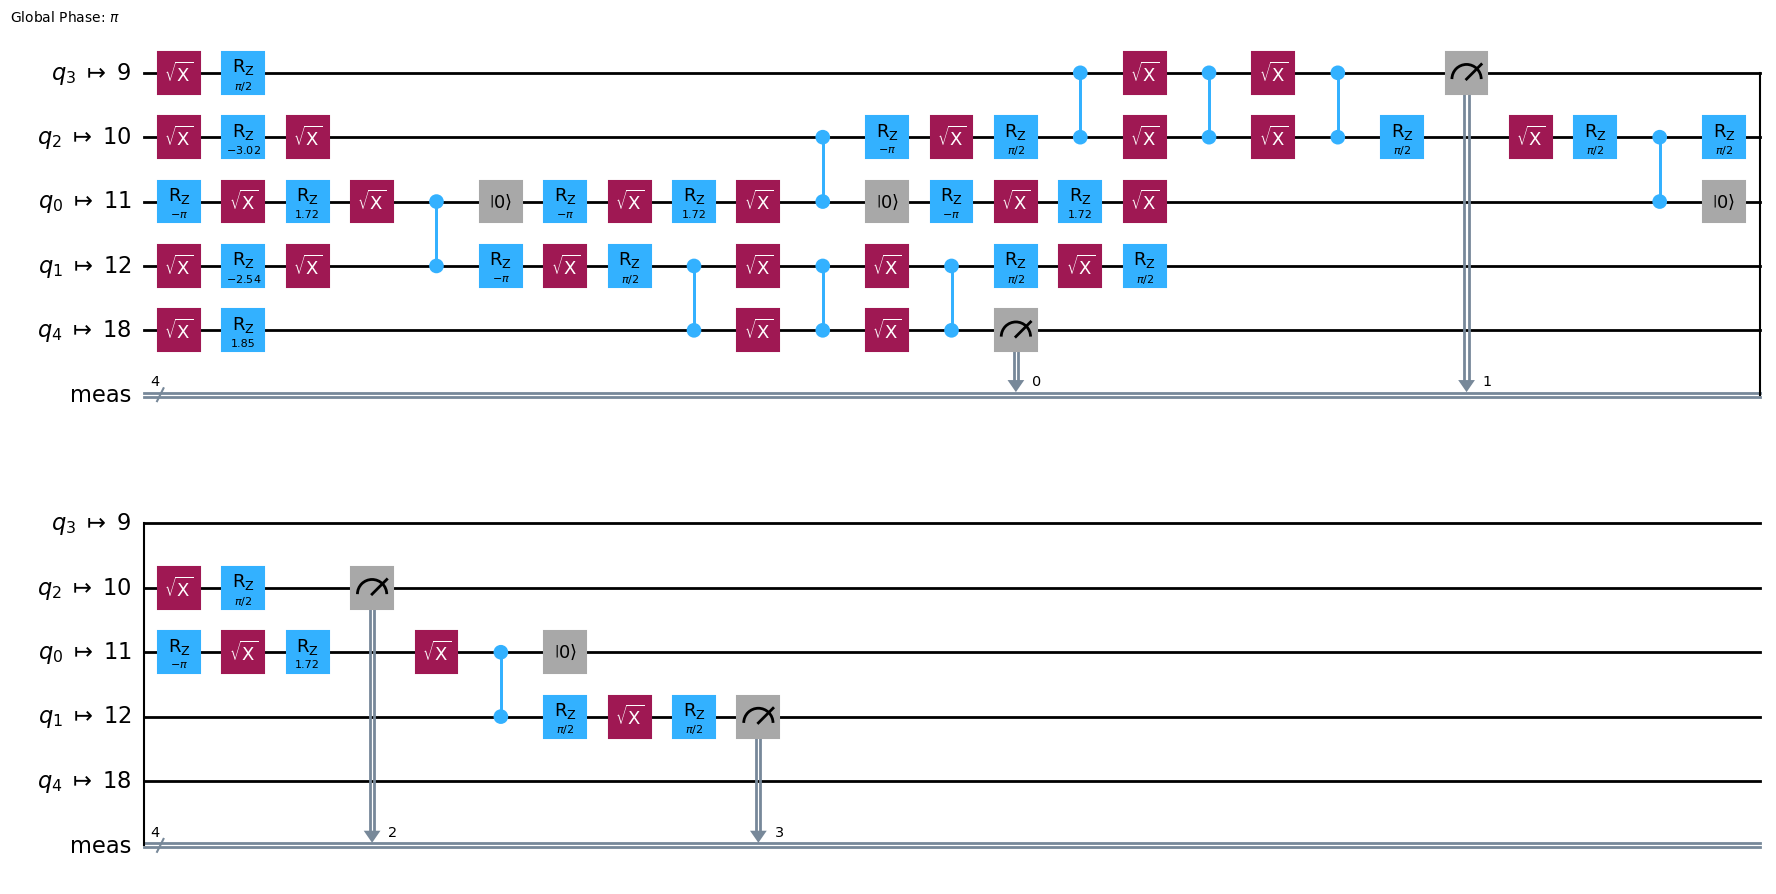

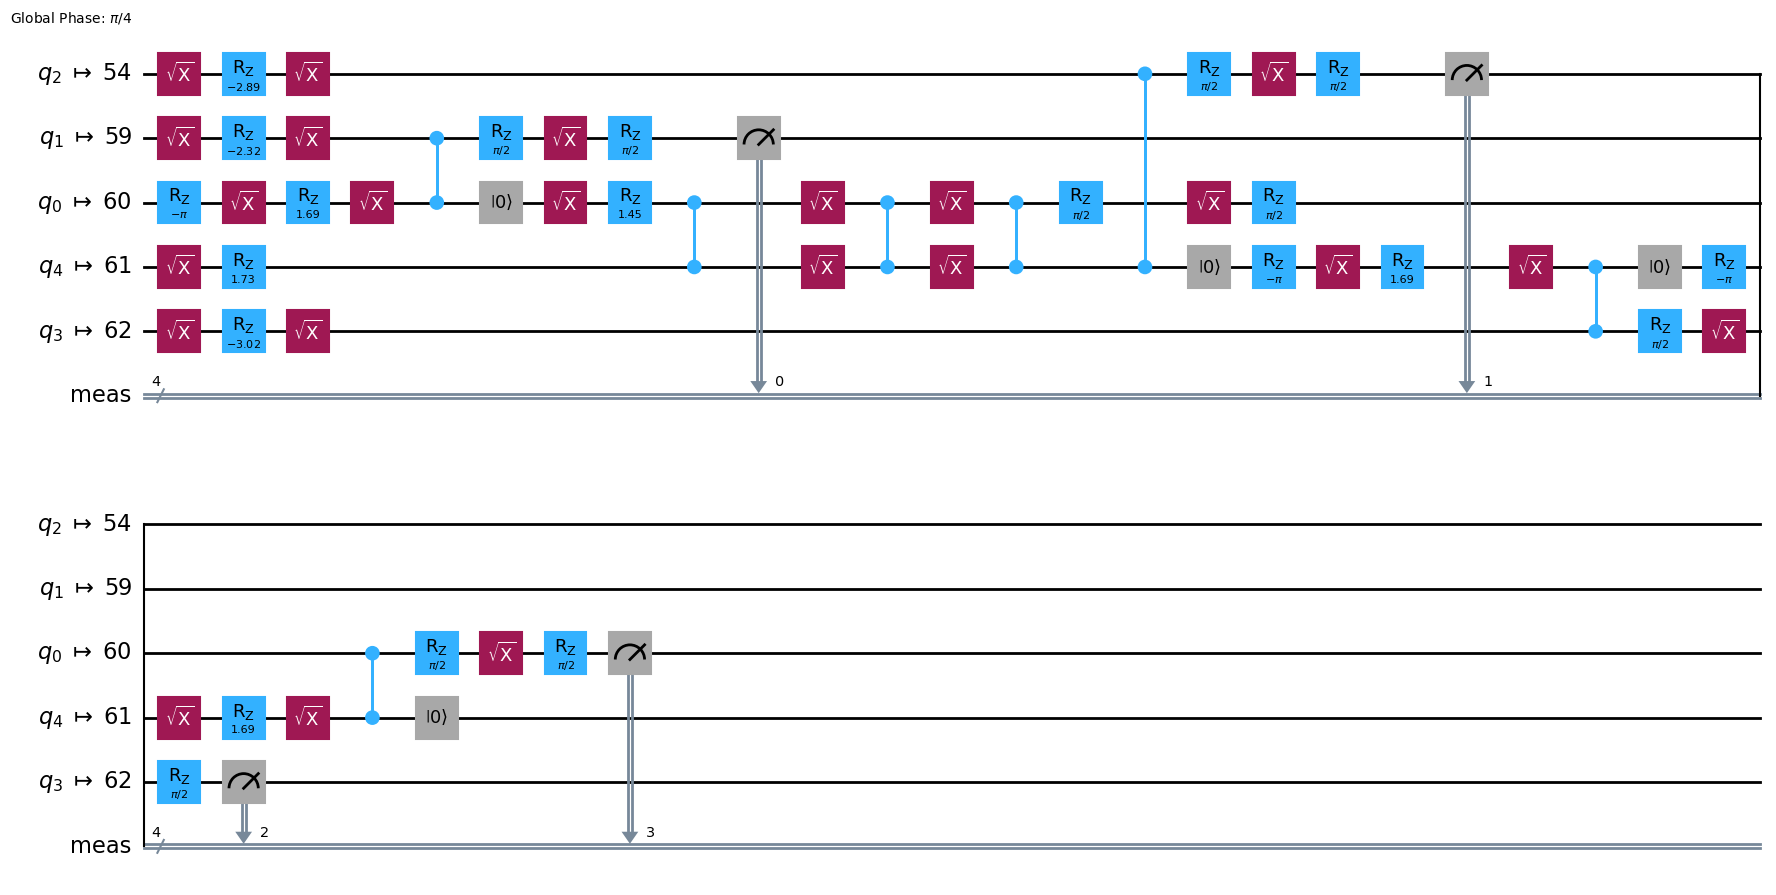

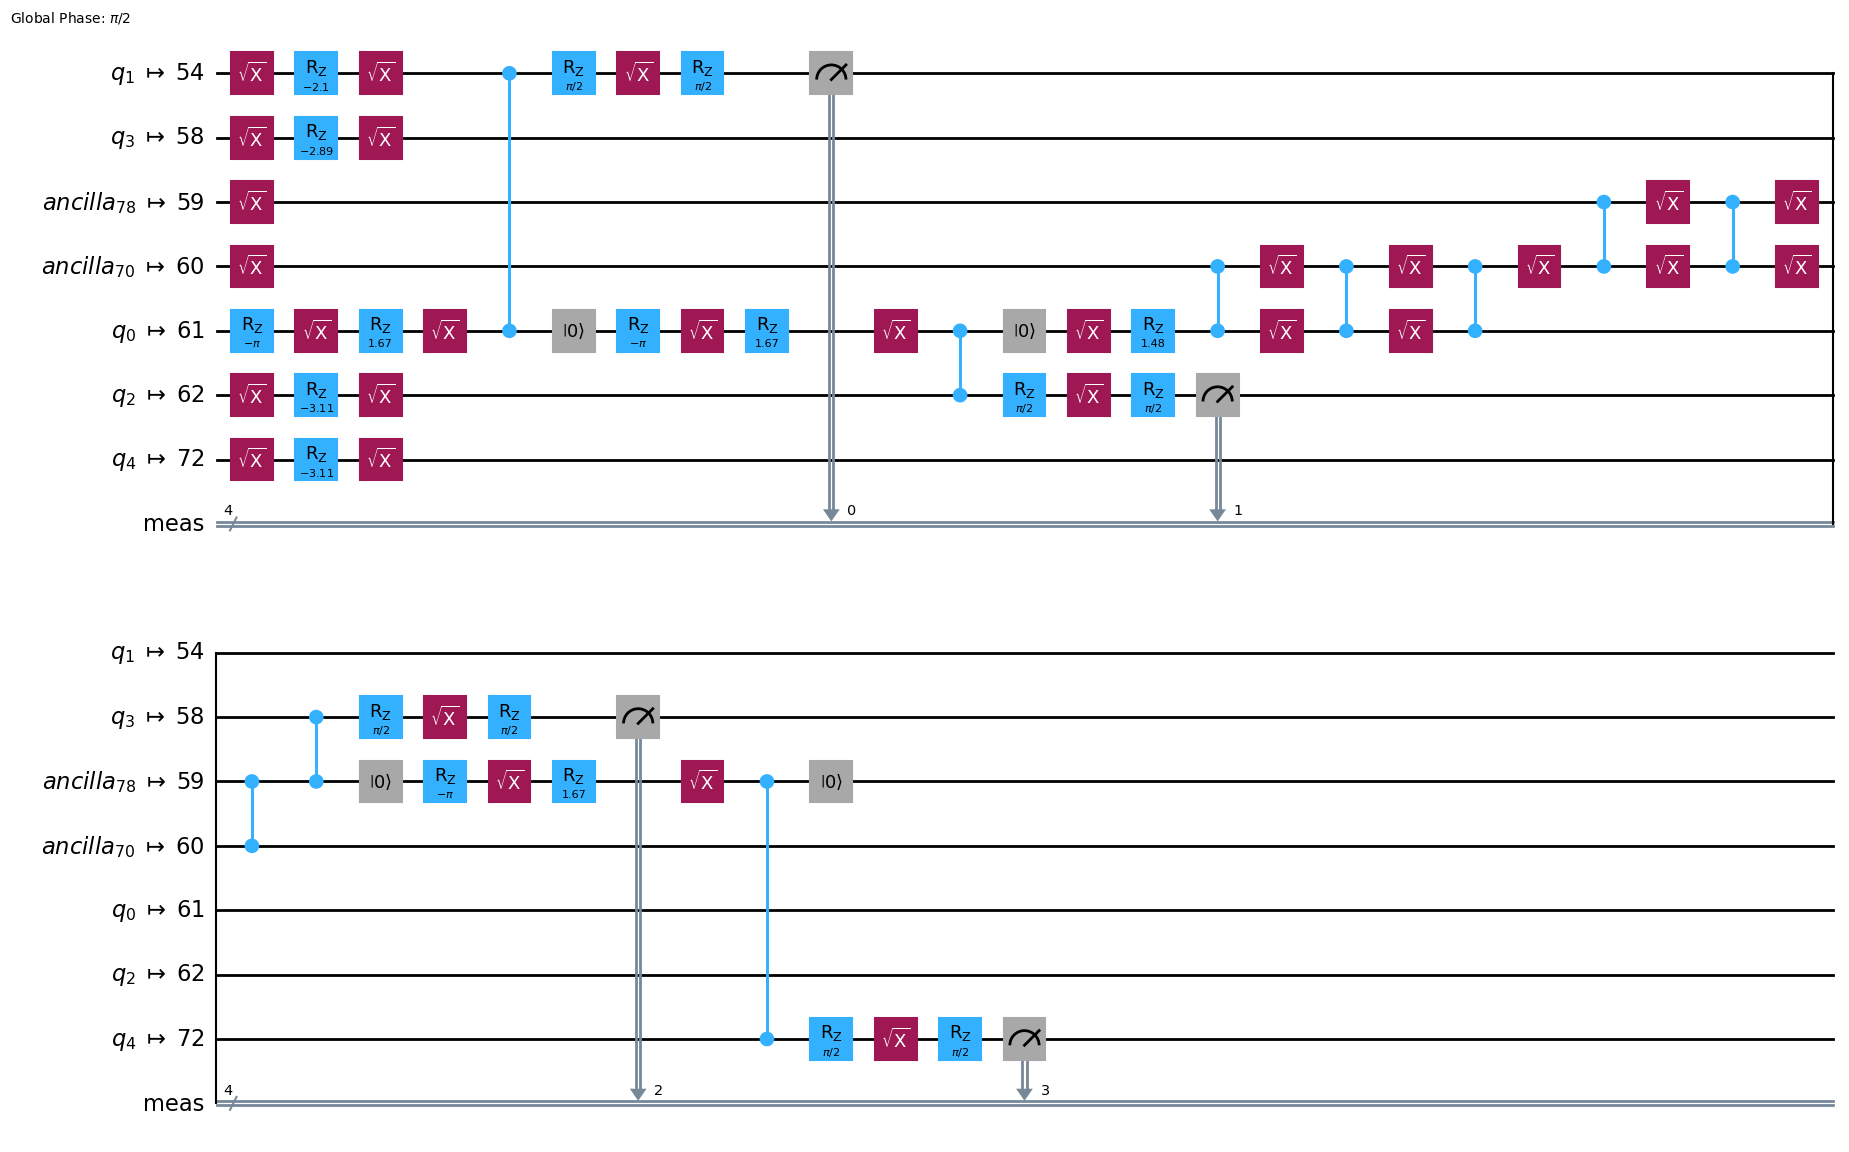

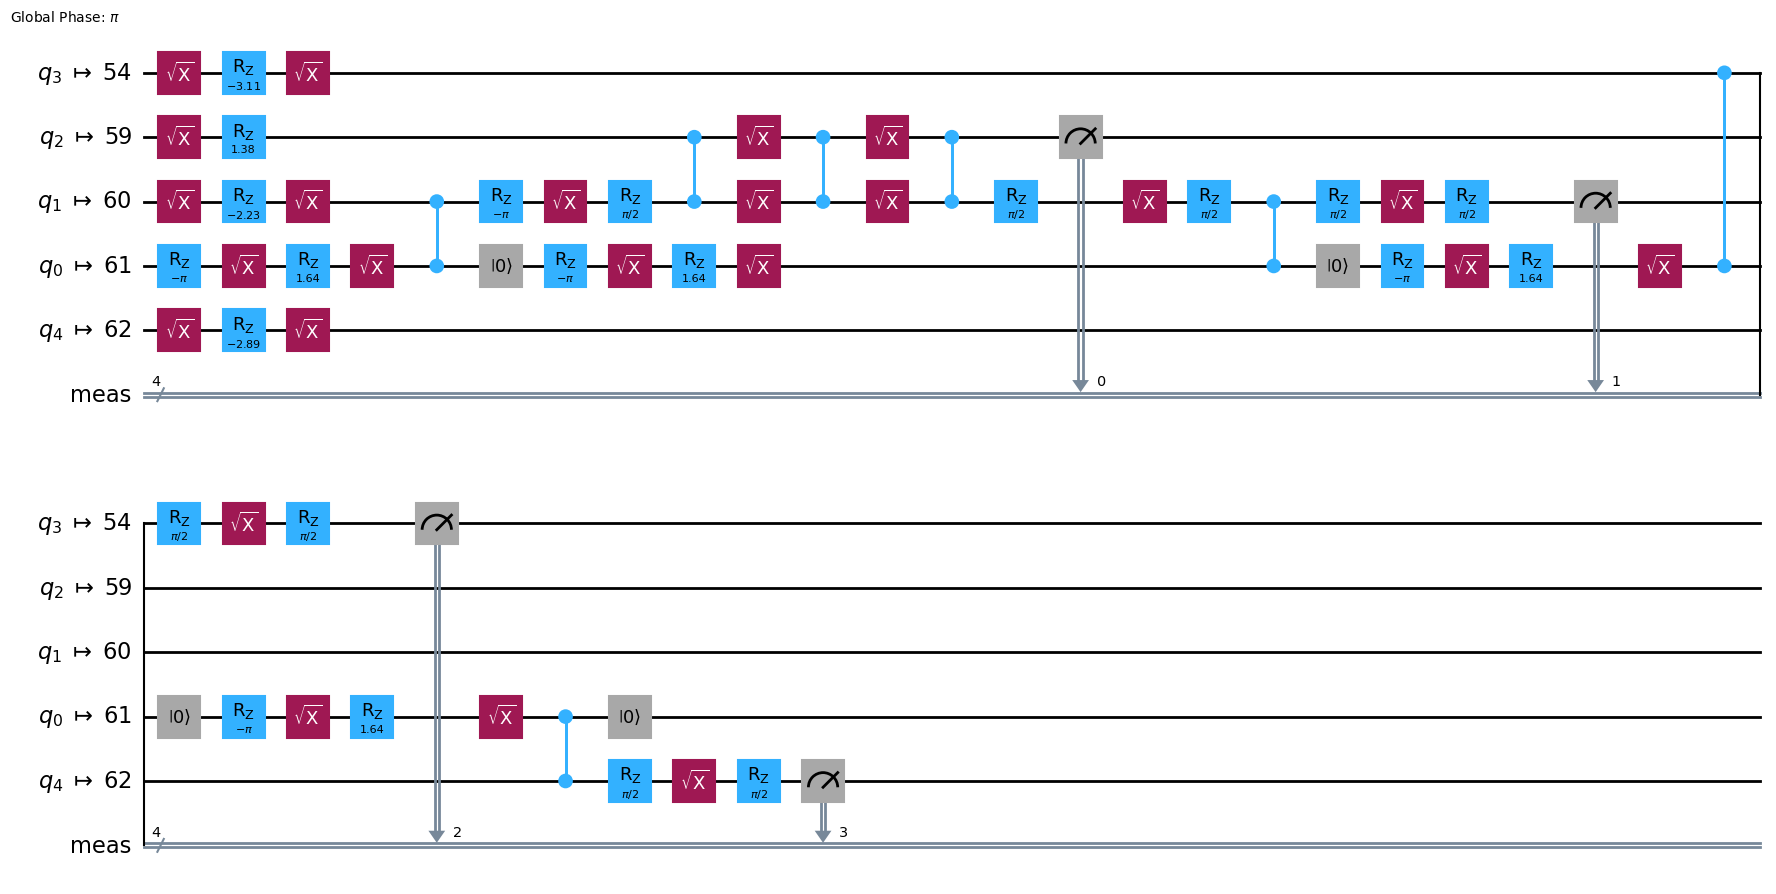

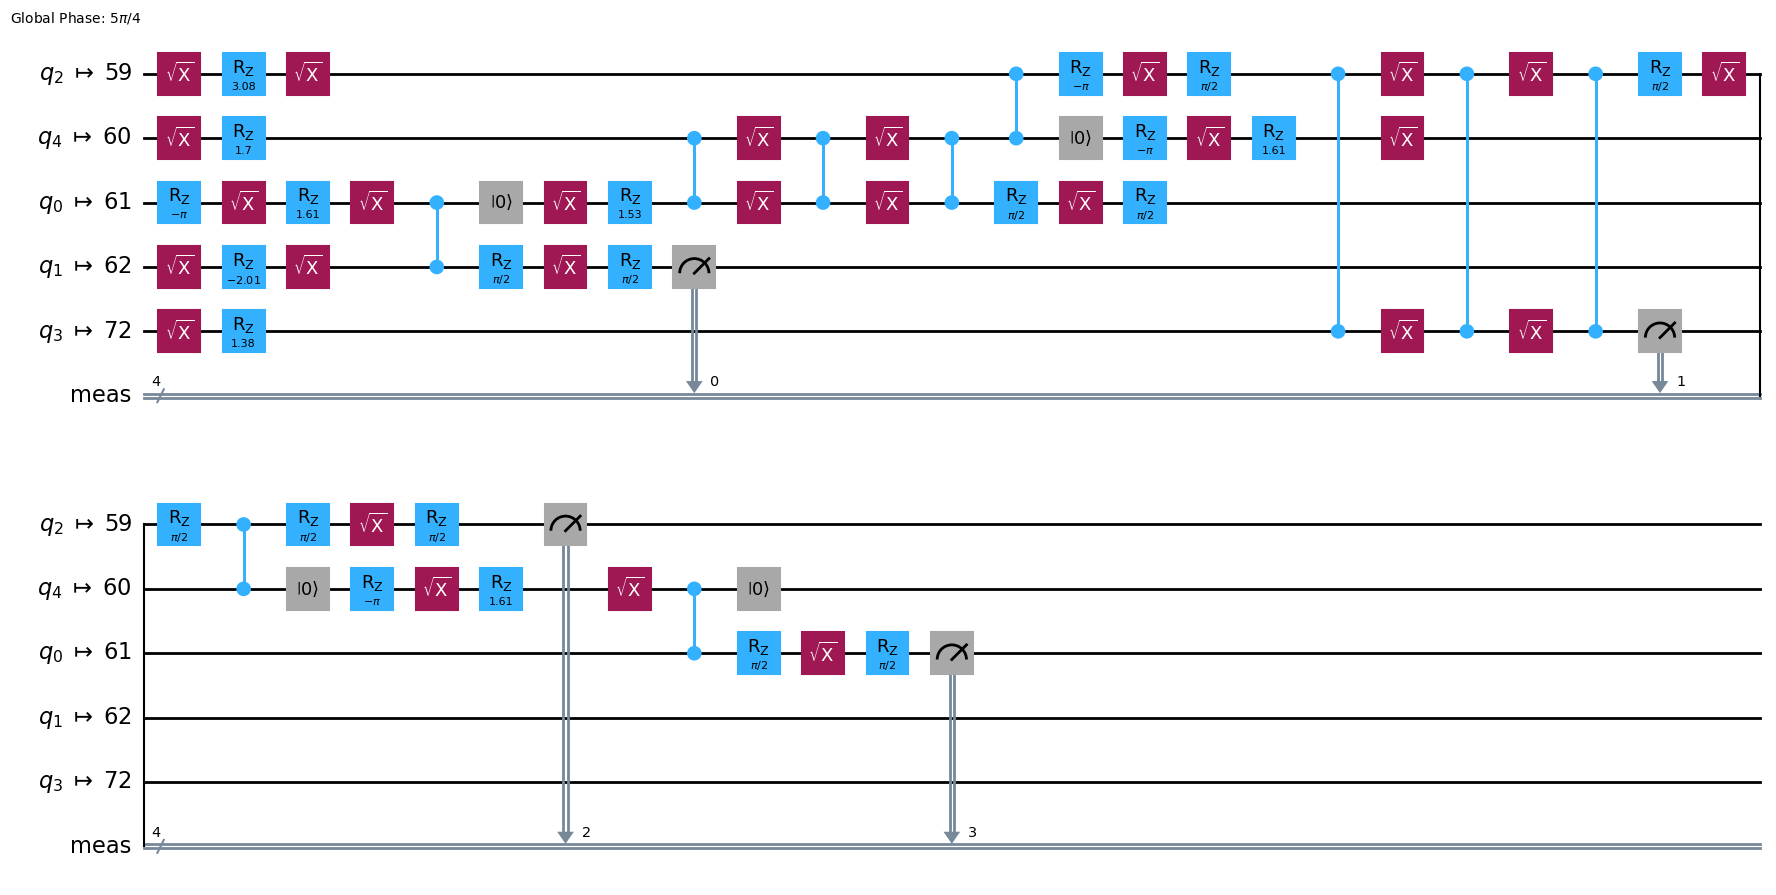

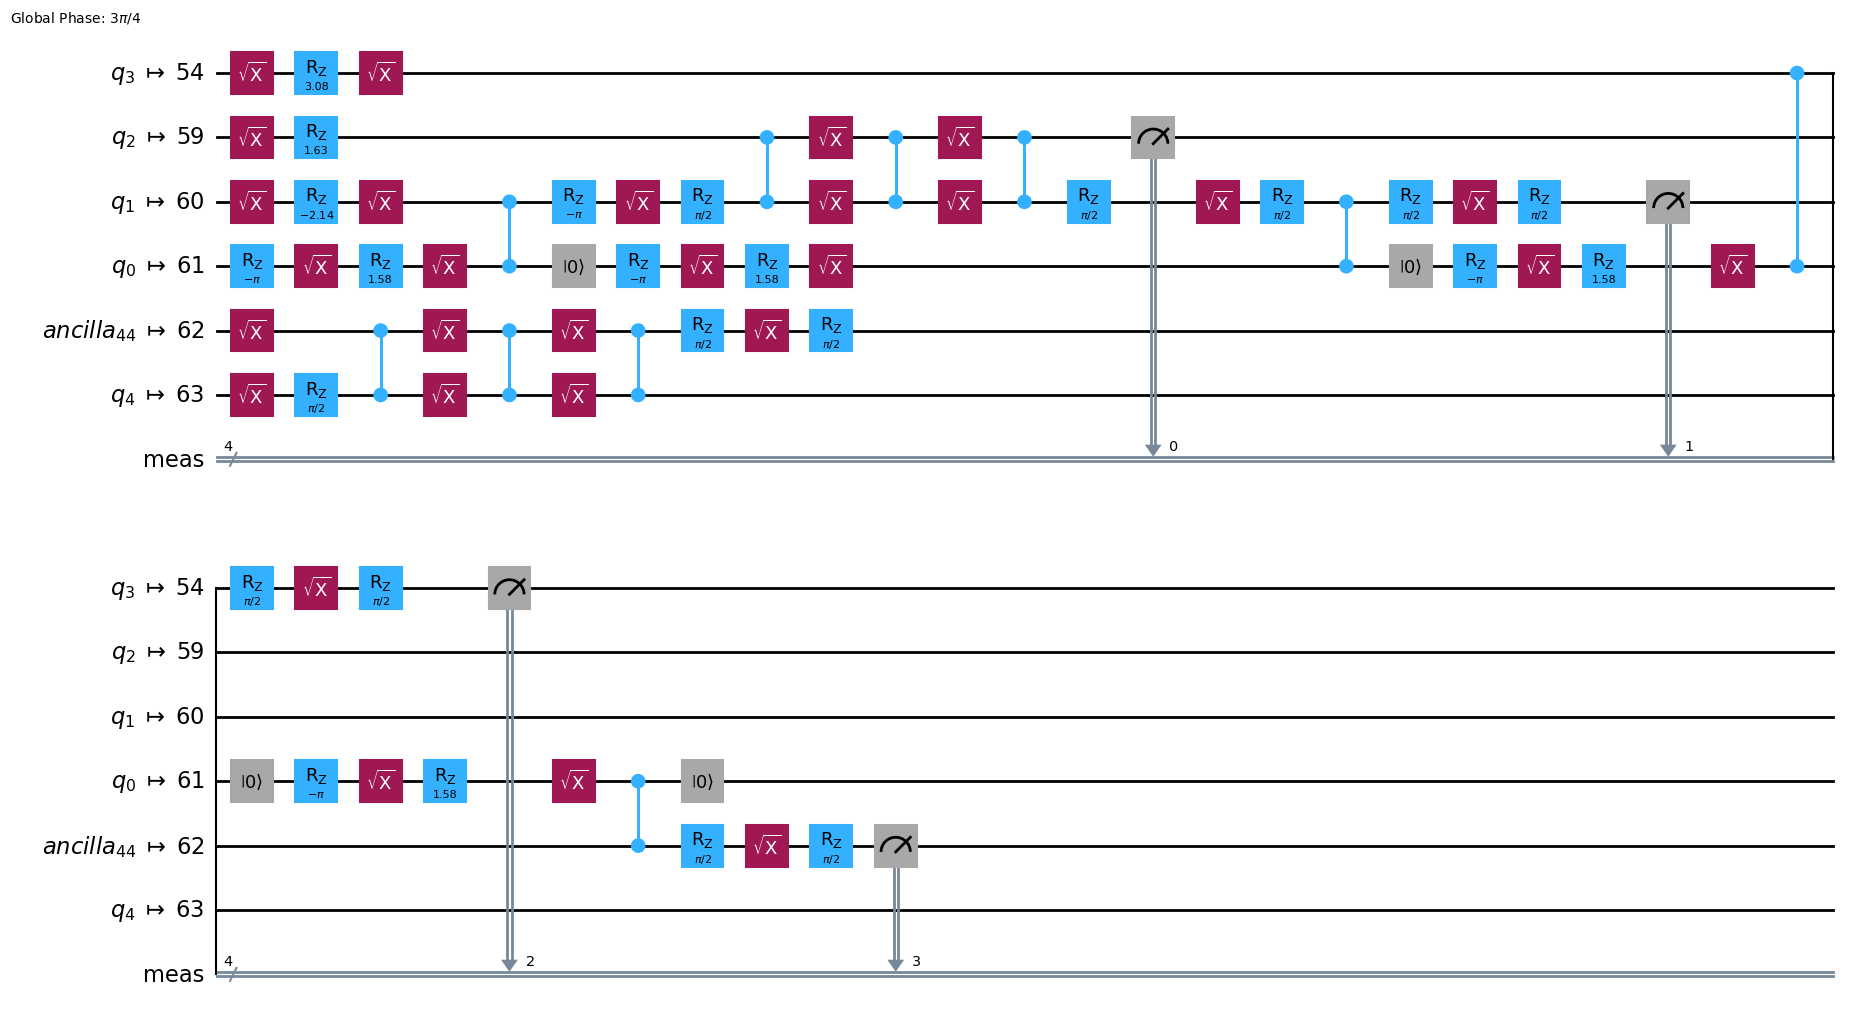

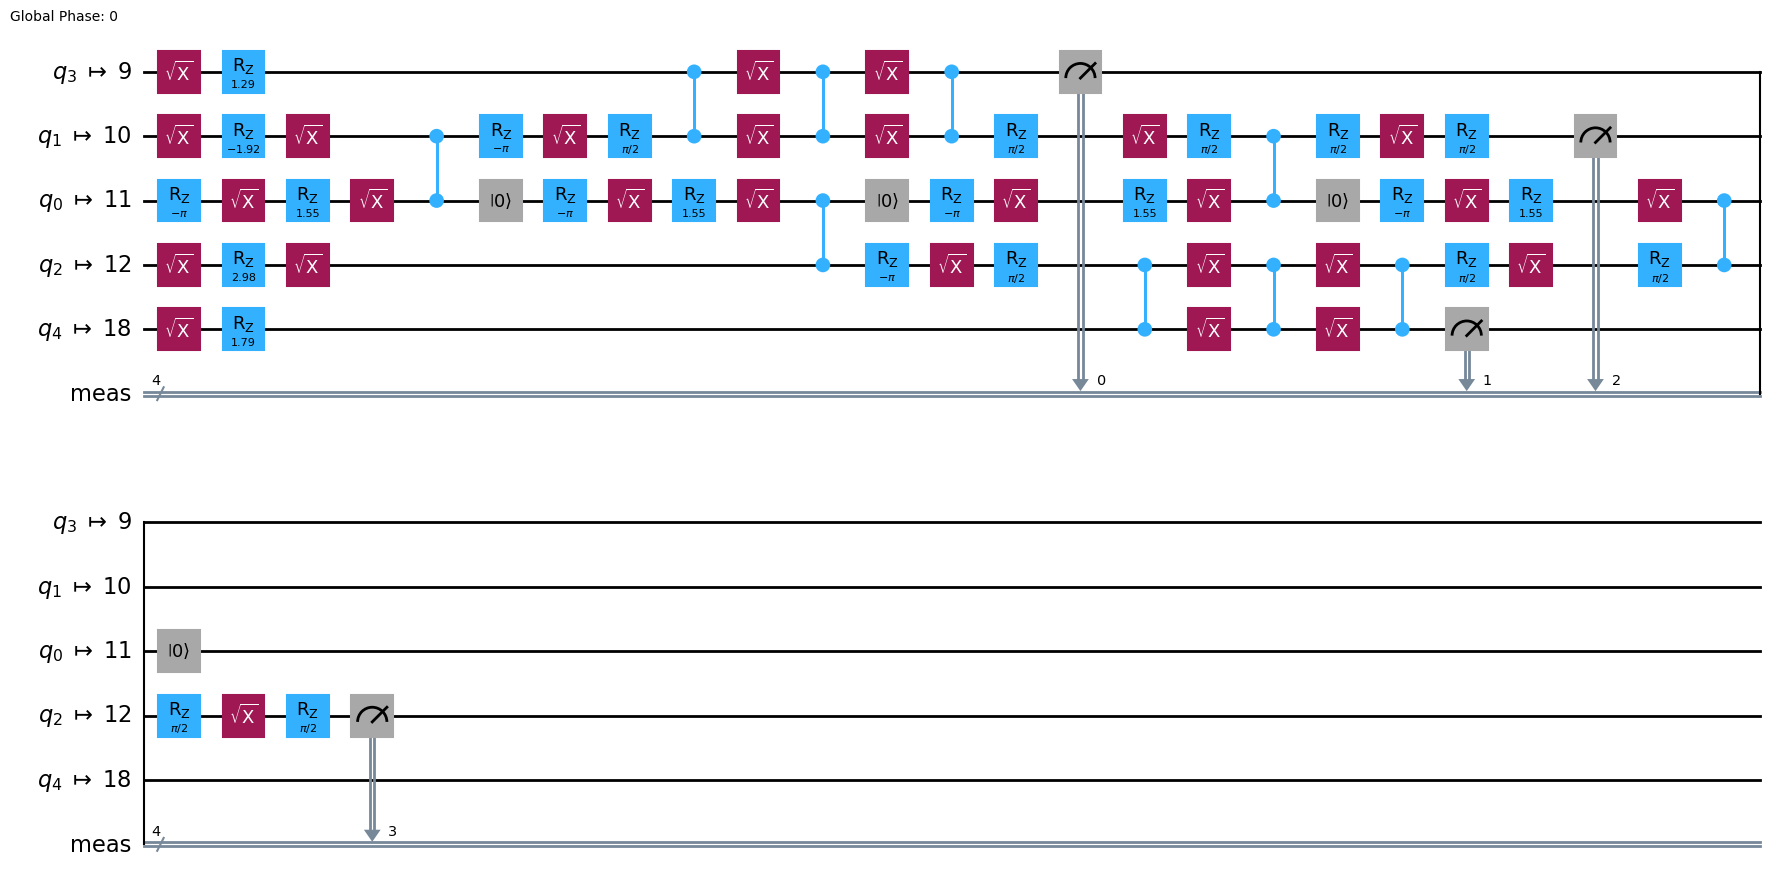

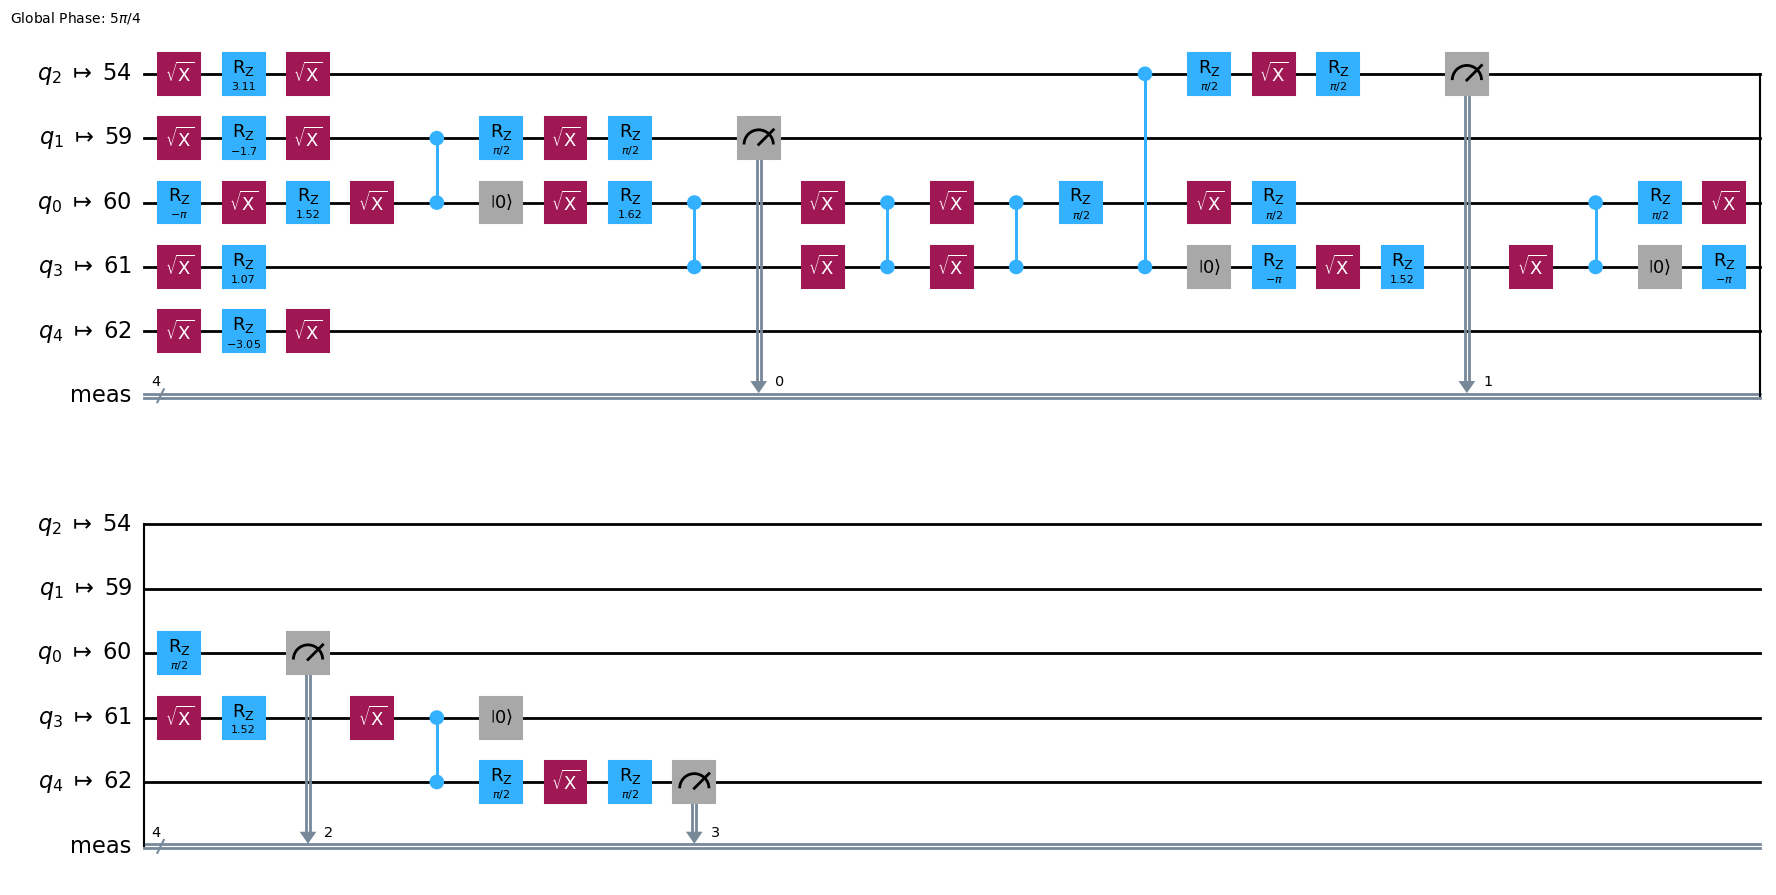

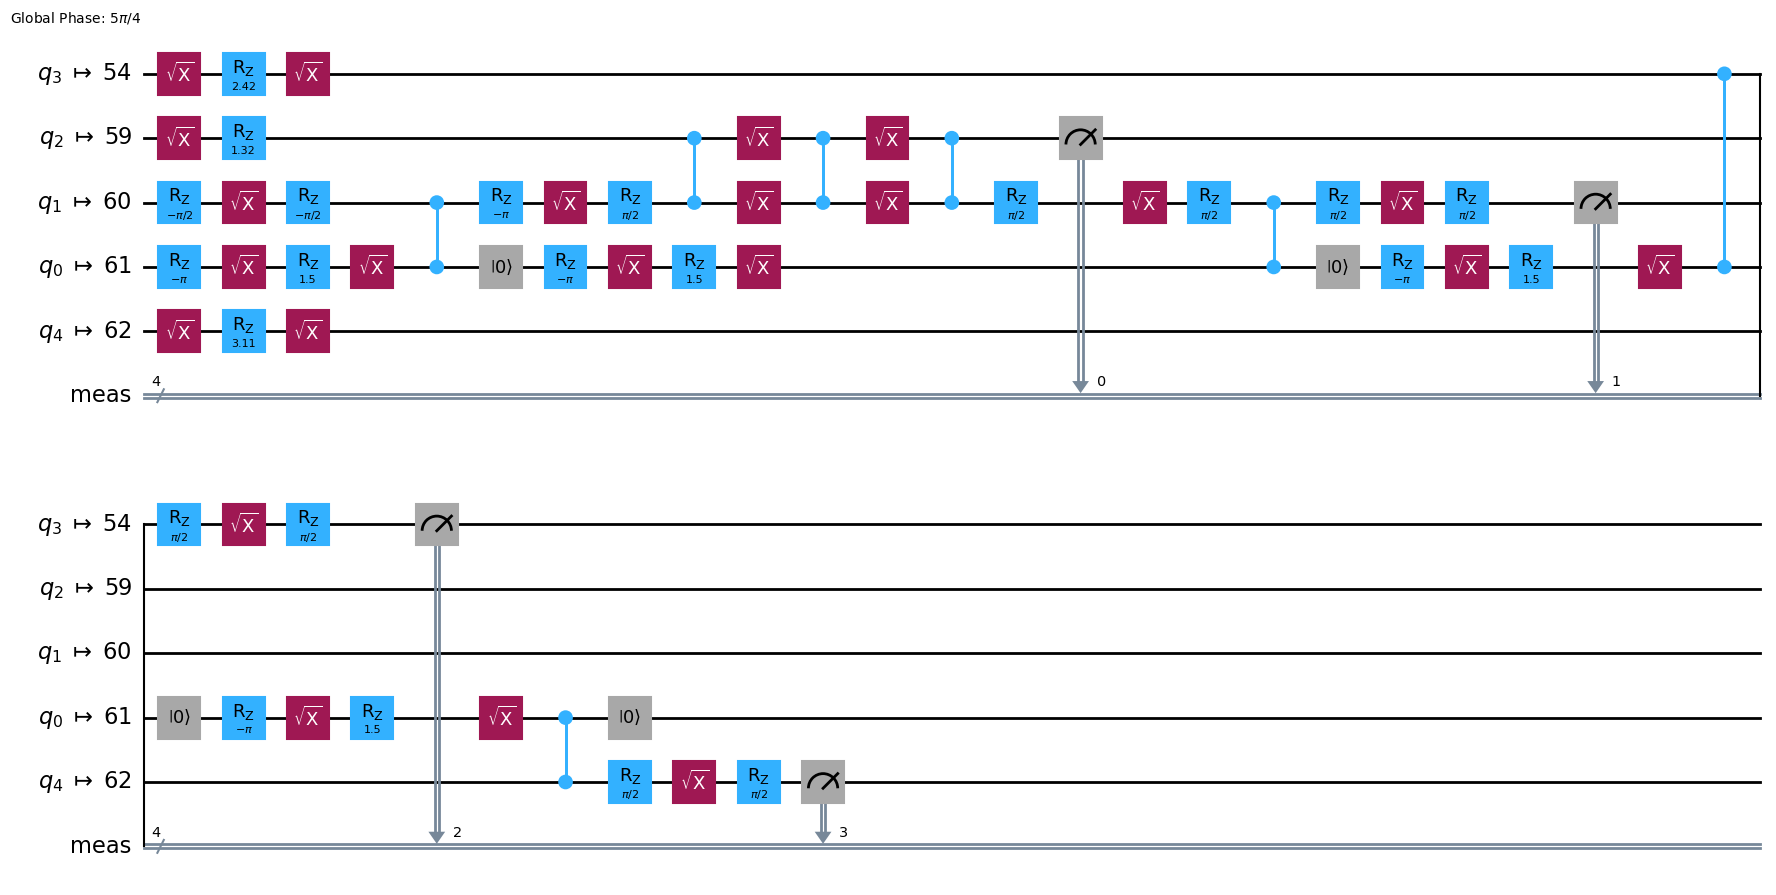

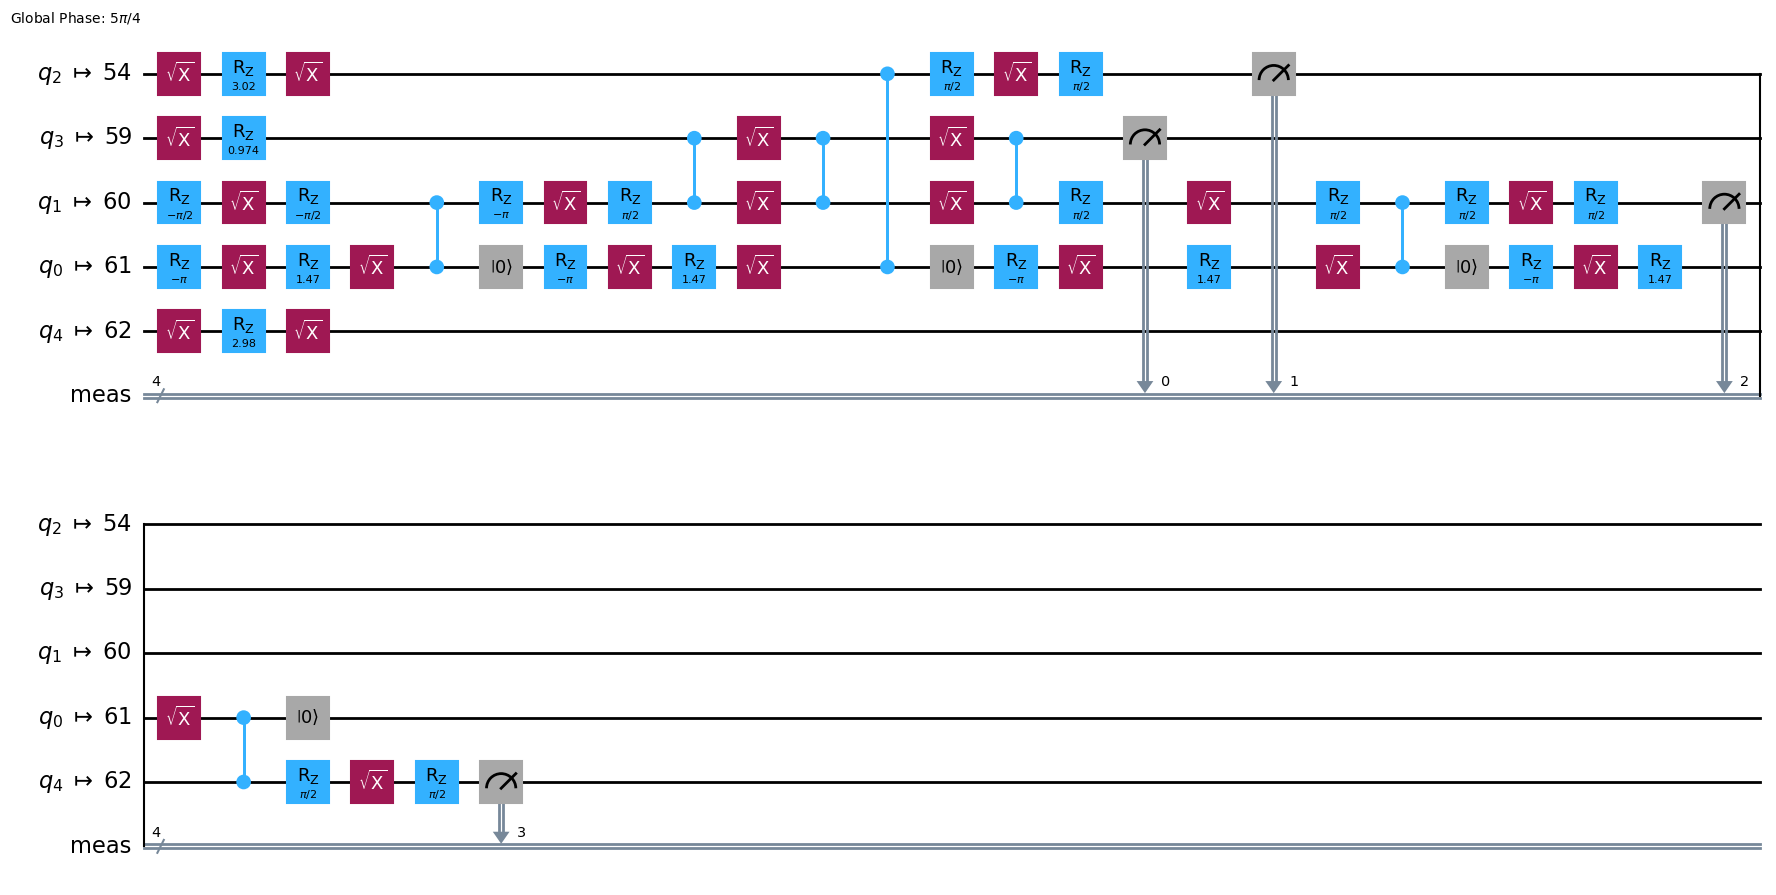

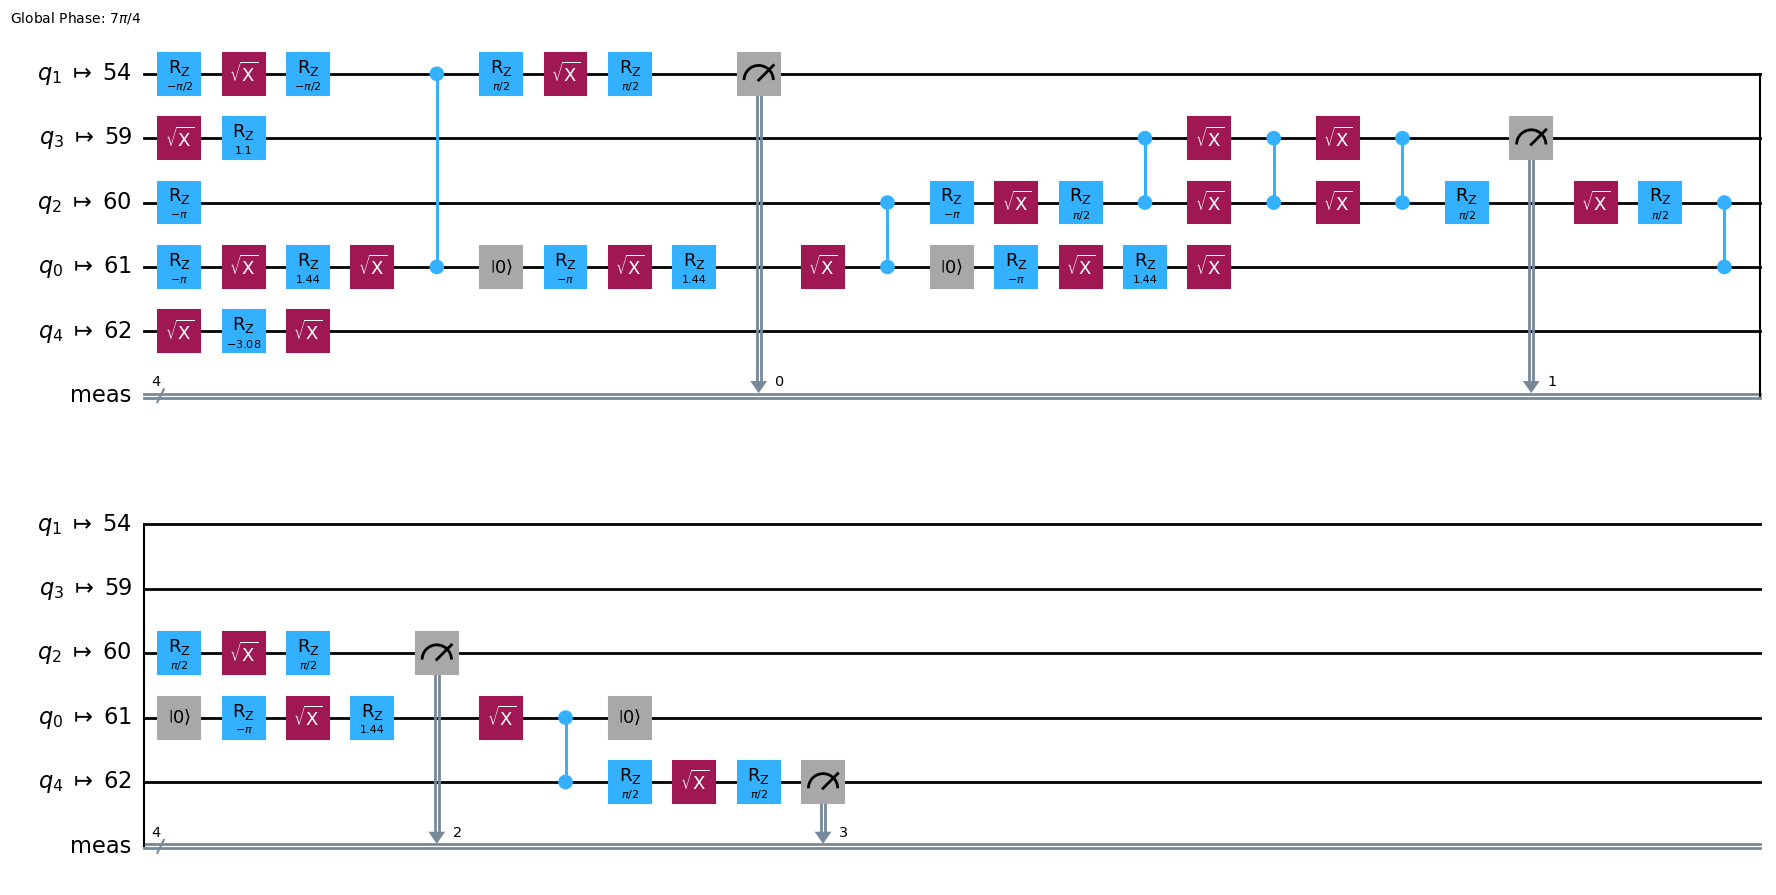

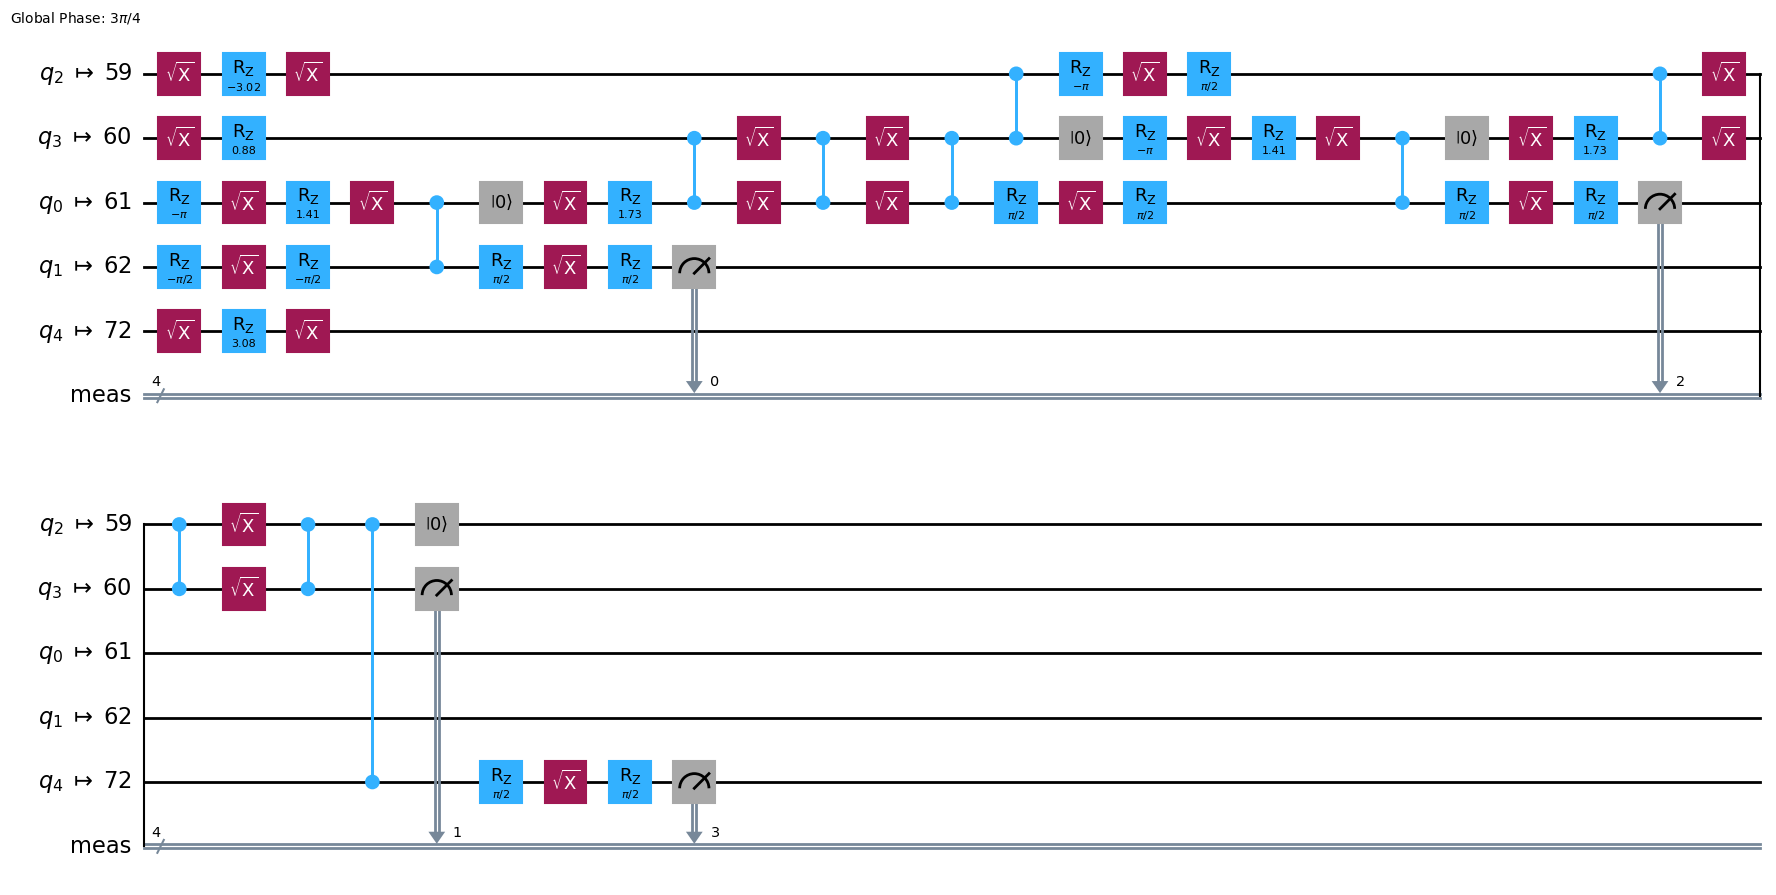

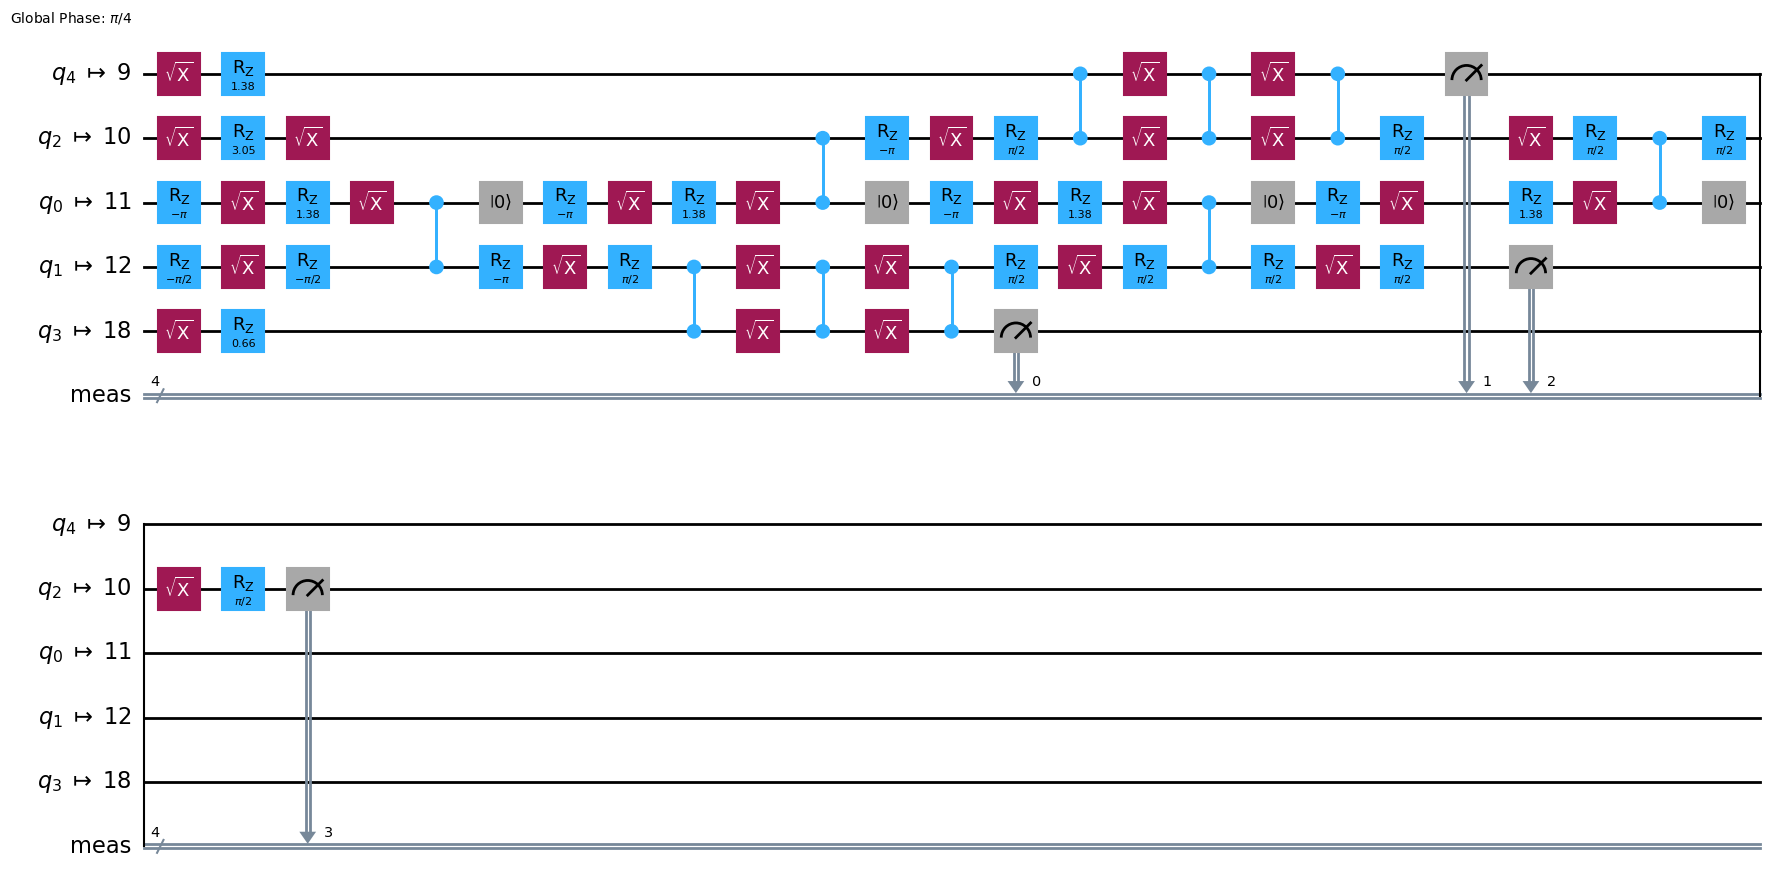

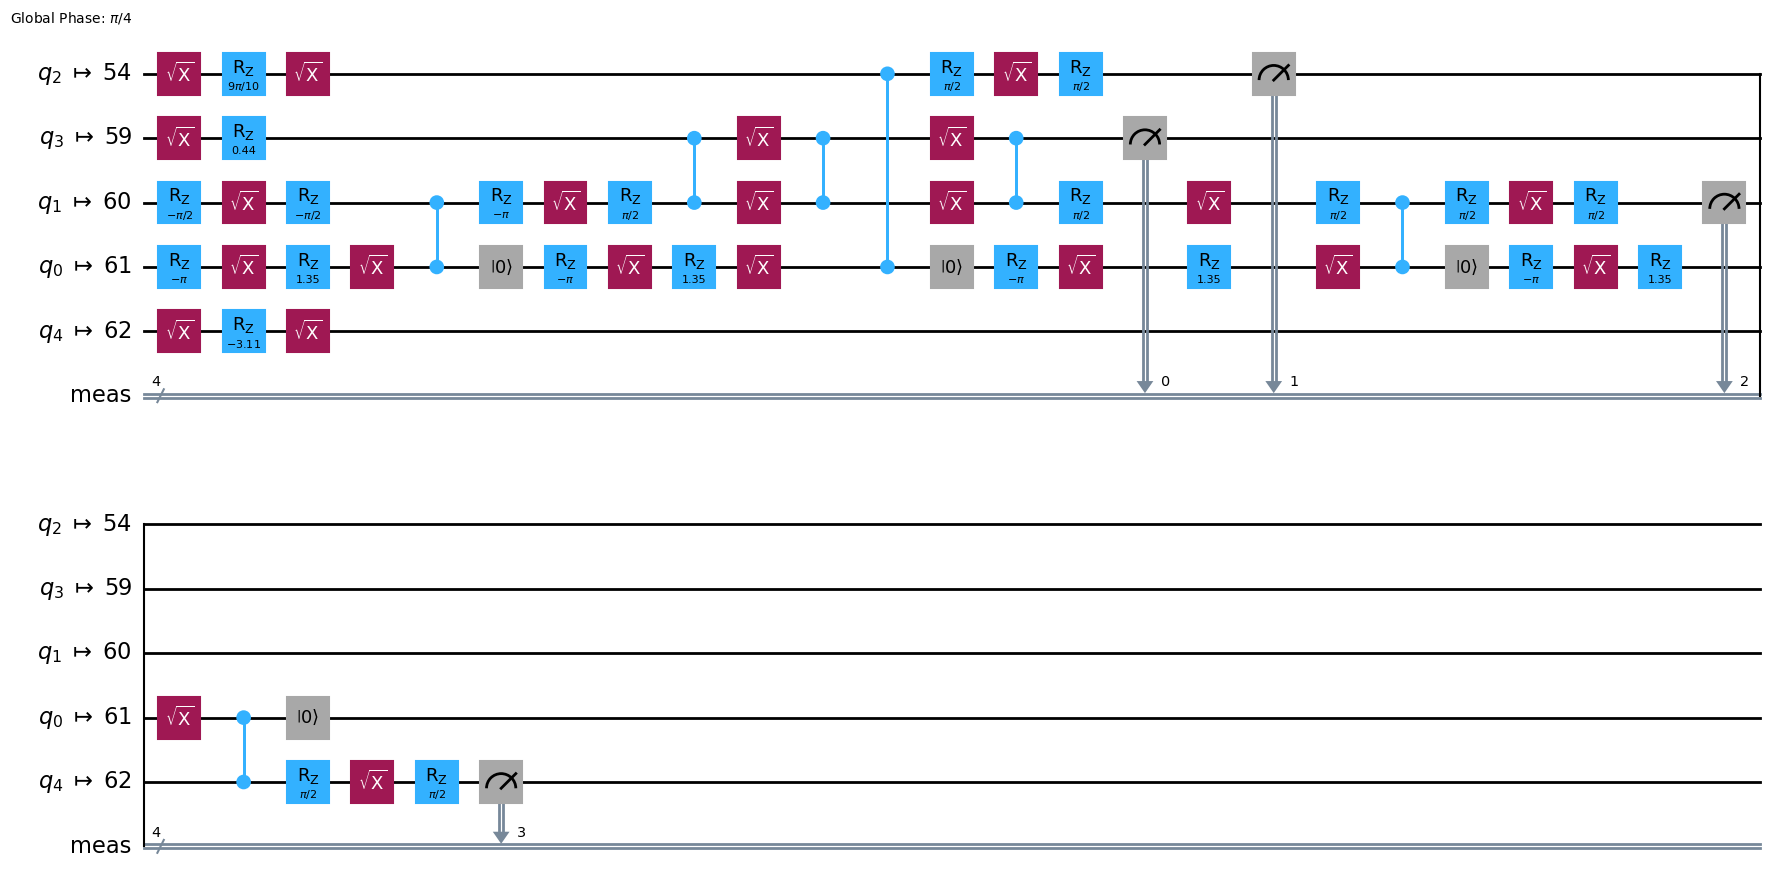

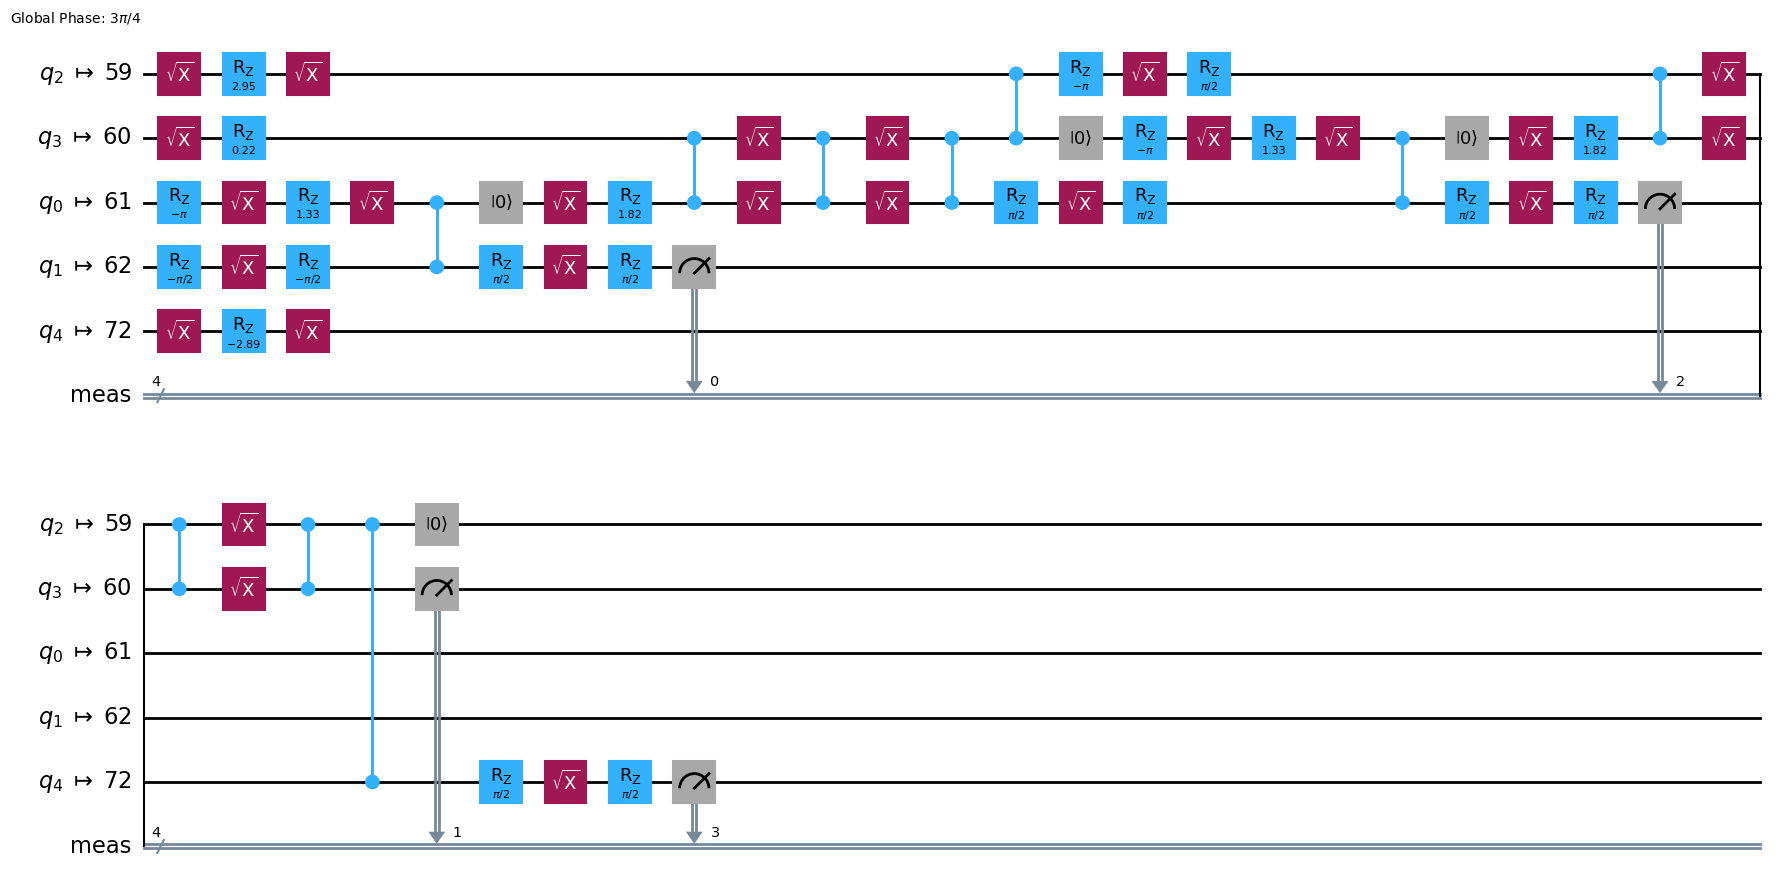

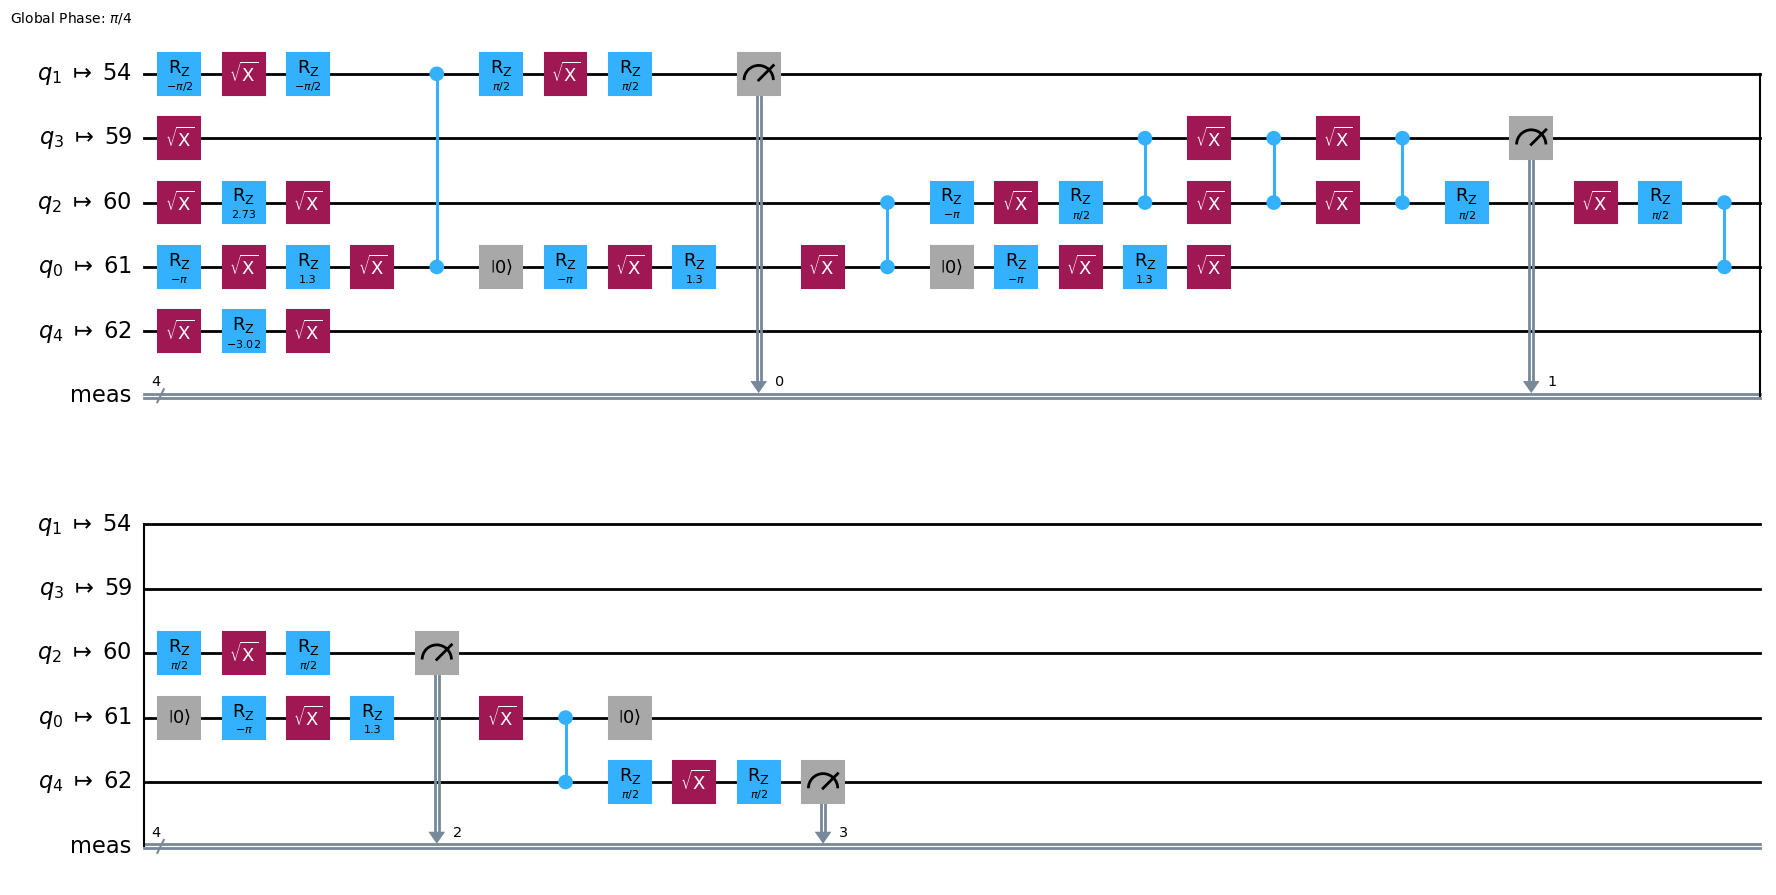

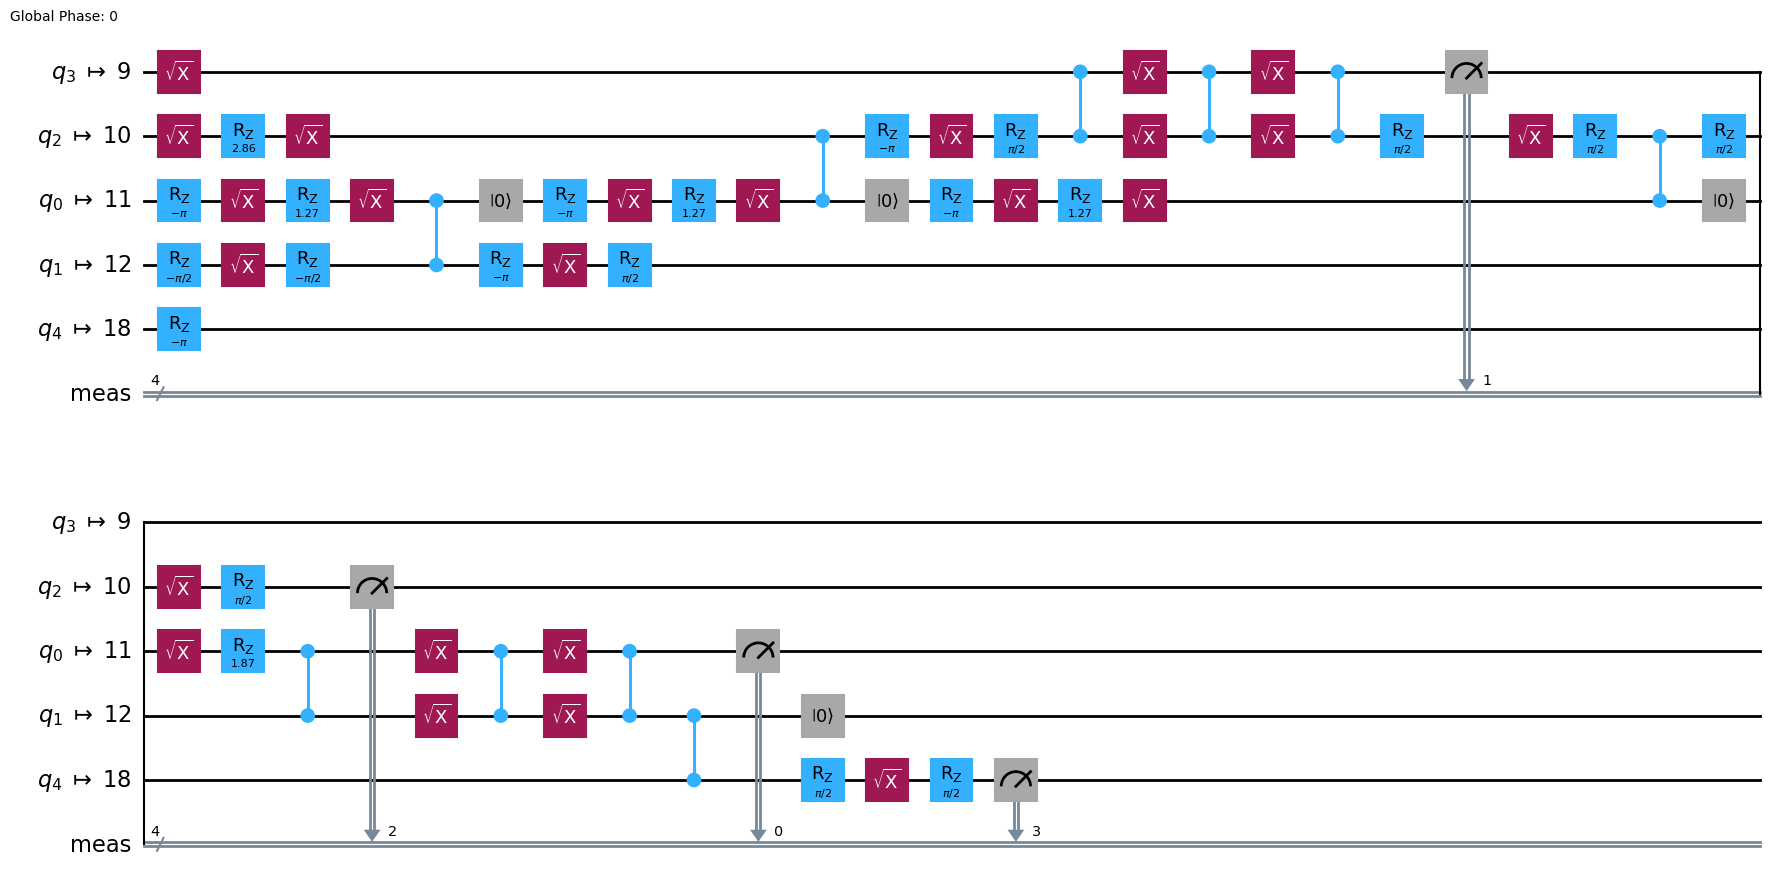

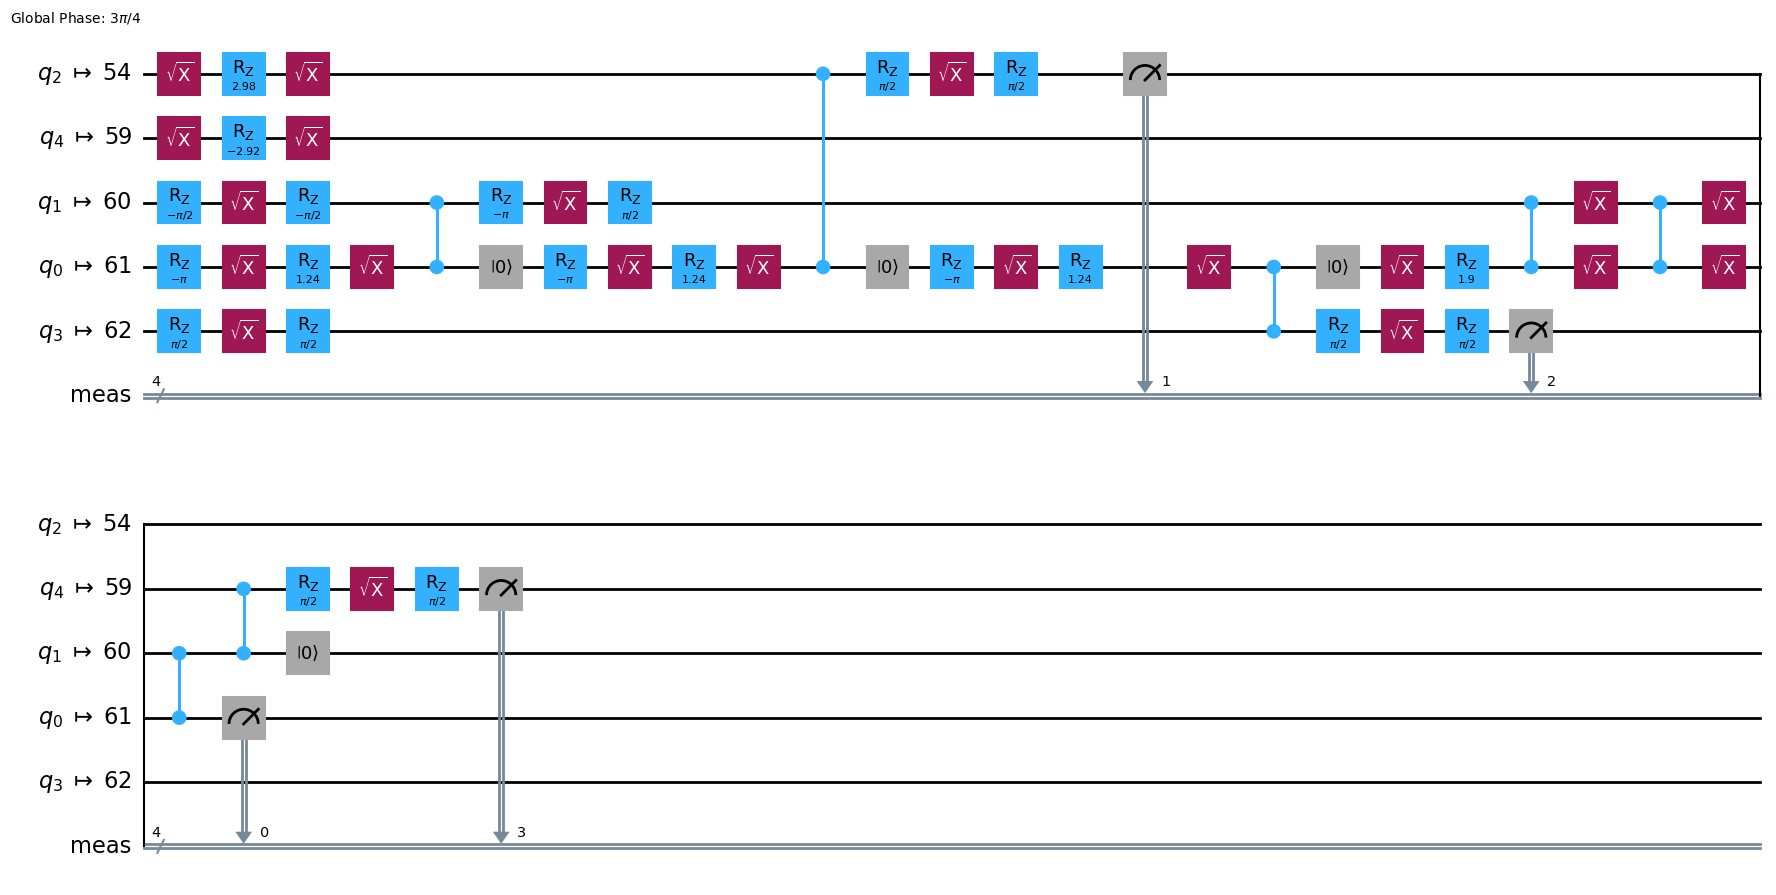

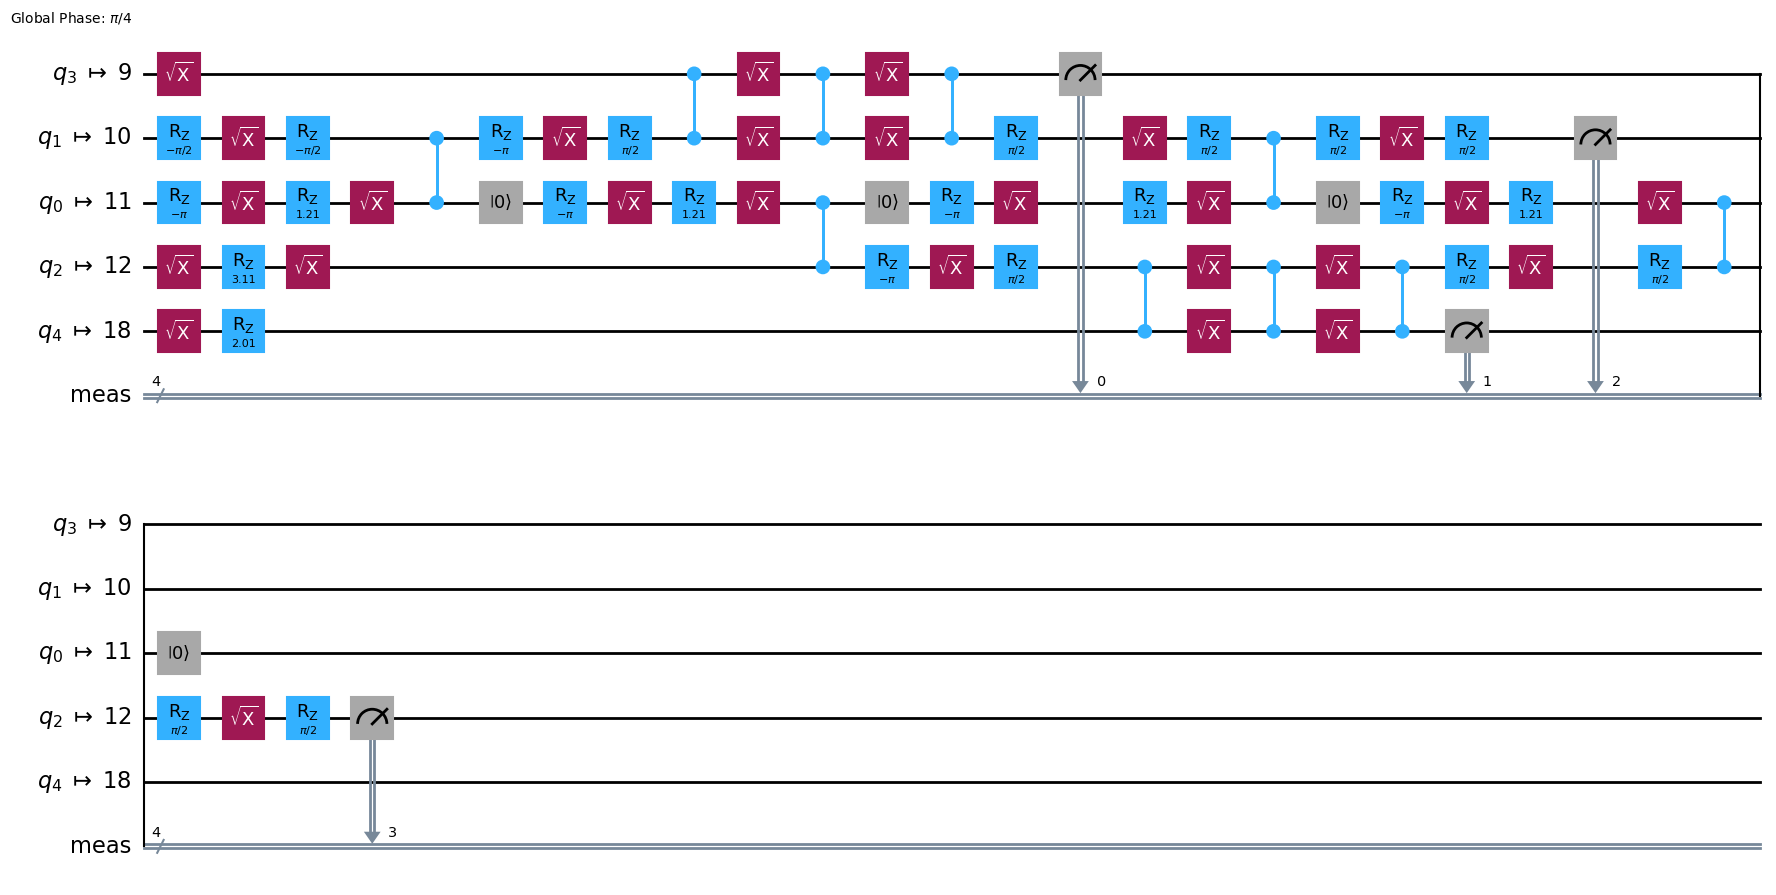

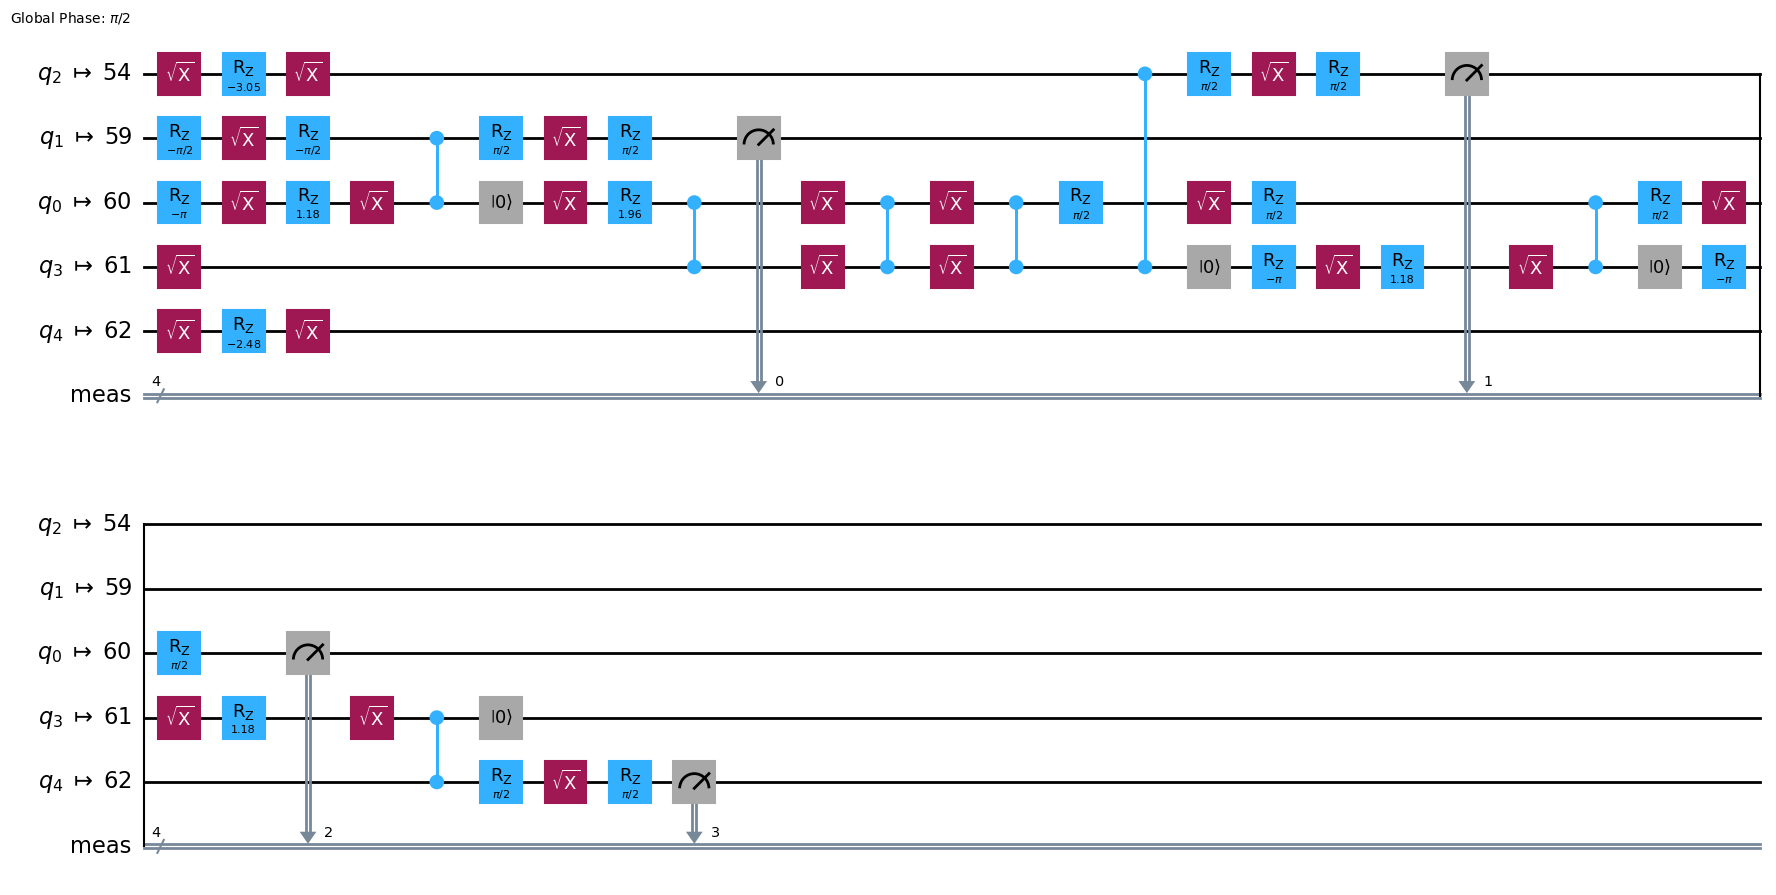

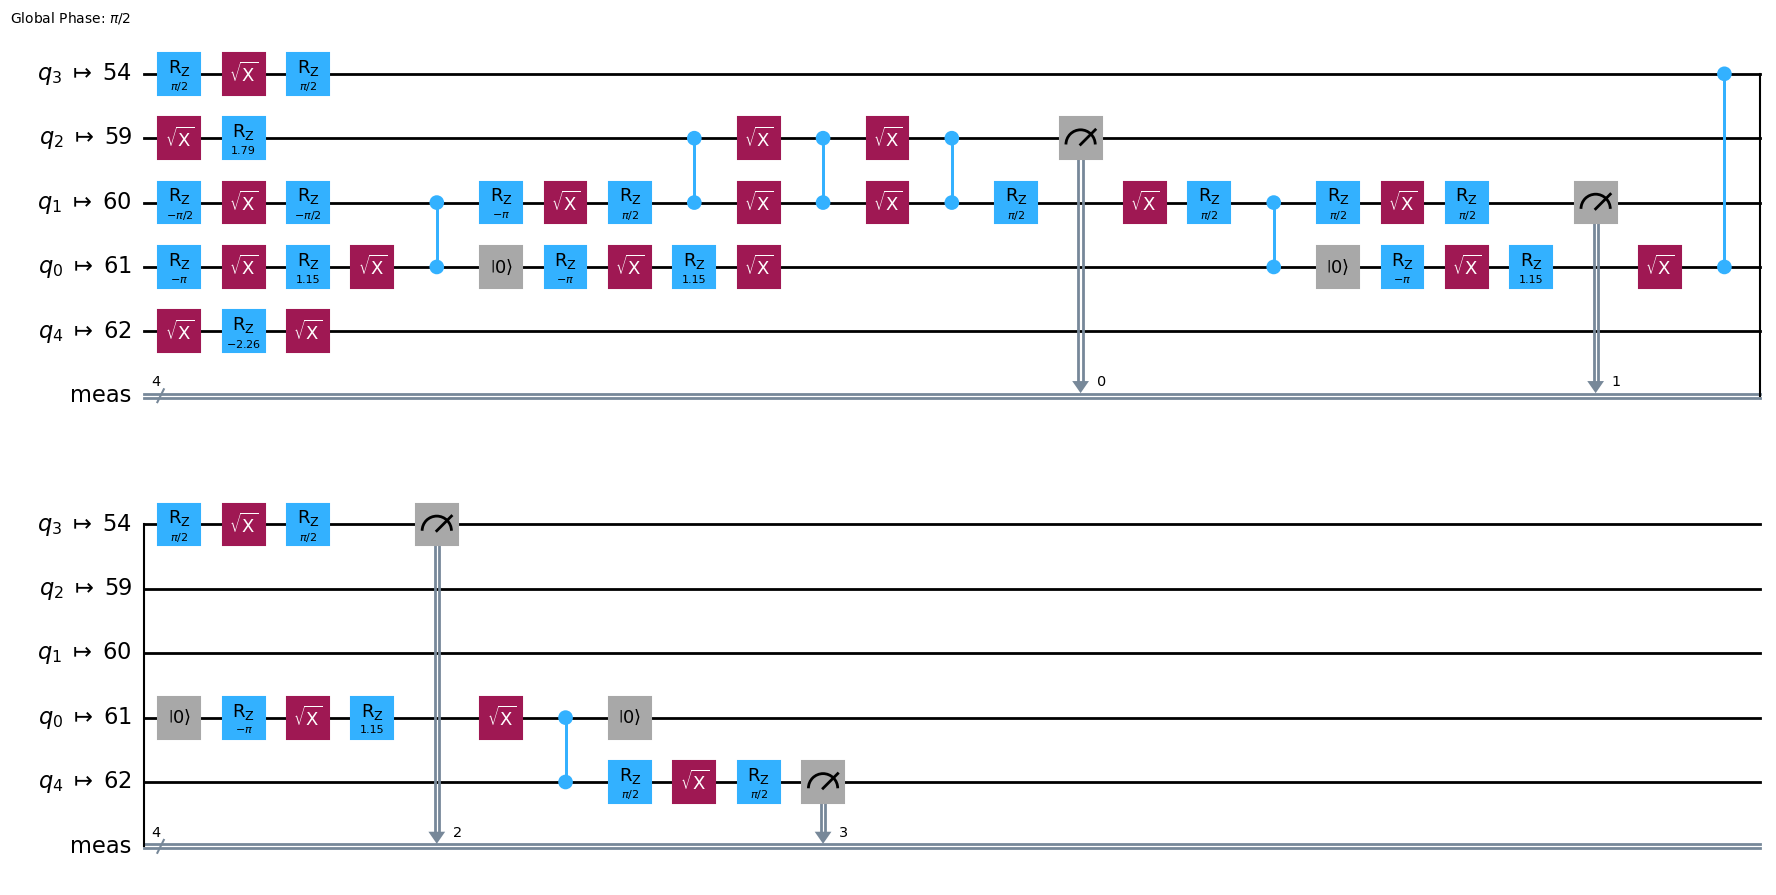

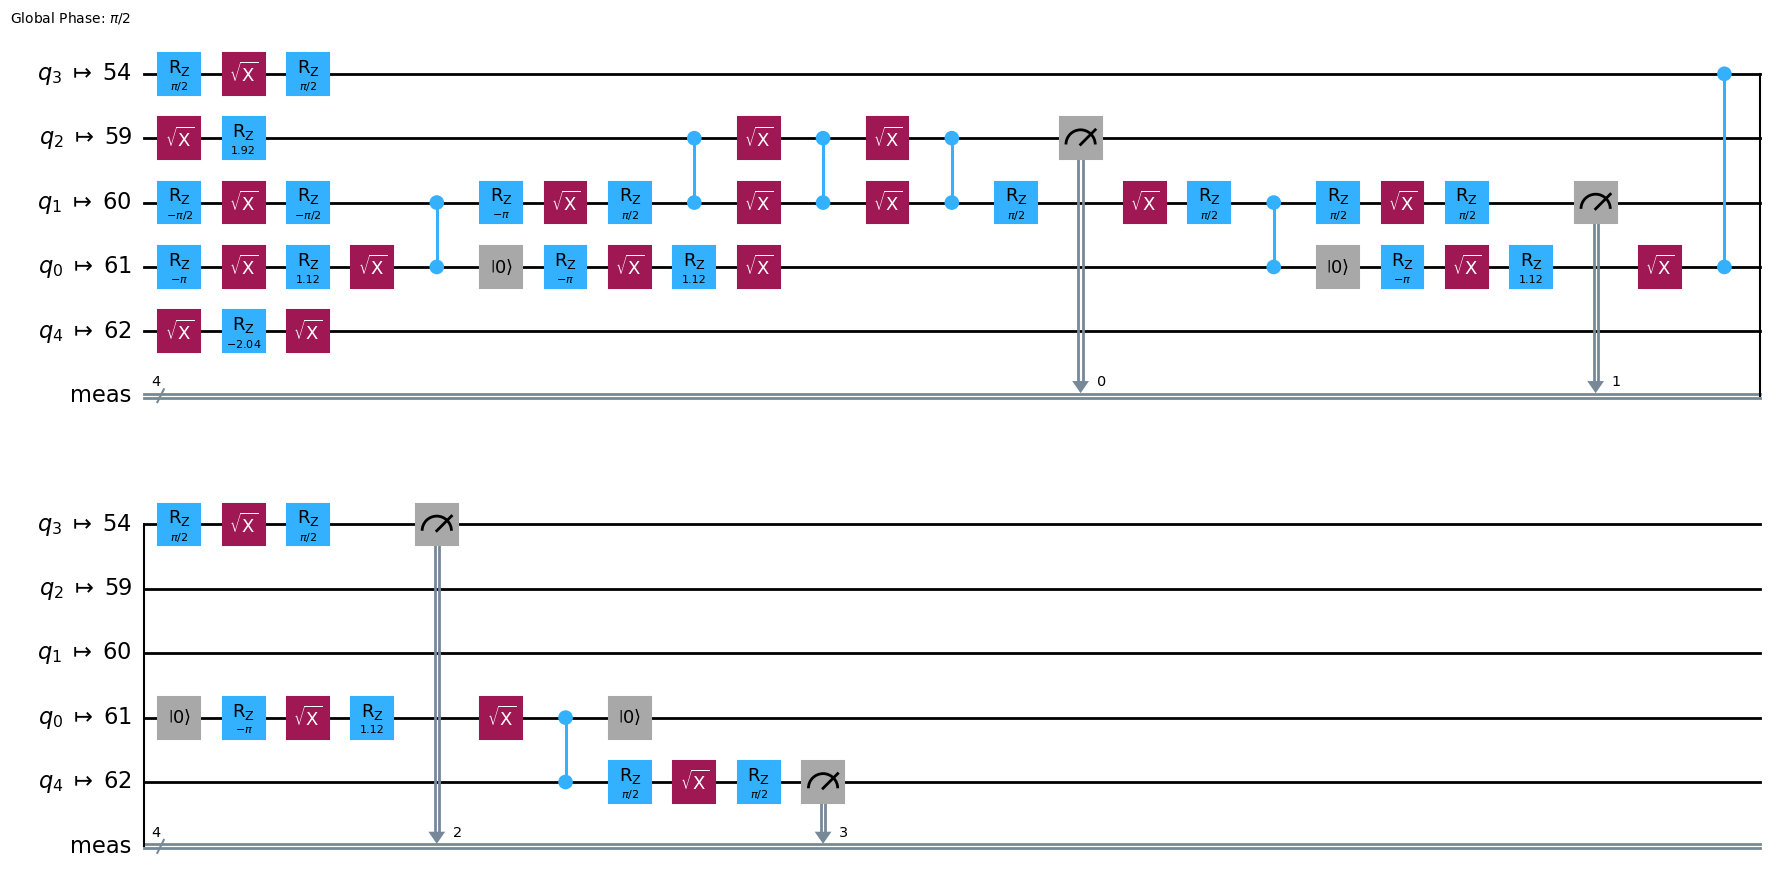

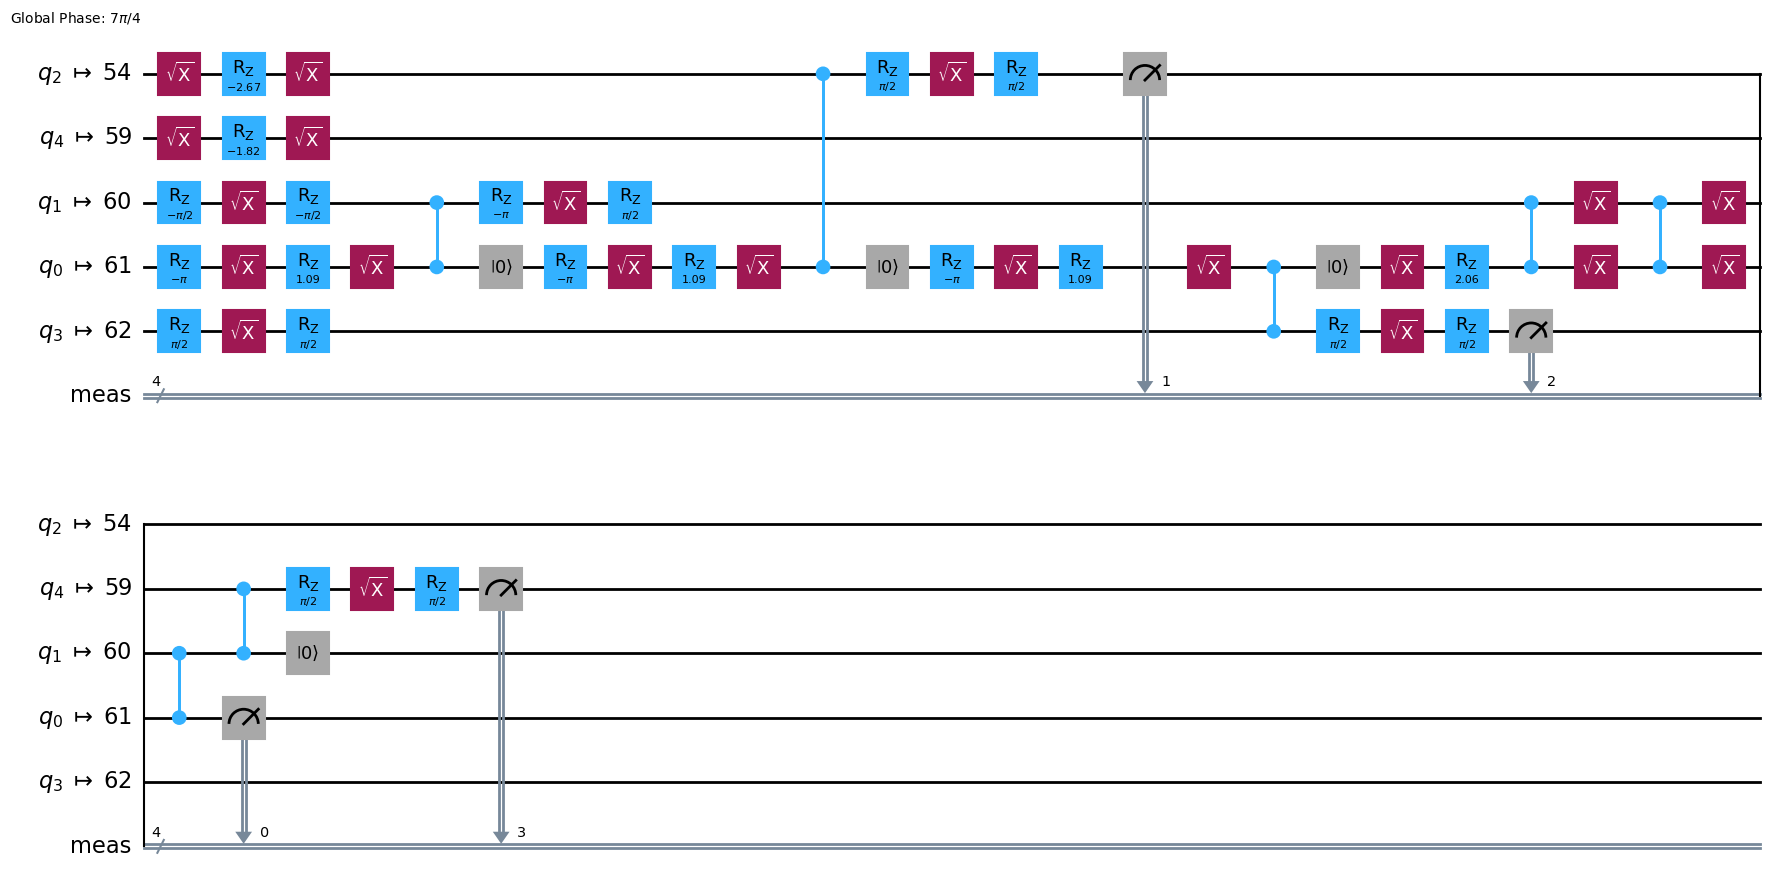

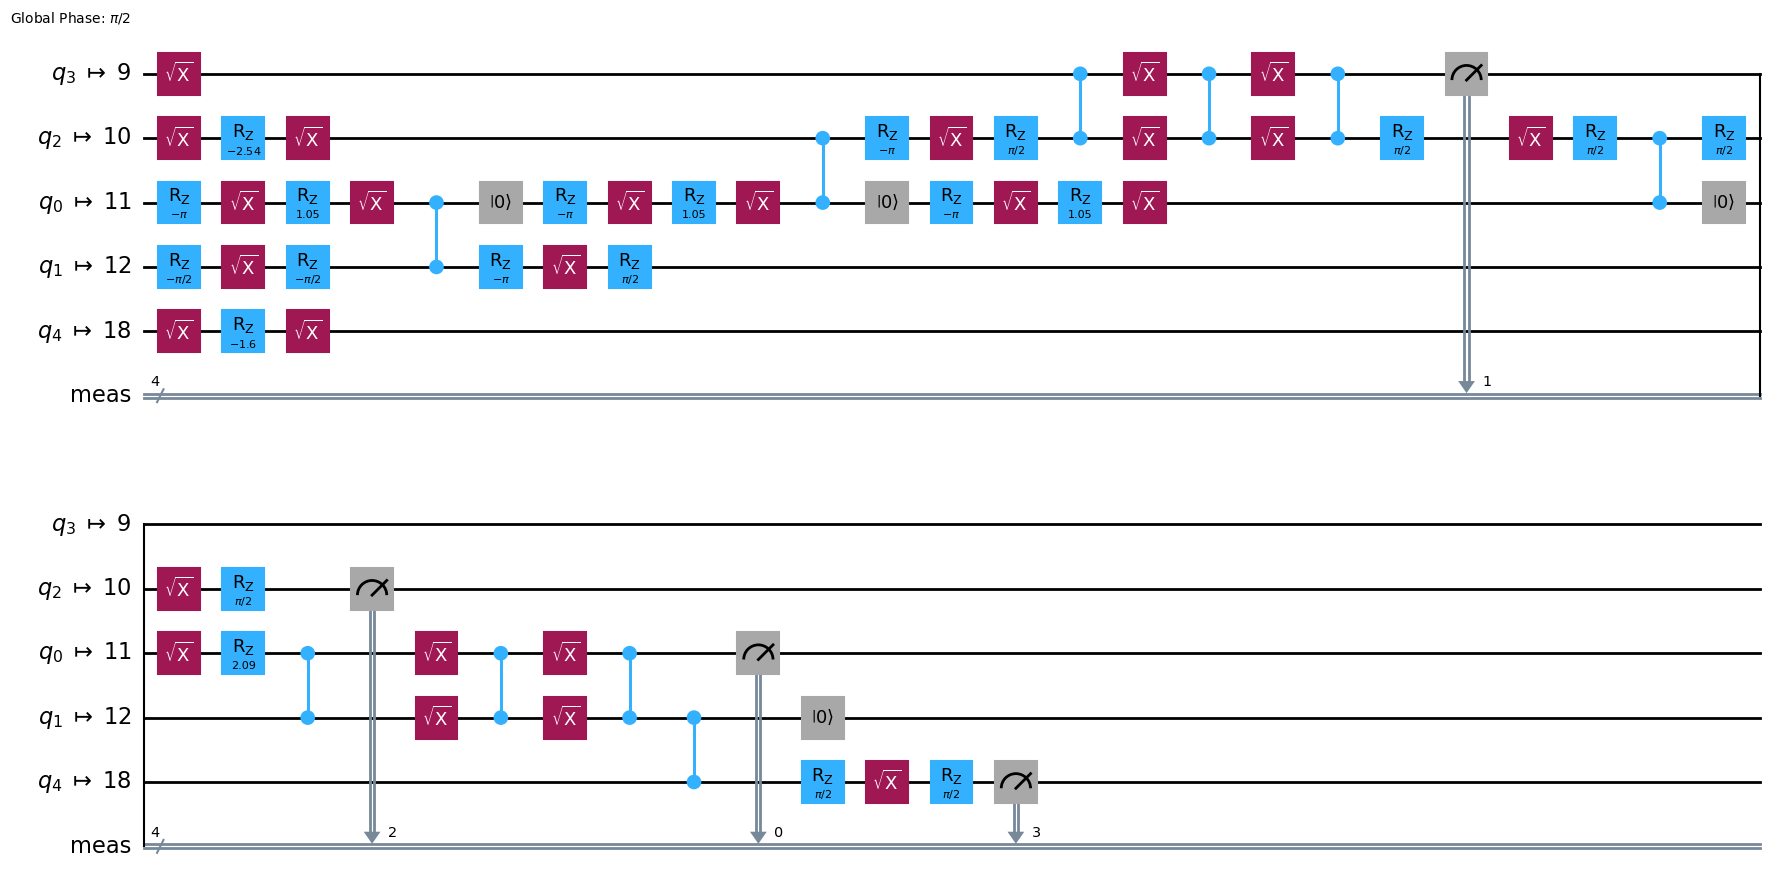

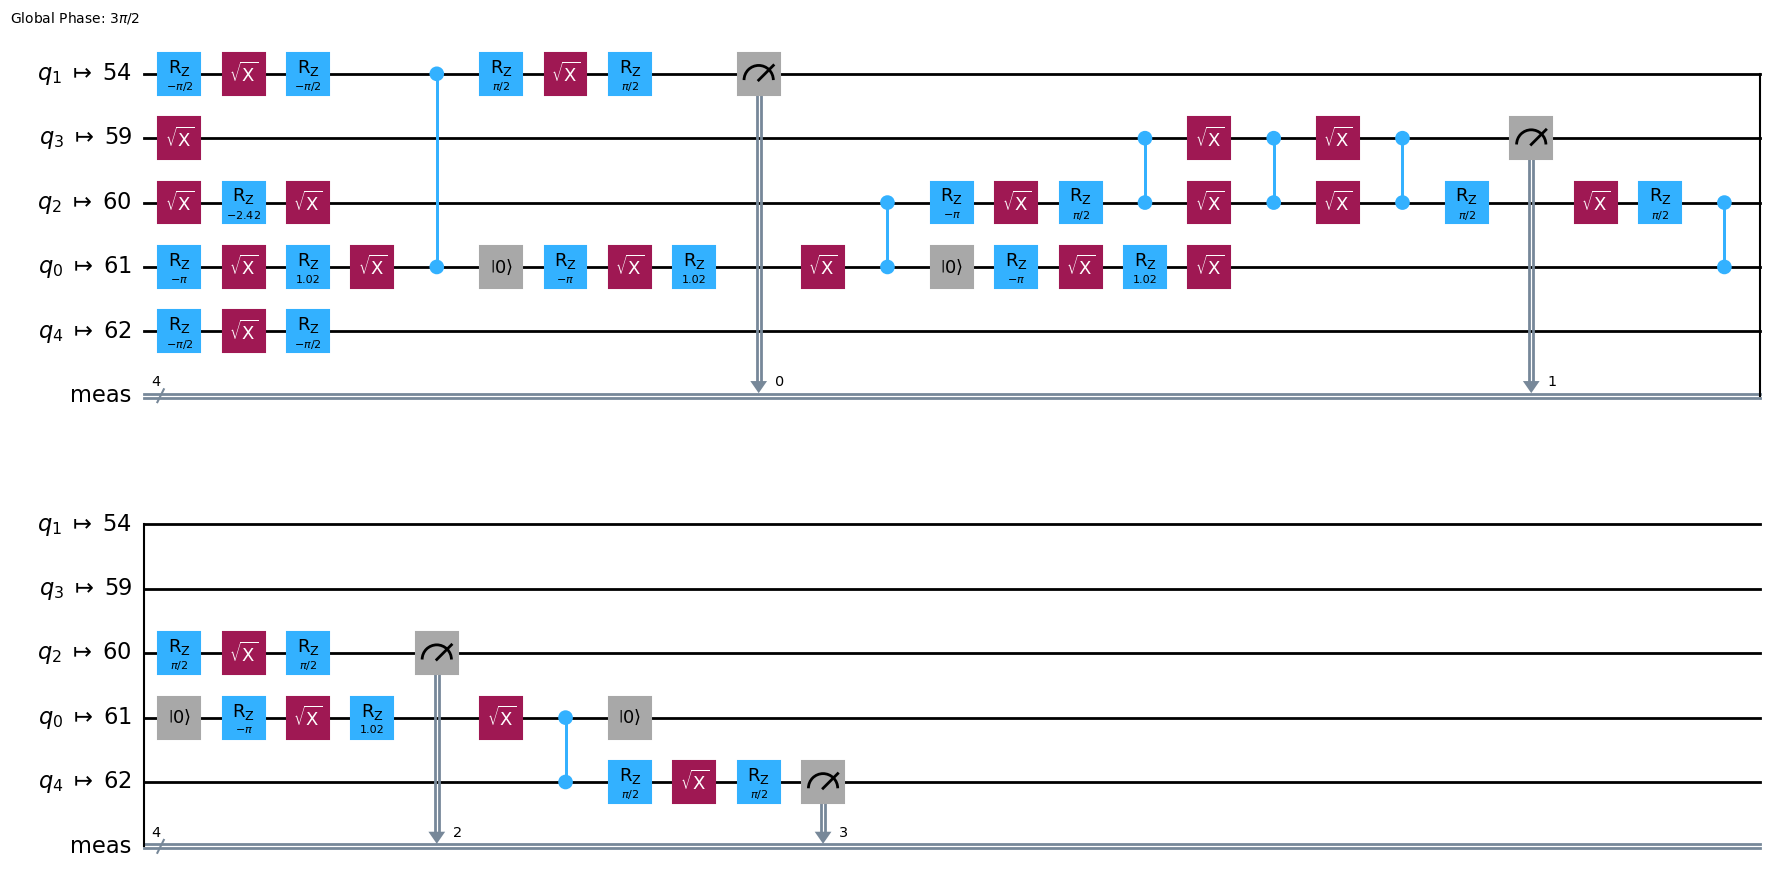

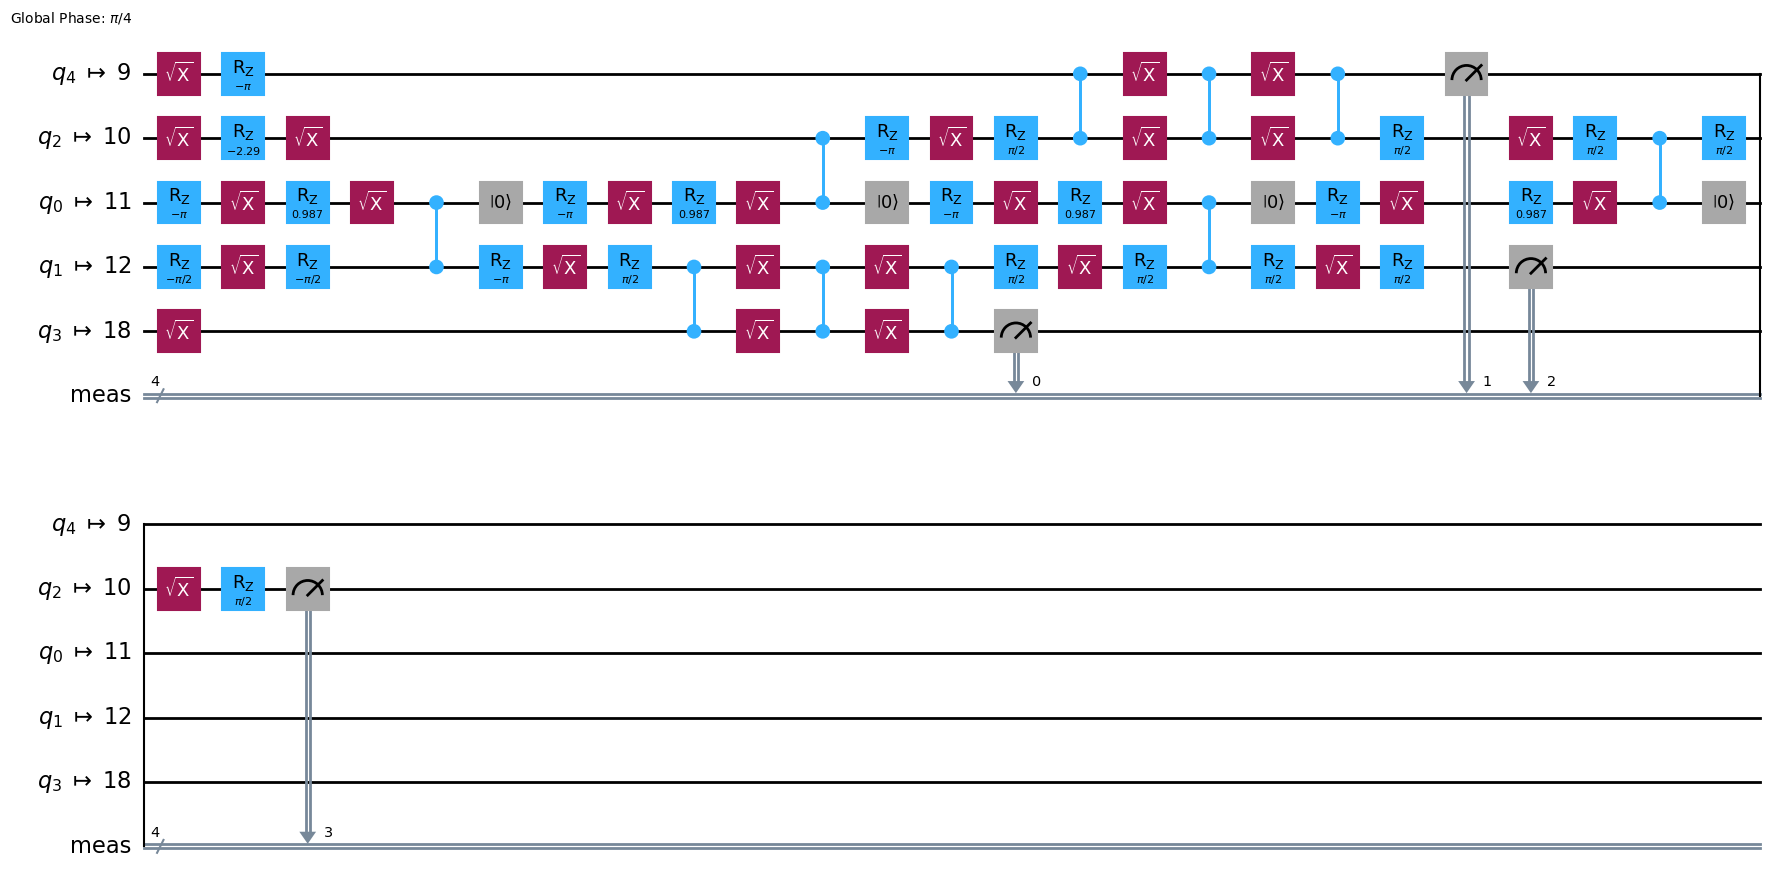

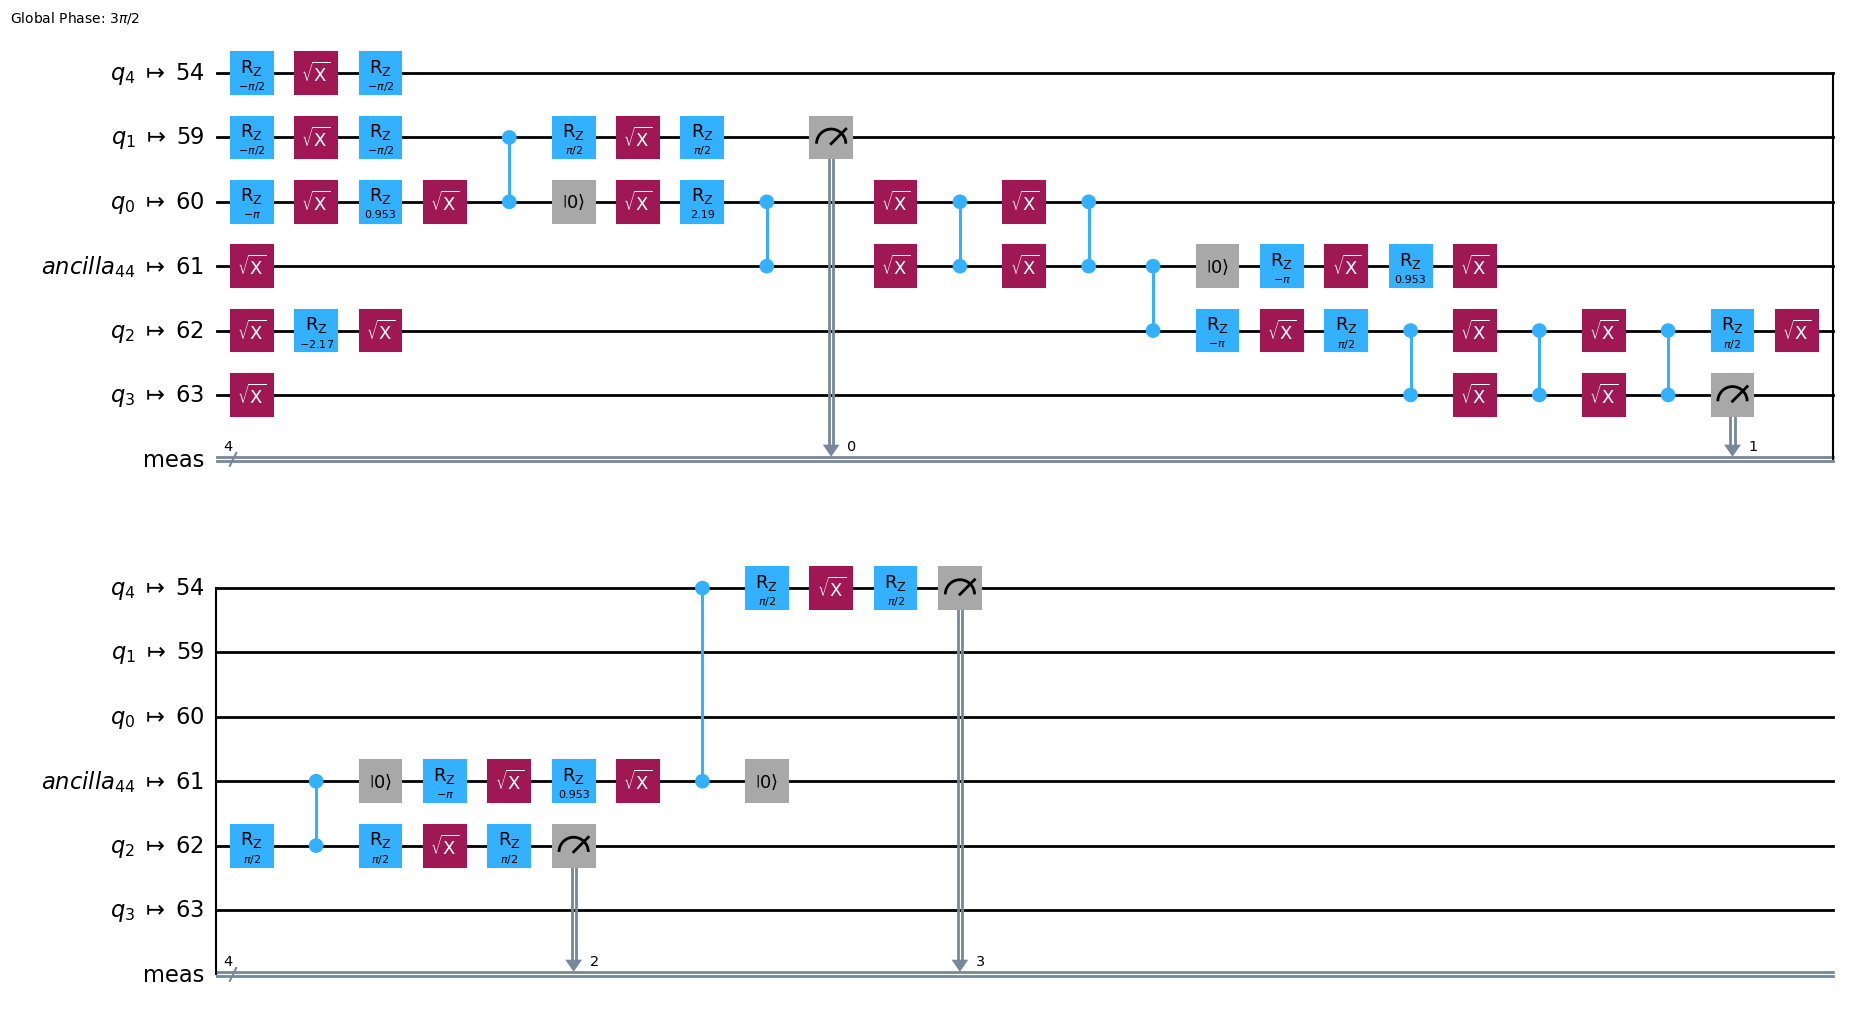

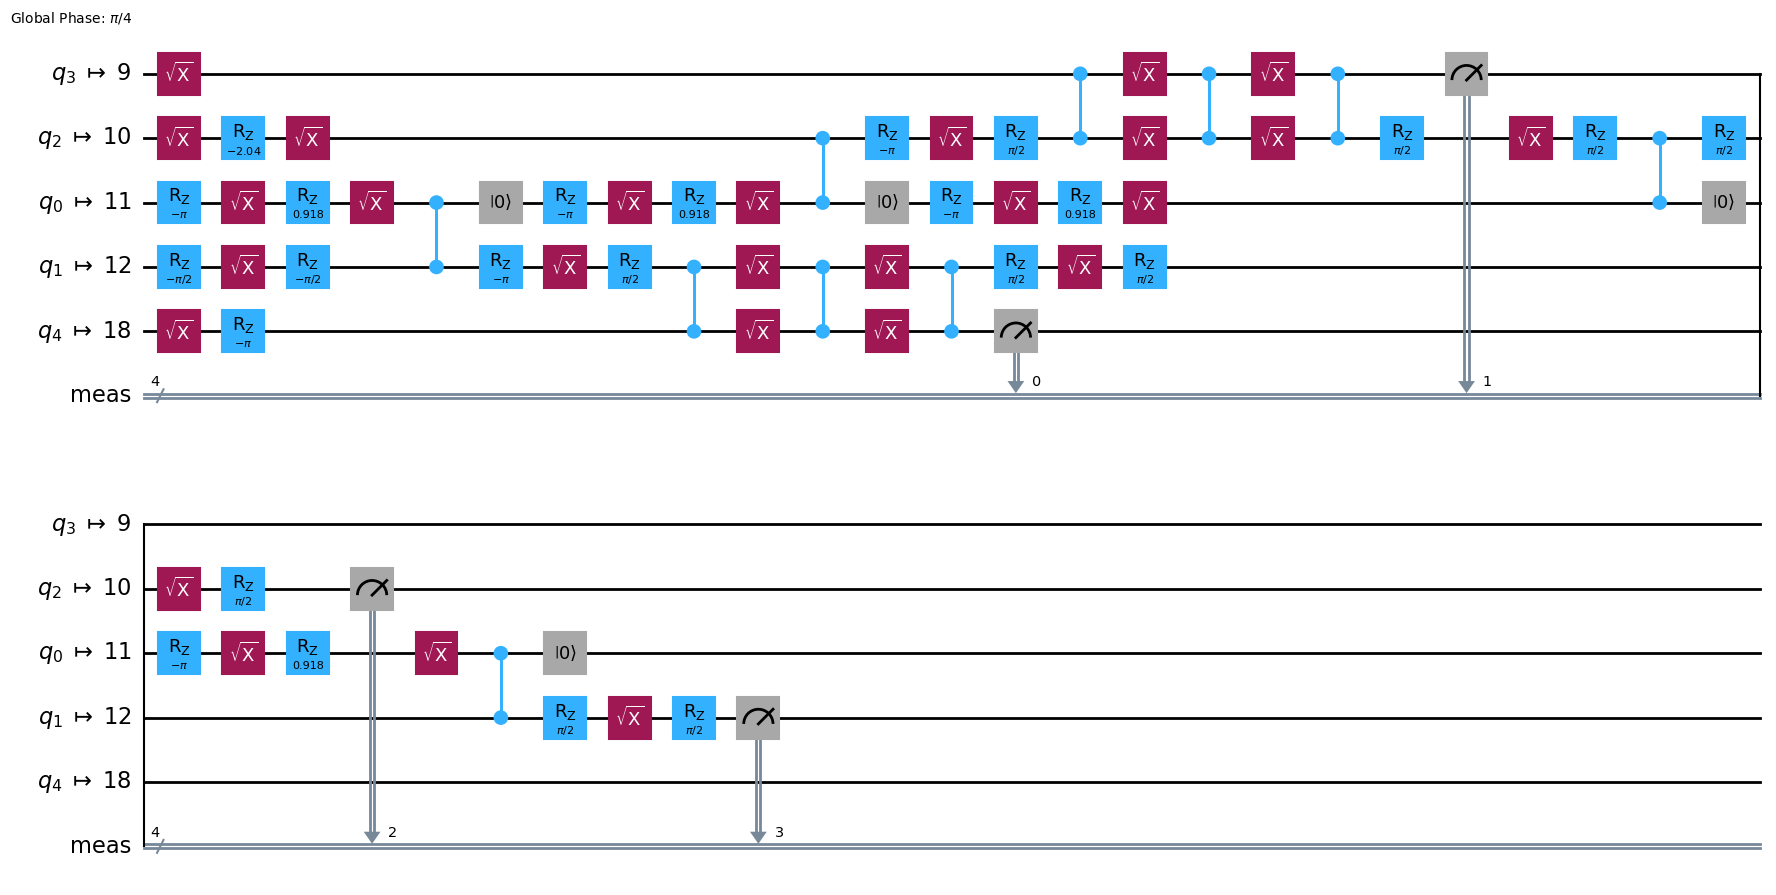

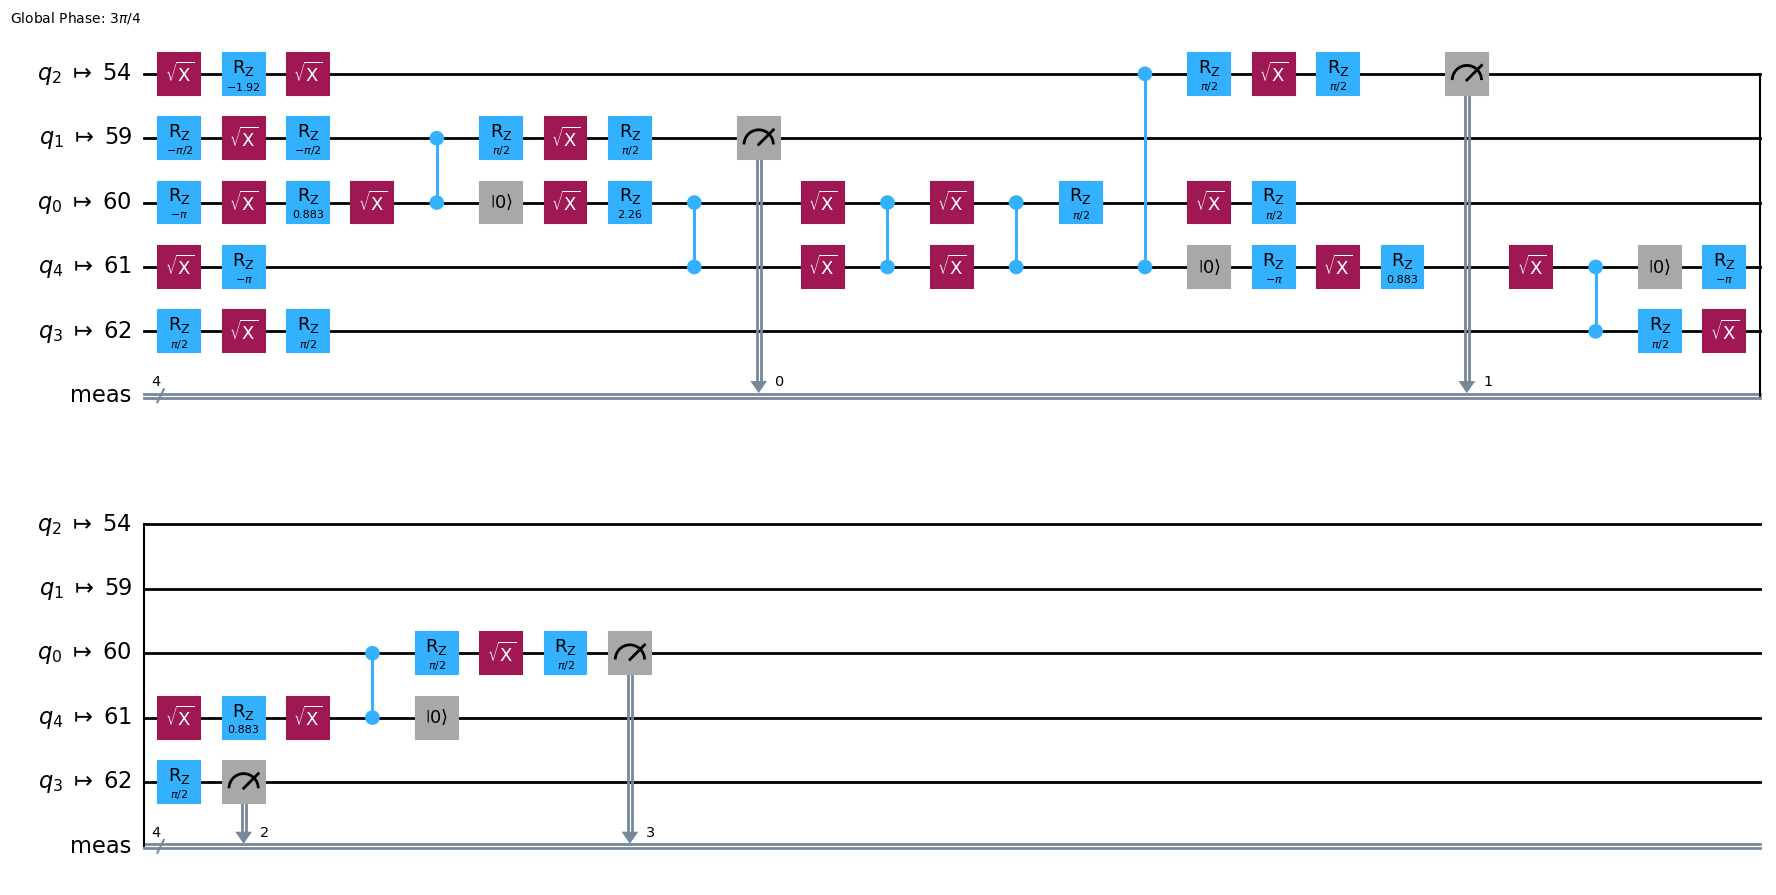

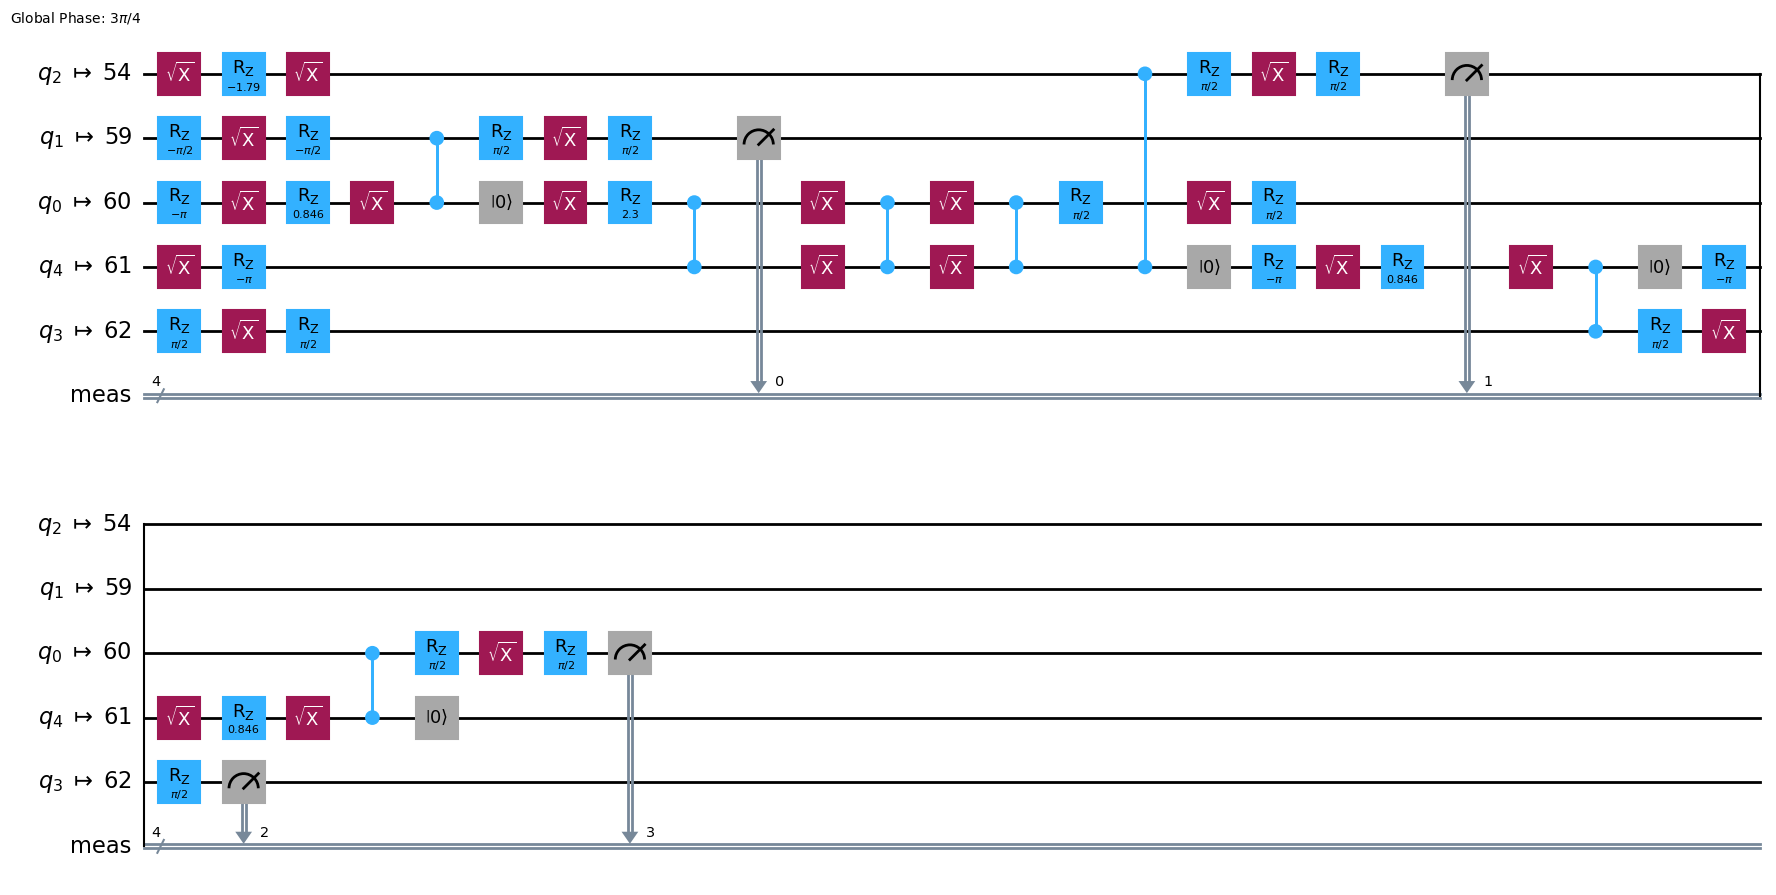

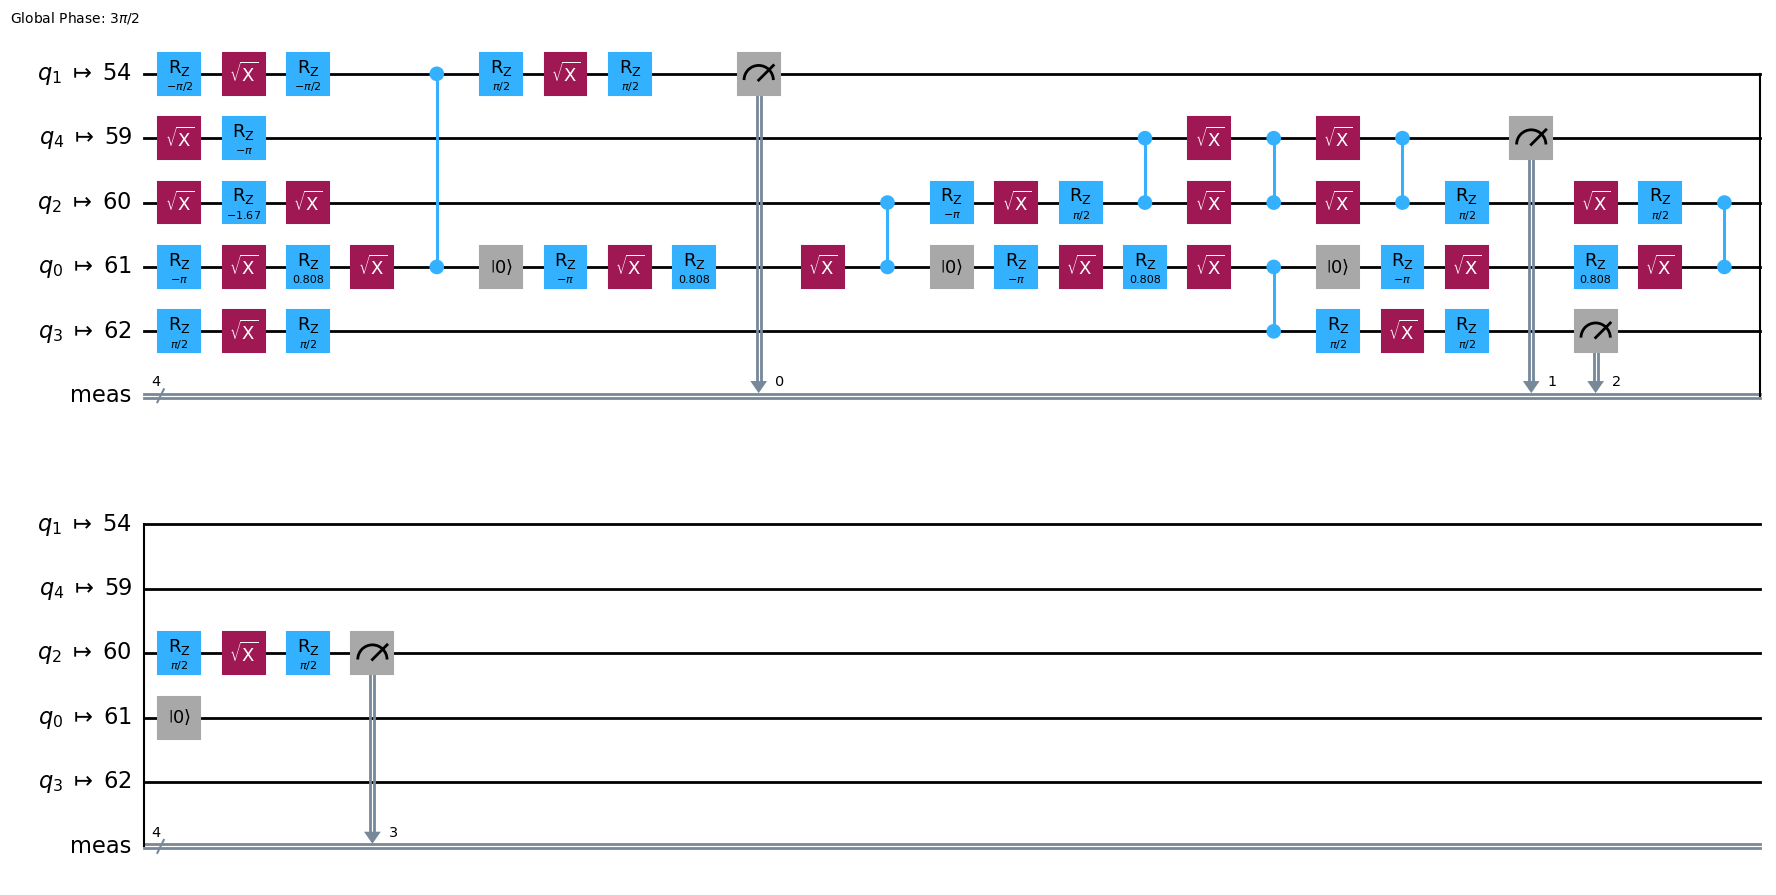

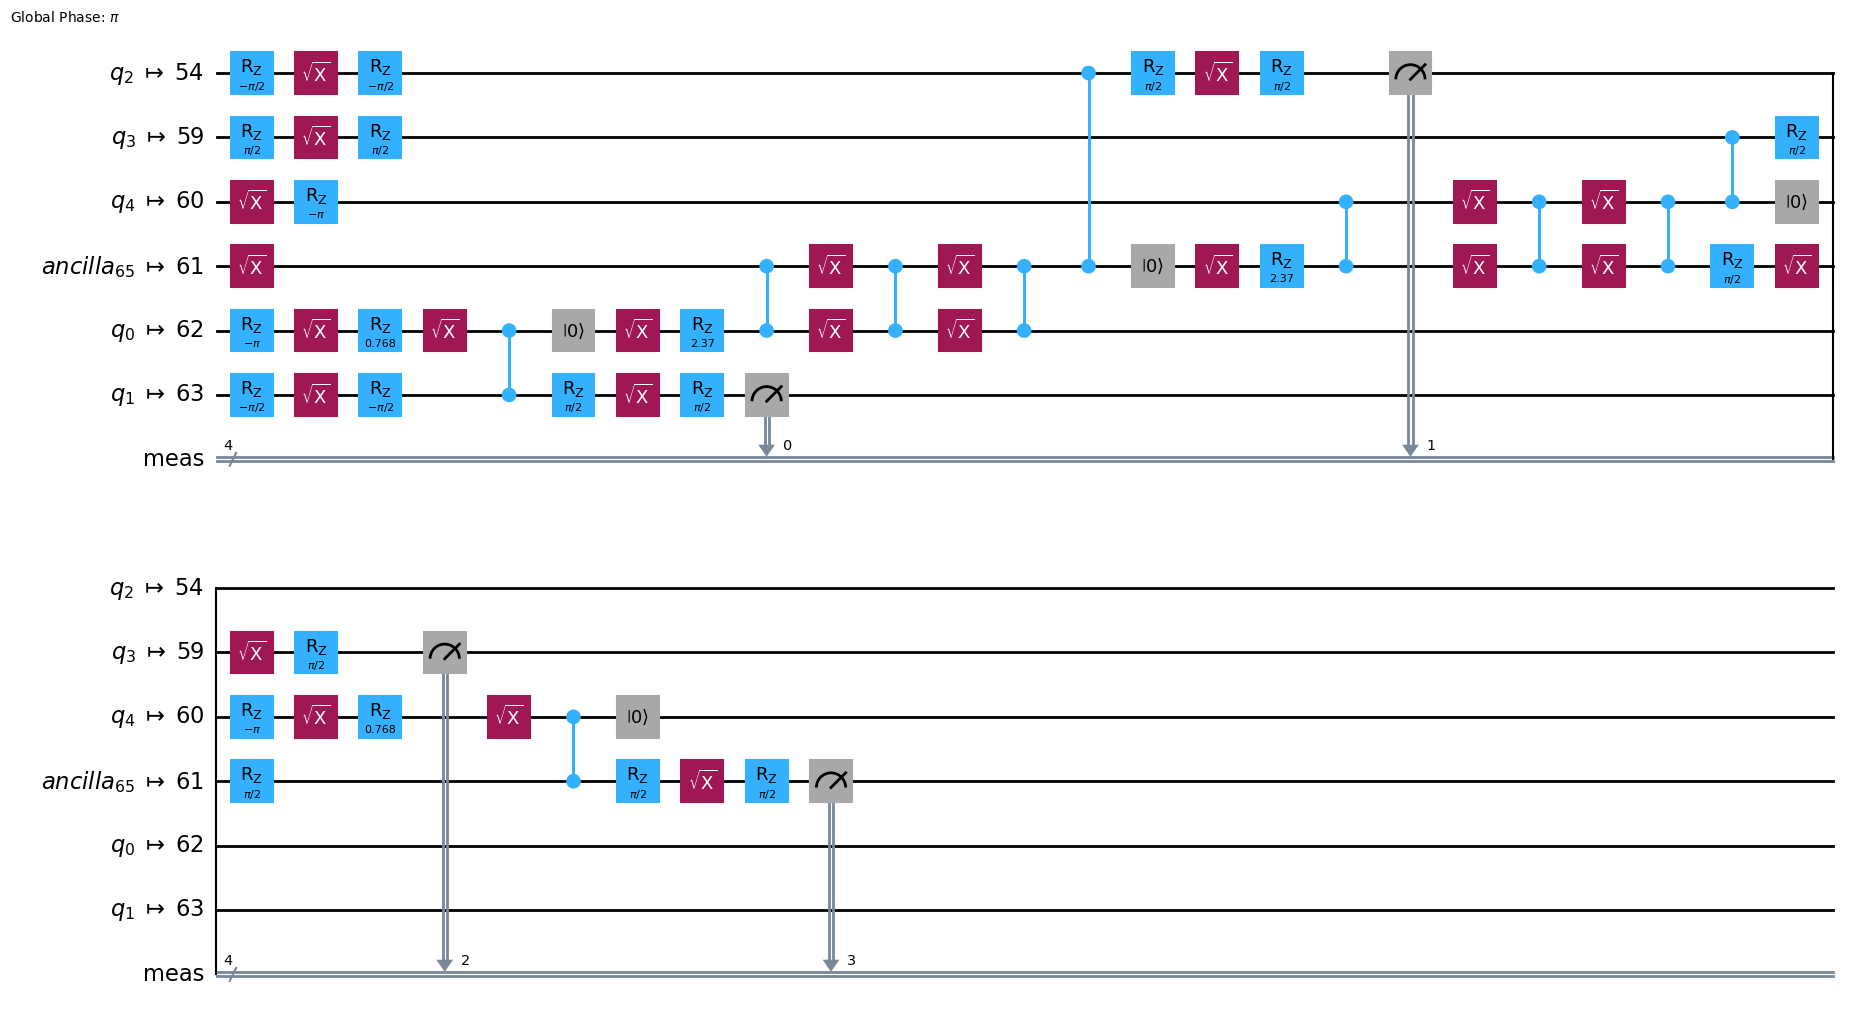

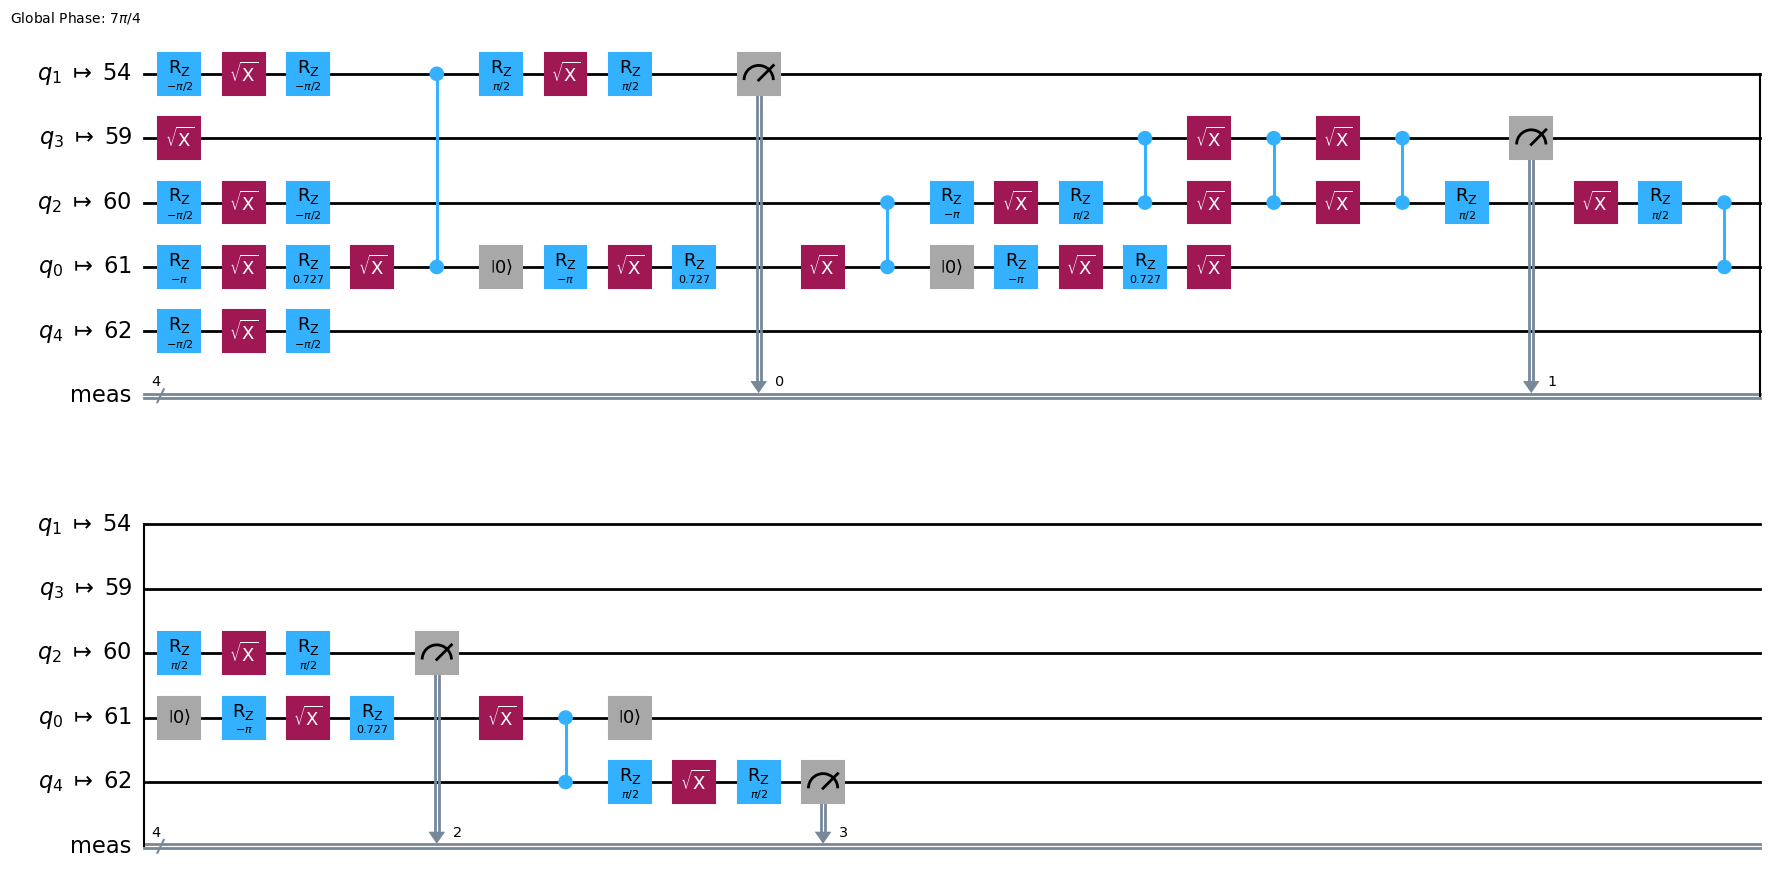

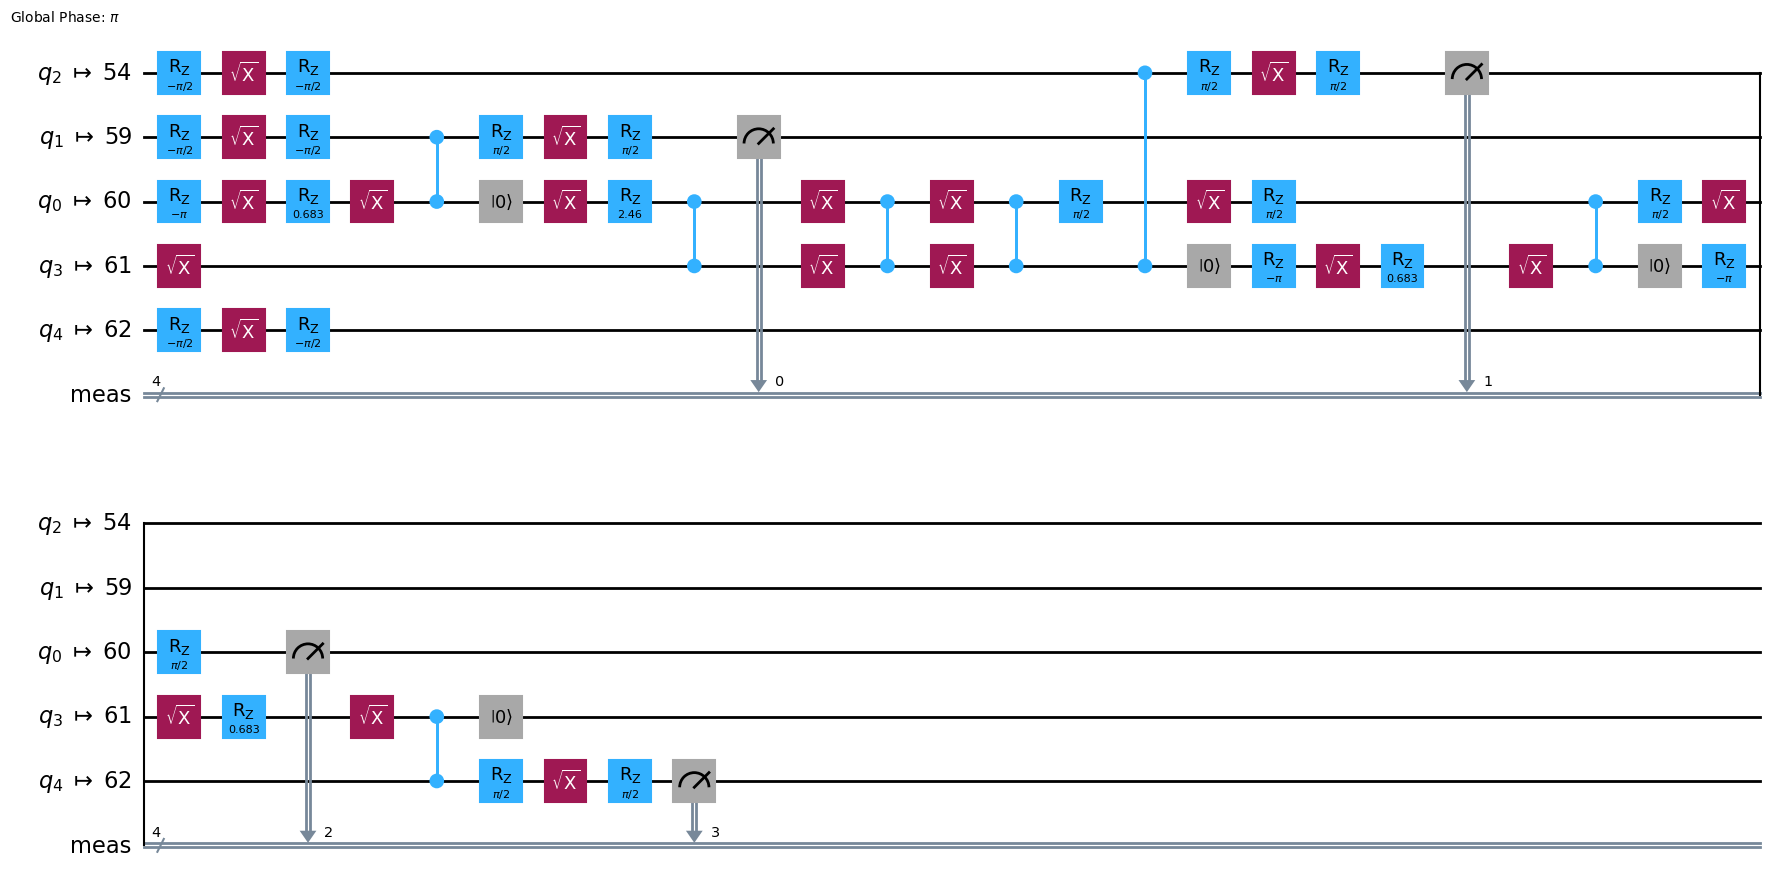

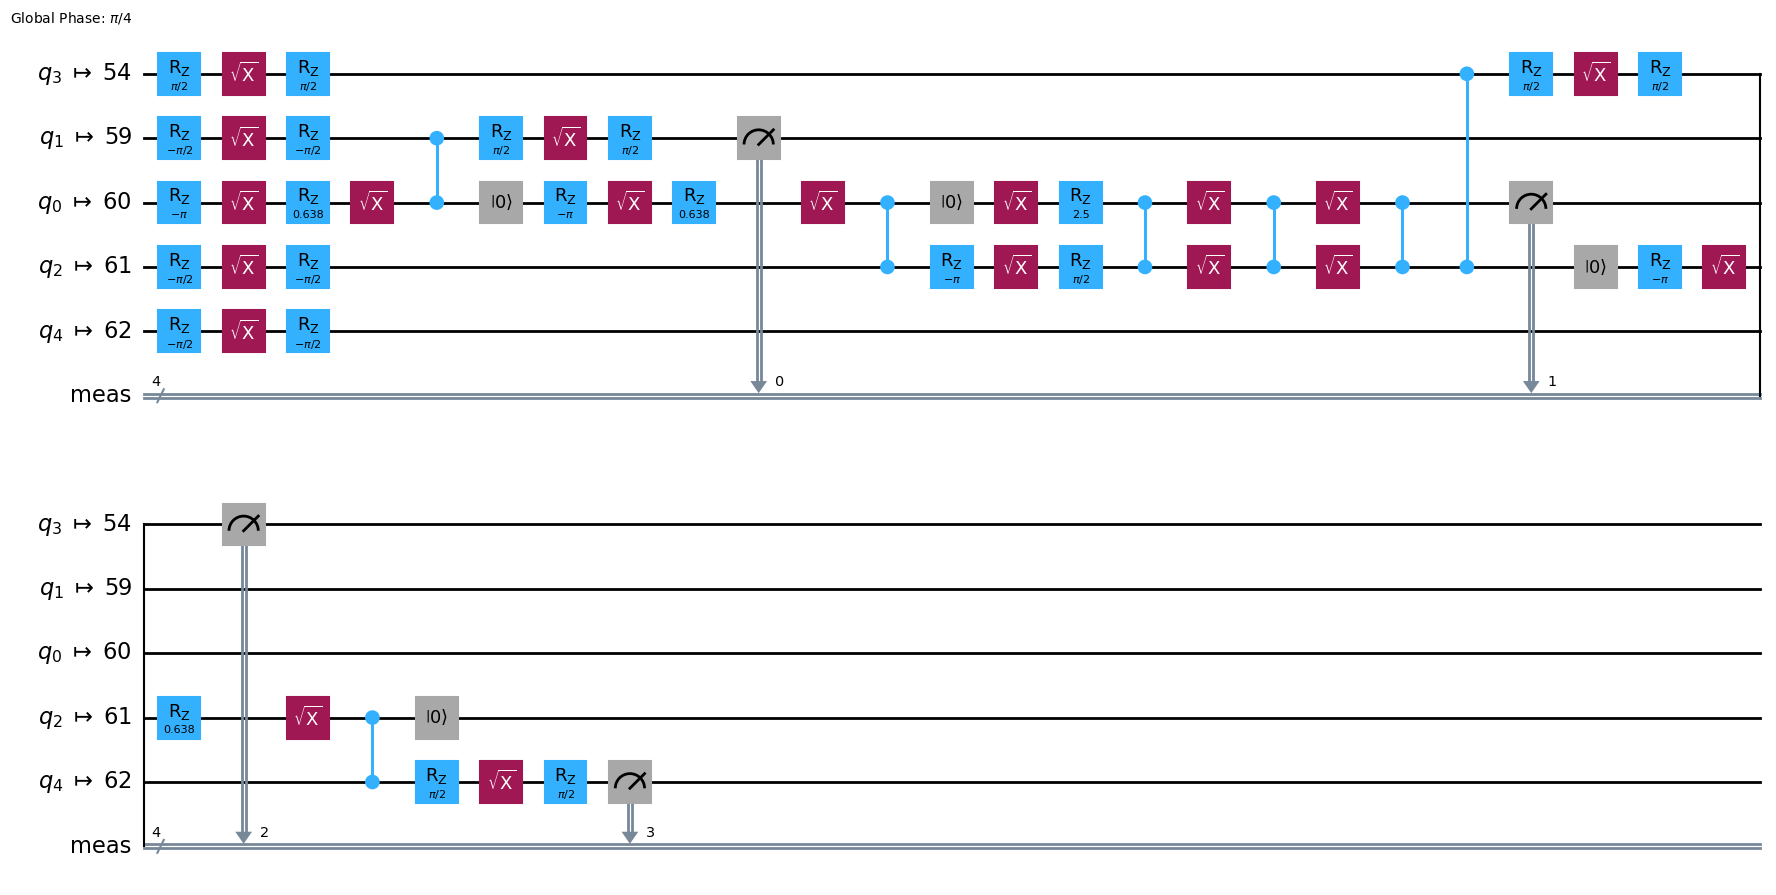

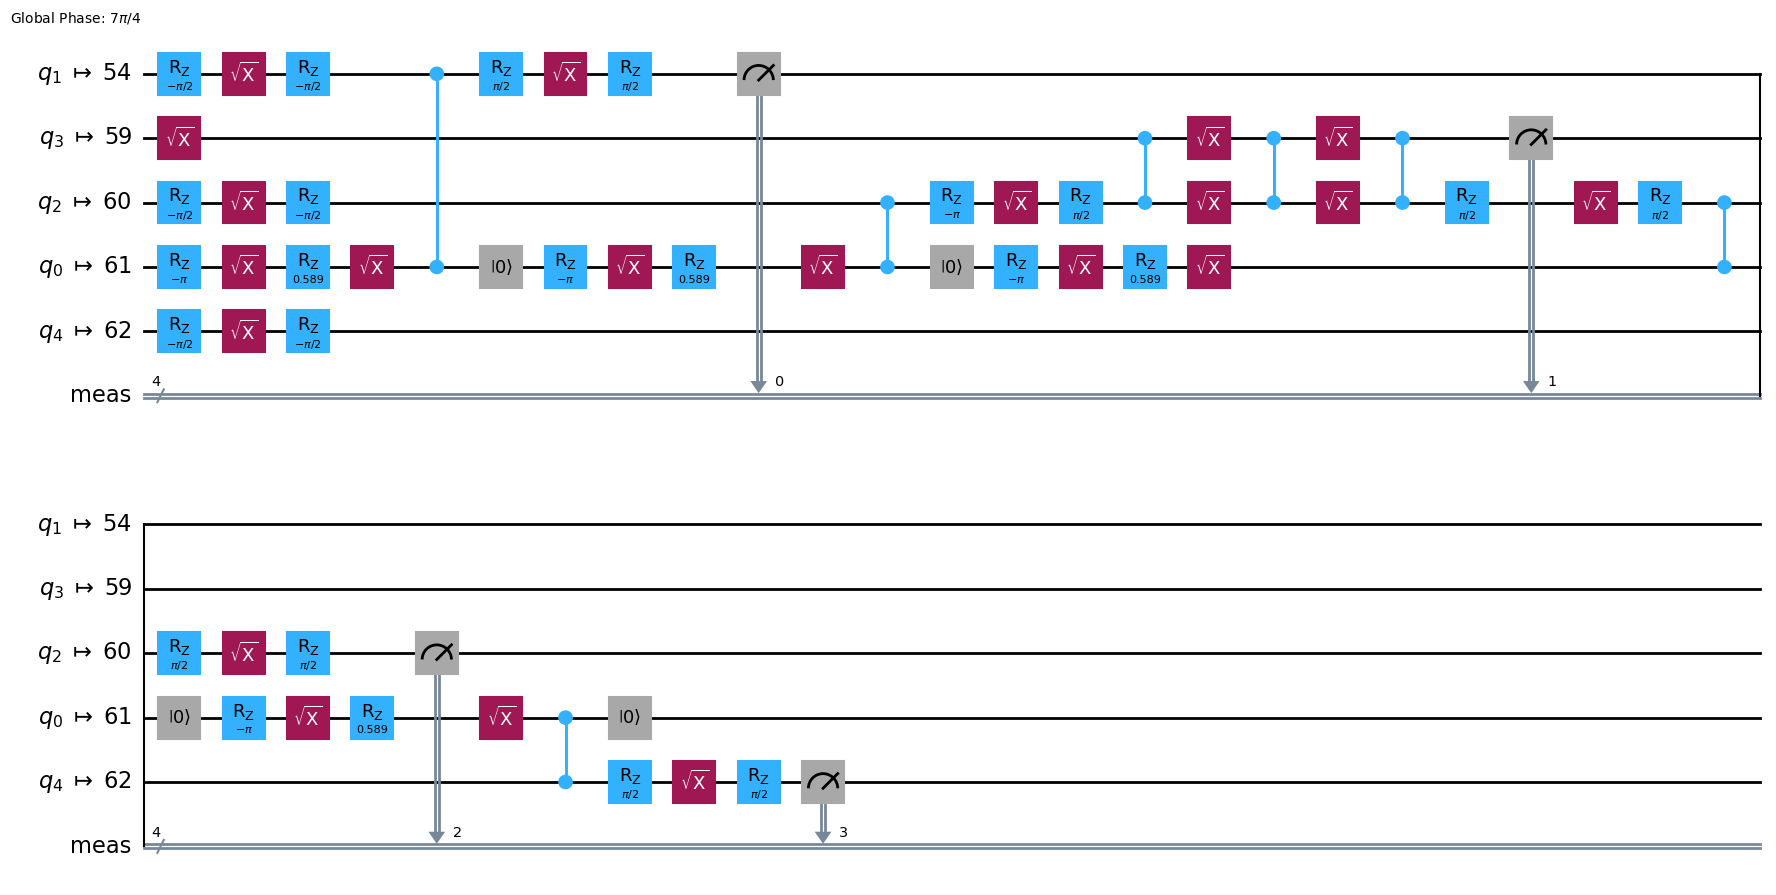

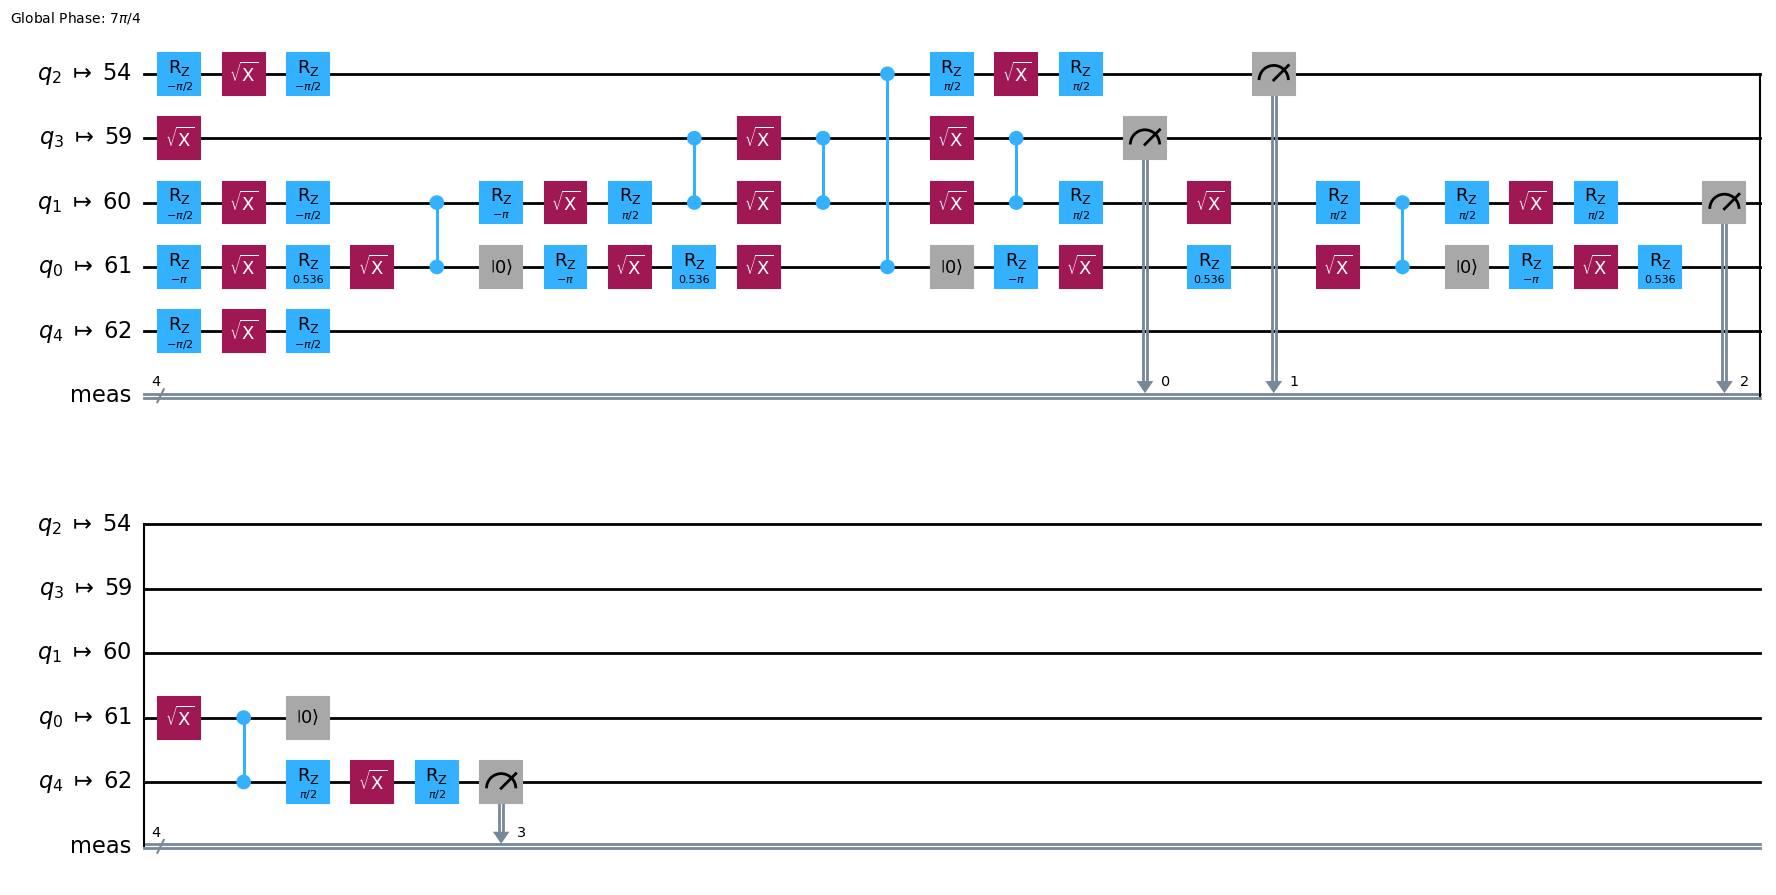

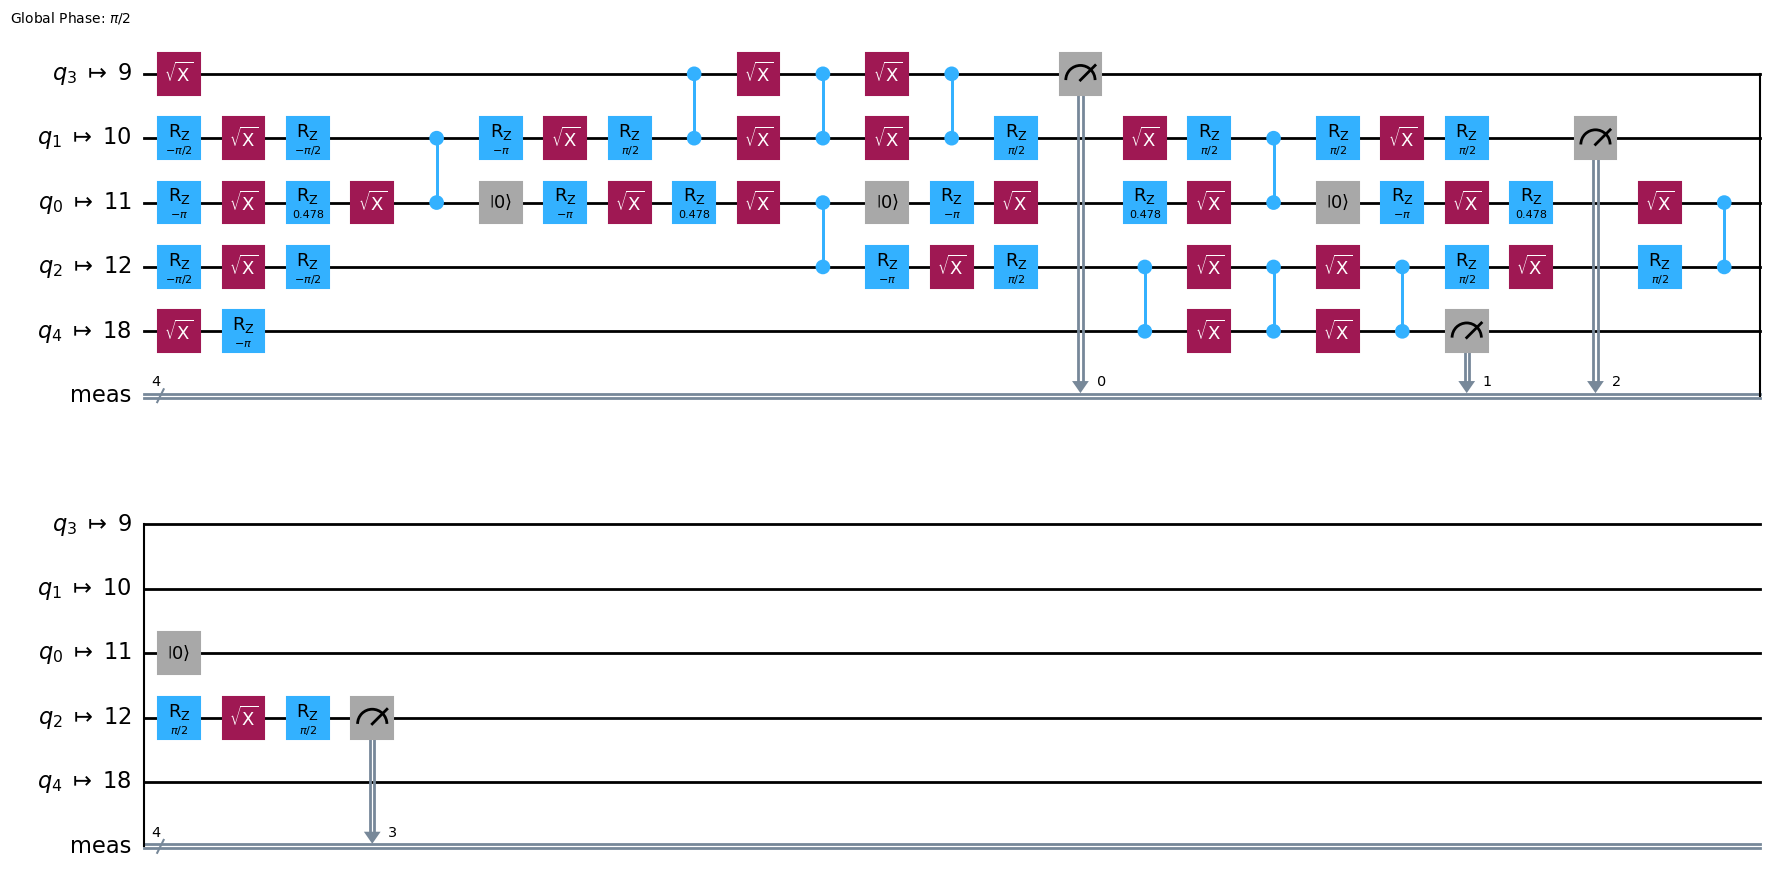

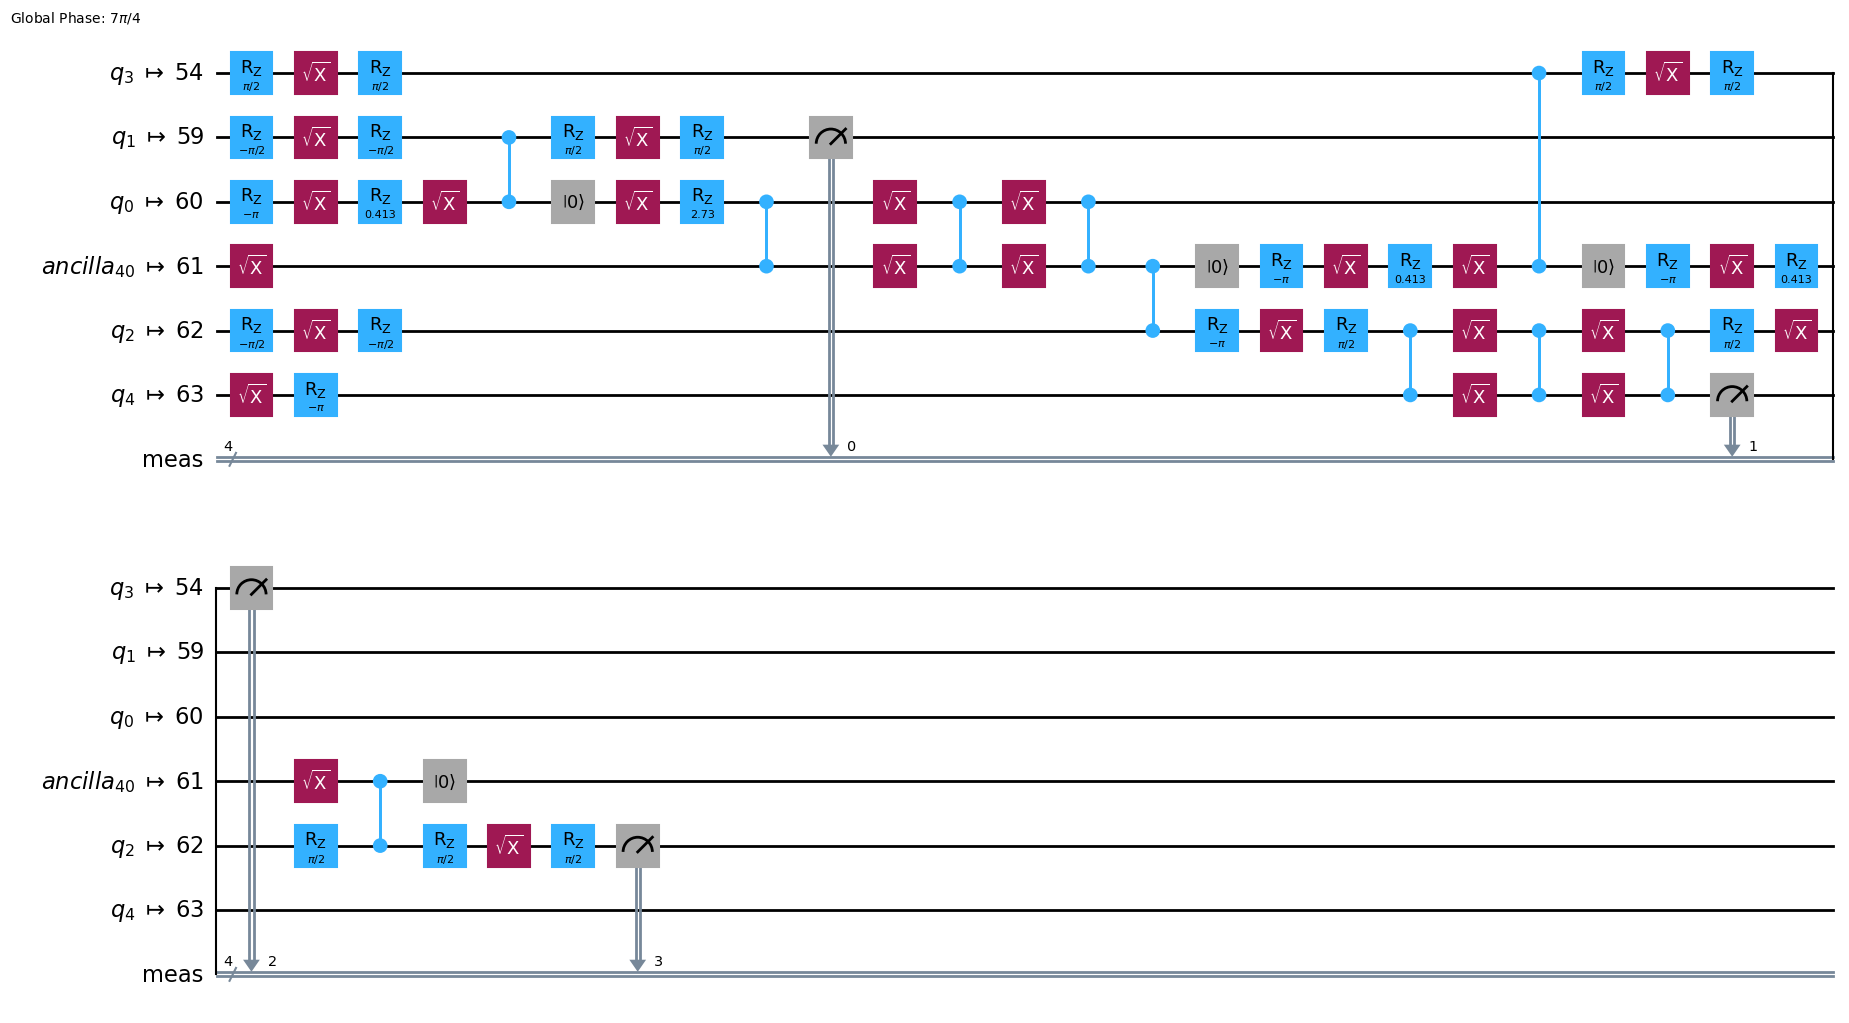

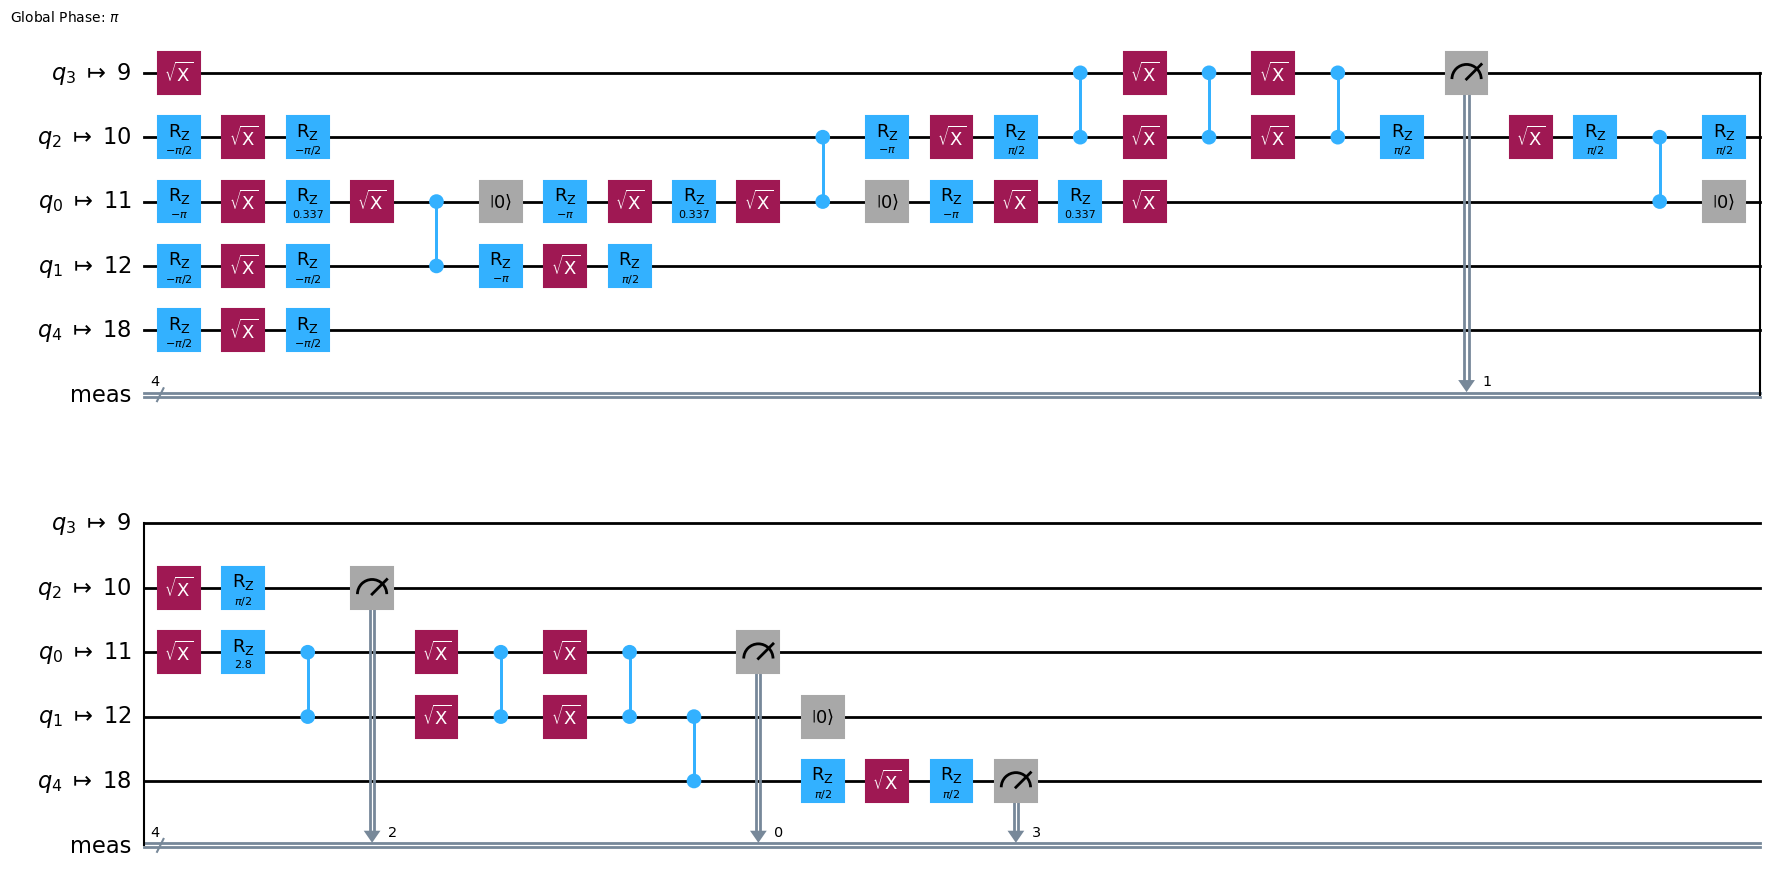

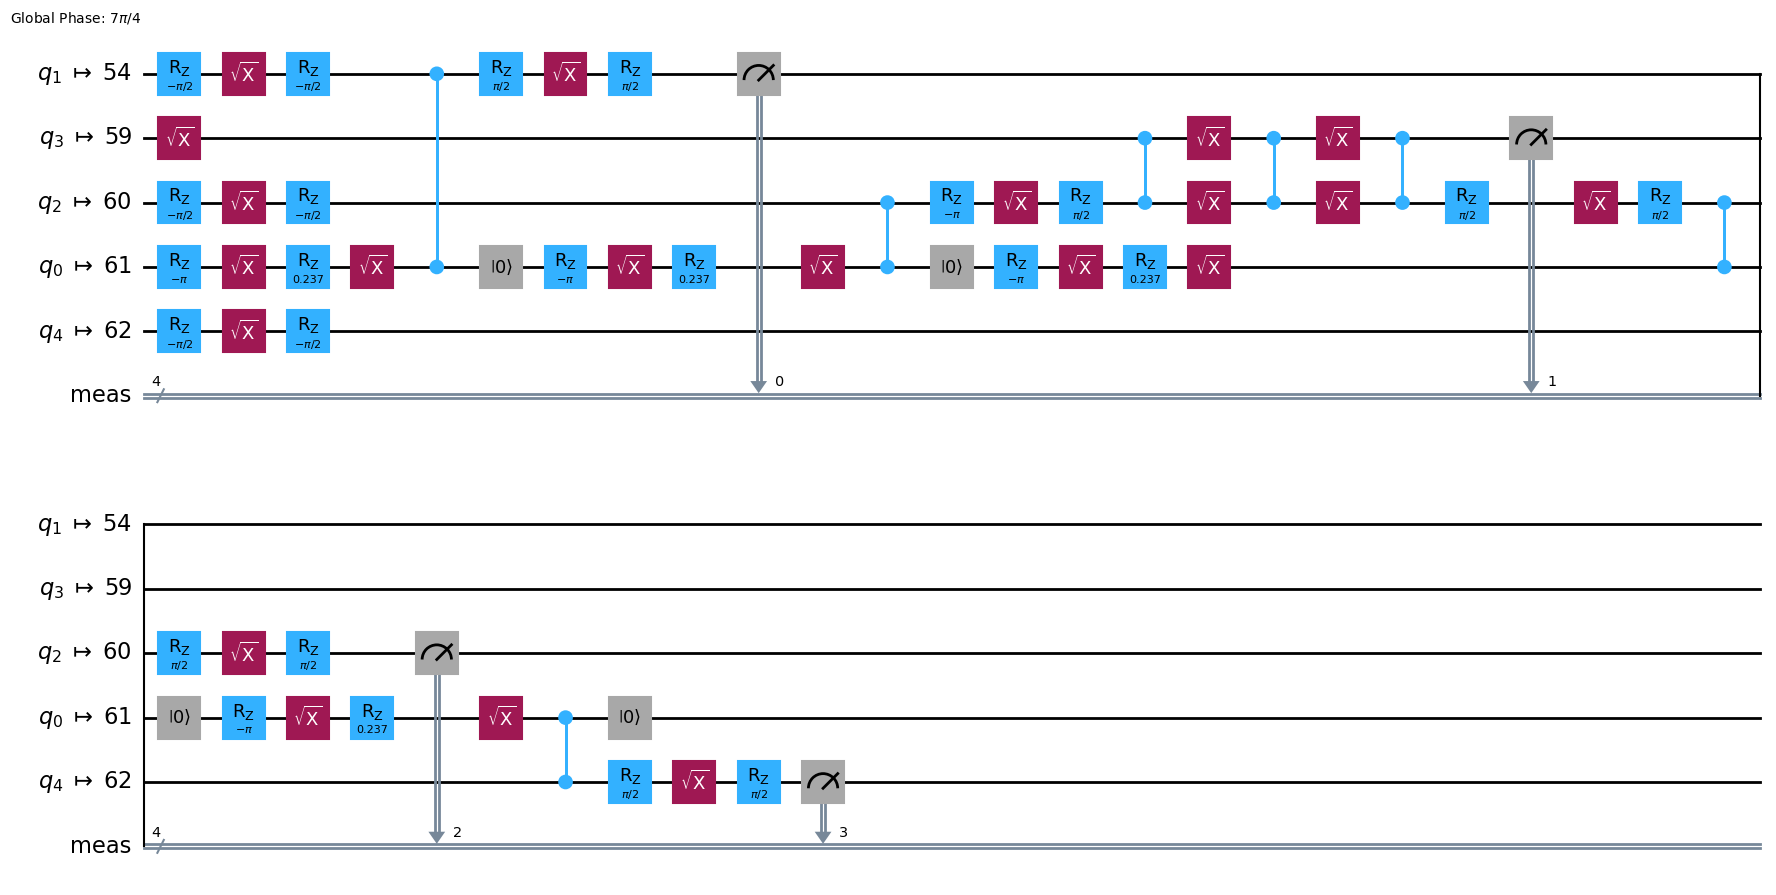

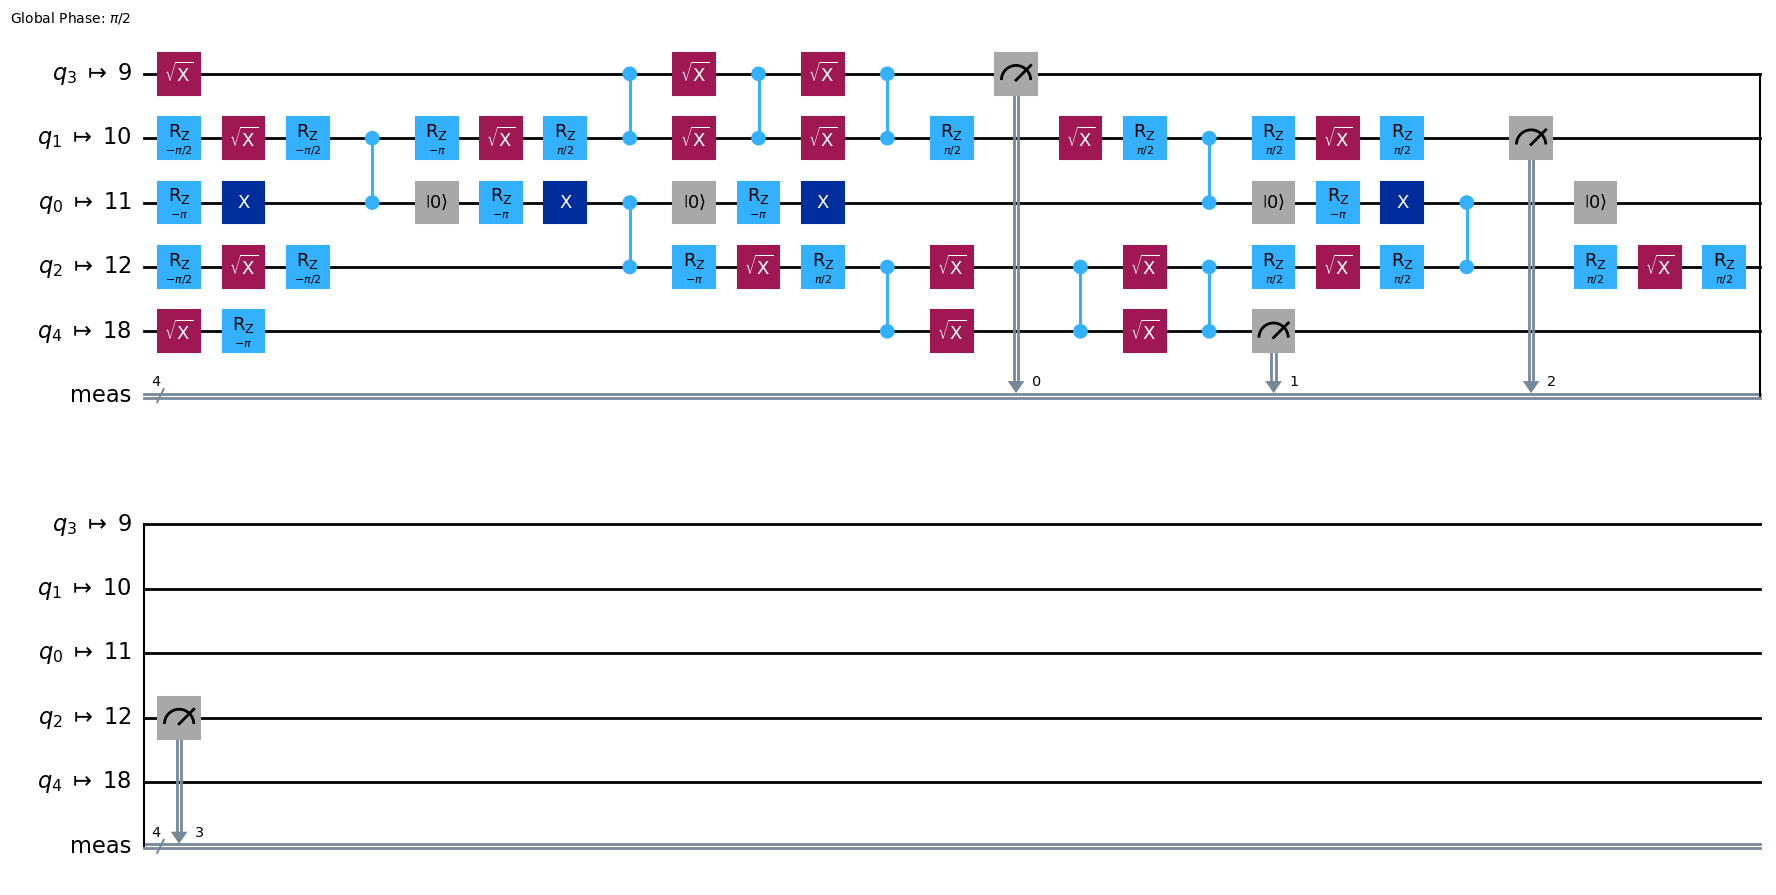

In [ ]:
from pickle import NONE
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from math import pi, asin, sqrt, cos, sin

from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import transpile
from numpy import pi
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from matplotlib import pyplot as plt
from qiskit_ibm_runtime import SamplerV2 as Sampler






# Parametri QACO
#rho = 0.1                # Evaporazione del feromone, non serve
beta_e0 = 0.13             # Probabilità esplorazione iniziale
maxIter = 62             # Numero massimo di iterazioni
converCondition = 59      # Condizione di convergenza
n = 4                     # Dimensione matrice M, il codice è comunque generalizzato nella funzione update_thetas

print(backend_qc)




M = np.array([[0.430, -0.496, -0.443, 0.223],
              [0, 0.254, 0.029, -0.359],
              [0, 0, -0.424, -0.183],
              [0, 0, 0, 0.301]])

# # Visualizzazione della matrice M
# print("Matrice M del problema:")
# print(M)

# -------------------------
# Lookup table (Table 1) and delta rule
# -------------------------
# Values given in Table 1 (multiples of pi). We'll store numeric values directly.
_lookup_table = {
    (0,0,True): -0.01 * pi,
    (0,0,False): 0.04 * pi,
    (0,1,True): -0.05 * pi,
    (0,1,False): 0.07 * pi,
    (1,0,True): 0.05 * pi,
    (1,0,False): -0.07 * pi,
    (1,1,True): 0.01 * pi,
    (1,1,False): -0.04 * pi             ## the condition of cos<0 is implemented later on
}


def init_pheromones(theta_ant):
    """Initialize RY angles θ_i = π/2 for all ant qubits."""
    theta_ant=[pi/2]*n #n = 4
    return theta_ant

def exploration_angle(beta_e):
    """Compute θ_e = 2 * arcsin(√β_e)."""
    return 2.0 * asin(sqrt(beta_e))

def calculate_fitness(X, M):
    X = np.array(X, dtype=float)
    return float(X @ M @ X.T)


def quantum_iteration_circuit_qiskit(theta_ant, theta_e, backend_shots=1024, backend_qc=backend_qc, seed=None):

    #Creazione circuito quantistico
    n_local = len(theta_ant)  #4
    creg = ClassicalRegister(n_local, "meas")
    qreg = QuantumRegister(n_local + 1, "q")
    qc = QuantumCircuit(qreg, creg)   #1 control QUBIT (EXPLORATION), 4 target QUBIT (ANT)...  ; 5 qubits and 4 bits

    # (A) preparazione ant-qubit con RY(theta_i) su qubit 1..n
    for i in range(n_local):
      qc.ry(float(theta_ant[i]), i+1)

    # (B) per ogni ant-qubit: preparazione exploration RY(theta_e), CX(0,i+1), reset(0)---> see the appendix 2 about the reset
    for i in range(n_local):
      qc.ry(float(theta_e), 0)
      qc.cx(0, i+1)
      qc.reset(0)

    # (C) misura ant-qubit 1..n nei bit classici 0..n-1
    for i in range(n_local):
      qc.measure(qreg[i+1], creg[i])


    # Convert to an ISA circuit and layout-mapped observables.

    pm = generate_preset_pass_manager(backend=backend_qc, optimization_level=3)
    isa_circuit = pm.run(qc)

    #isa_circuit.draw("mpl", idle_wires=False)


    sampler = Sampler(backend_qc)
    job = sampler.run([isa_circuit], shots=1024)  # 1024 misure
    result = job.result()

    pub_result = result[0]

    counts = pub_result.data.meas.get_counts()

    # invertiamo per ottenere ordine naturale q0..q_{n-1}

    #Prendi la bitstring più frequente e assicurati che sia stringa normale
    bitstring = max(counts, key=counts.get)
    if isinstance(bitstring, bytes):
      bitstring = bitstring.decode("utf-8")

    # Mantieni solo 0/1 e inverti (Qiskit restituisce l’ordine inverso dei qubit)
    bitstring = ''.join(ch for ch in bitstring if ch in ('0', '1'))
    measured_bits = [int(b) for b in bitstring[::-1]]

    return measured_bits, counts



def lookup_delta_theta(xi, bi, is_current_better, theta_ant):
    """
    xi: bit misurato per qubit ANT i (0 o 1)
    bi: bit nella soluzione di riferimento b (0 o 1)
    is_current_better: True se f(x) > f(b), altrimenti False
    theta_i: angolo corrente del qubit ANT i

    Restituisce Δθ da sommare a θ_i.
    Applica la regola: se la riga “is_current_better == True” e cos(theta_i/2) < 0,
    inverte il segno di base. (come riportato nel paper)
    """
    key = (int(xi), int(bi), bool(is_current_better))
    base = _lookup_table[key]
    # righe “miglioramento” (is_current_better == True) sono soggette all’inversione
    if is_current_better and math.cos(theta_ant / 2) < 0:
        return -base
    return base

def update_thetas(theta_ant, measured_bits, best_bits, f_x, f_b):
    """
    Aggiorna in-place una lista di angoli theta_list per tutti i qubit i = 0..n-1.

    Parametri:
      - theta_ant: lista di valori θ_i correnti (float ANT qubit)
      - measured_bits: la soluzione misurata x come lista di 0/1
      - best_bits: la soluzione di confronto b (lista di 0/1), potrebbe essere None
      - f_x: fitness di x
      - f_b: fitness di b (se b è None, f_b può essere considerato -∞)

    Ritorna la nuova lista theta_ant aggiornata (o aggiorna in-place).
    """
    n = len(theta_ant)

    # Se best_bits è None (prima iterazione), definiamo bi = 0 per default

    for i in range(n):
        xi = measured_bits[i]
        bi = 0 if best_bits is None else best_bits[i]
        is_current_better = (f_x > f_b)
        delta = lookup_delta_theta(xi, bi, is_current_better, theta_ant[i])
        theta_new = theta_ant[i] + delta

        # Clip θ_i nell’intervallo [0, π]
        if theta_new < 0.0:
            theta_new = 0.0
        if theta_new > math.pi:
            theta_new = math.pi

        theta_ant[i] = theta_new

    return theta_ant


def qaco_run_main(M, backend_qc=backend_qc, beta_e0=0.13, seed=None, backend_shots=1024, verbose=True): ##############################################
    """
    Implementazione principale di QACO (Alg.2) per il caso unconstrained.
    Usa le funzioni:
        - quantum_iteration_circuit_qiskit(...)   # per costruire ed eseguire il circuito
        - update_thetas(...)                      # per aggiornare i theta (feromone)
    """
    rng = np.random.default_rng(seed)
    n = M.shape[0]
    theta_ant=[0]*n
    best_bits=[0]*n
    # ---------------------------
    # Parametri iniziali
    # ---------------------------
    # θ_i iniziali = π/2

    theta_ant = init_pheromones(theta_ant)
    best_solution = None
    best_fitness = -np.inf

    print(f"--- QACO run (n={n}) ---")
    print(f"converCondition = {converCondition}, maxIter = {maxIter}\n")

    # ---------------------------
    # Loop principale
    # ---------------------------
    for iter_num in range(1, maxIter + 1):
        # (1) Aggiorna beta_e e theta_e
        beta_e = beta_e0 + (1.0 - beta_e0) * (iter_num / maxIter)
        theta_e=exploration_angle(beta_e)

        # (2) Memorizza la best precedente
        f_prev_best = -np.inf if best_bits is None else calculate_fitness(best_bits, M)

        # (3) Esegui il circuito quantistico (singolo shot)
        measured_bits, counts = quantum_iteration_circuit_qiskit(theta_ant, theta_e, backend_shots=backend_shots, backend_qc=backend_qc , seed=seed)

        # (4) Calcola la fitness
        fitness=calculate_fitness(measured_bits, M)

        # (6) Aggiorna i θ_i con la lookup table
        update_thetas(theta_ant, measured_bits, best_bits, fitness, f_prev_best)

        # (5) Aggiorna best se necessario
        if fitness > best_fitness:
            best_fitness = fitness
            best_bits = measured_bits.copy()
            conver_counter = 0
        else:
            conver_counter += 1

        # (7) Stampa risultati
        if verbose:
            print(f"Iter {iter_num:3d}: measured={measured_bits} "
                  f"f_x={fitness:.5f} | best_f={best_fitness:.5f} "
                  f"conv={conver_counter}/{converCondition}")

        # (8) Condizione di convergenza
        if conver_counter >= converCondition:
            print("\n🟢 Convergenza raggiunta!")
            break

    # ---------------------------
    # Risultato finale
    # ---------------------------
    print("\n=== RISULTATO FINALE ===")
    print("Best solution:", best_bits)
    print("Best fitness :", best_fitness)
    print("Iterations   :", iter_num)
    print("=========================\n")

    return


qaco_run_main(M,backend_qc)